# getting started

In [28]:
#reading in data
%load_ext autoreload
%autoreload 2
import IPython
print(IPython.get_ipython().config)
import os
os.getcwd()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy.cluster.hierarchy import linkage, leaves_list, fcluster
from collections import defaultdict
from scipy.stats import spearmanr, pearsonr
import requests
import json
import sys
import os
import pickle

project_root = os.path.abspath(os.path.join(os.getcwd(), '../../../'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

#functions written by AK:
from Abdullah_kuziez.preprocessing.pre_processing_py_fxns.filtering_functions import *
from Abdullah_kuziez.preprocessing.pre_processing_py_fxns.graphing_fxns import *
from Abdullah_kuziez.preprocessing.pre_processing_py_fxns.making_cellbox_files import *
from Abdullah_kuziez.preprocessing.pre_processing_py_fxns.Initial_structuring import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{'IPKernelApp': {'connection_file': '/run/user/210498/jupyter/runtime/kernel-v357454255360d8aae6e896b663580930b56962f8d.json'}, 'Completer': {'use_jedi': False}}


In [29]:
intermediate_dir_48hr = Path("intermediate_files_TNBC/48hr")
data_48hr=load_data(intermediate_dir_48hr, "48hr")
intermediate_dir_6hr = Path("intermediate_files_TNBC/6hr")
data_6hr=load_data(intermediate_dir_6hr, "6hr")
intermediate_dir_24hr = Path("intermediate_files_TNBC/24hr")
data_24hr=load_data(intermediate_dir_24hr, "24hr")
#splitting the data into targeted and non_targeted proteins:
tgt_prots_raw_6hr,non_tgt_prots_raw_6hr=split_tgt_and_non_tgt_prots(data_6hr,data_6hr['cell_lines'])
tgt_prots_raw_24hr,non_tgt_prots_raw_24hr=split_tgt_and_non_tgt_prots(data_24hr,data_24hr['cell_lines'])
tgt_prots_raw_48hr,non_tgt_prots_raw_48hr=split_tgt_and_non_tgt_prots(data_48hr,data_48hr['cell_lines'])


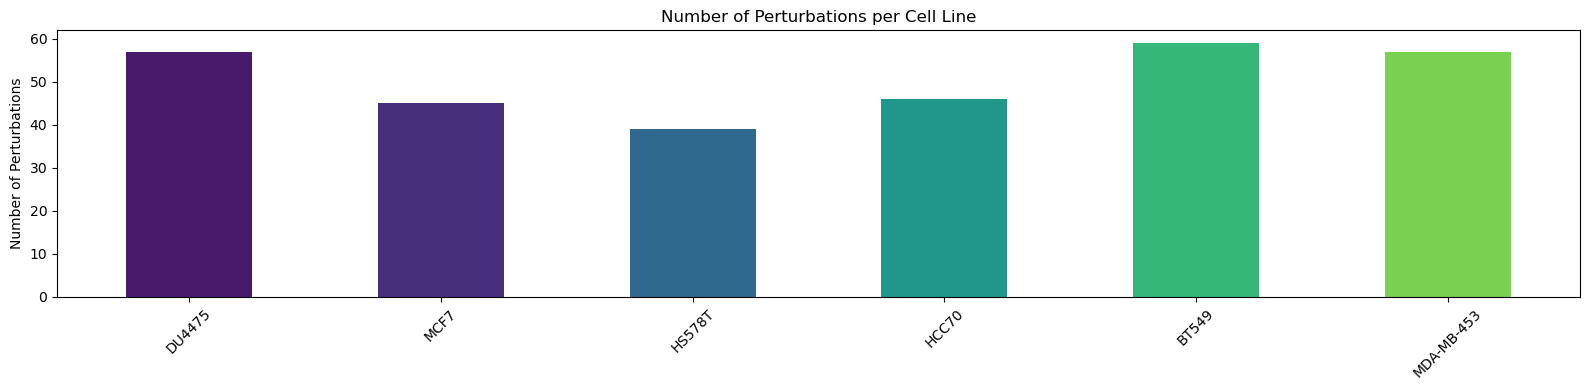

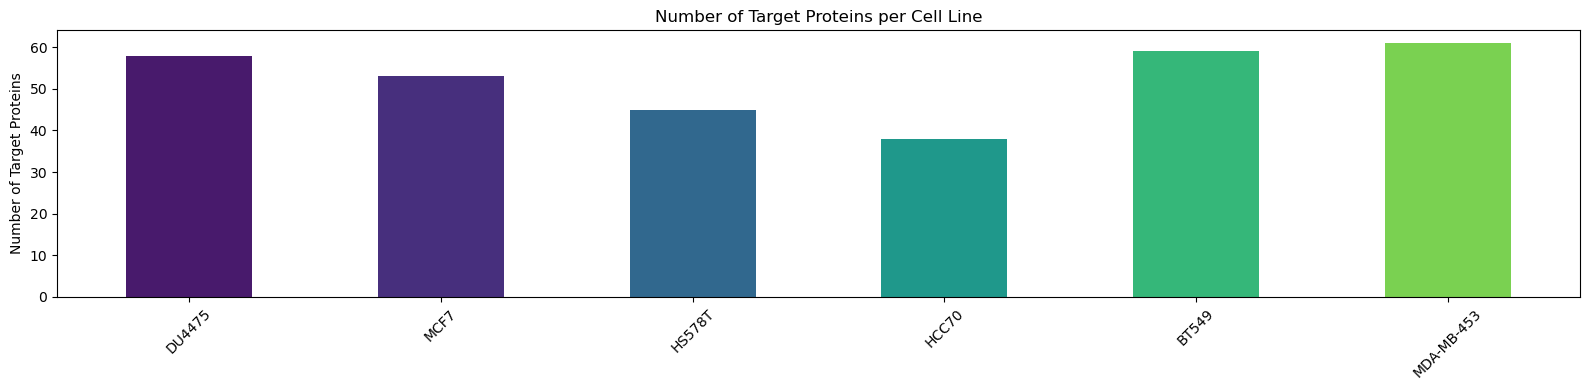

In [30]:
# Bar plots for number of perturbations (rows) and number of target proteins (columns) per cell line
# Now using 24hr proteins

cell_lines = list(tgt_prots_raw_24hr.keys())

# Count number of perturbations (rows) and number of target proteins (columns) for each cell line
n_perturbations = []
n_target_proteins = []
cell_lines = ['DU4475', 'MCF7', 'HS578T', 'HCC70', 'BT549', 'MDA-MB-453']
for cell_line in cell_lines:
    # Remove meta columns for accurate counts
    meta_cols_tgt = [col for col in tgt_prots_raw_24hr[cell_line].columns if col.startswith('meta_')]
    df_tgt = tgt_prots_raw_24hr[cell_line].drop(columns=meta_cols_tgt)
    n_perturbations.append(df_tgt.shape[0])
    n_target_proteins.append(df_tgt.shape[1])

# Create a DataFrame for plotting
df_counts = pd.DataFrame({
    'Cell Line': cell_lines,
    'Perturbations': n_perturbations,
    'Target Proteins': n_target_proteins
})

# Select 14 colors from the palette, then use colors 0,1,4,7,9,11 (0-based indexing, decremented by 1)
palette_14 = sns.color_palette("viridis", n_colors=14)
selected_colors = [palette_14[i] for i in [0, 1, 4, 7, 9, 11]]
pert_palette = selected_colors
prot_palette = selected_colors

# Plotting: Separate bar plots for perturbations and target proteins

# Plot for number of perturbations (rows) - each bar a different color
fig1, ax1 = plt.subplots(figsize=(16, 4))
x = np.arange(len(cell_lines))
bar_width = 0.5  # Reduce bar width to increase spacing
ax1.bar(x, df_counts['Perturbations'], color=pert_palette, width=bar_width)
ax1.set_xticks(x)
ax1.set_xticklabels(cell_lines, rotation=45)
ax1.set_ylabel('Number of Perturbations')
ax1.set_title('Number of Perturbations per Cell Line')
plt.tight_layout()
plt.show()

# Plot for number of target proteins (columns) - each bar a different color
fig2, ax2 = plt.subplots(figsize=(16, 4))
ax2.bar(x, df_counts['Target Proteins'], color=prot_palette, width=bar_width)
ax2.set_xticks(x)
ax2.set_xticklabels(cell_lines, rotation=45)
ax2.set_ylabel('Number of Target Proteins')
ax2.set_title('Number of Target Proteins per Cell Line')
plt.tight_layout()
plt.show()

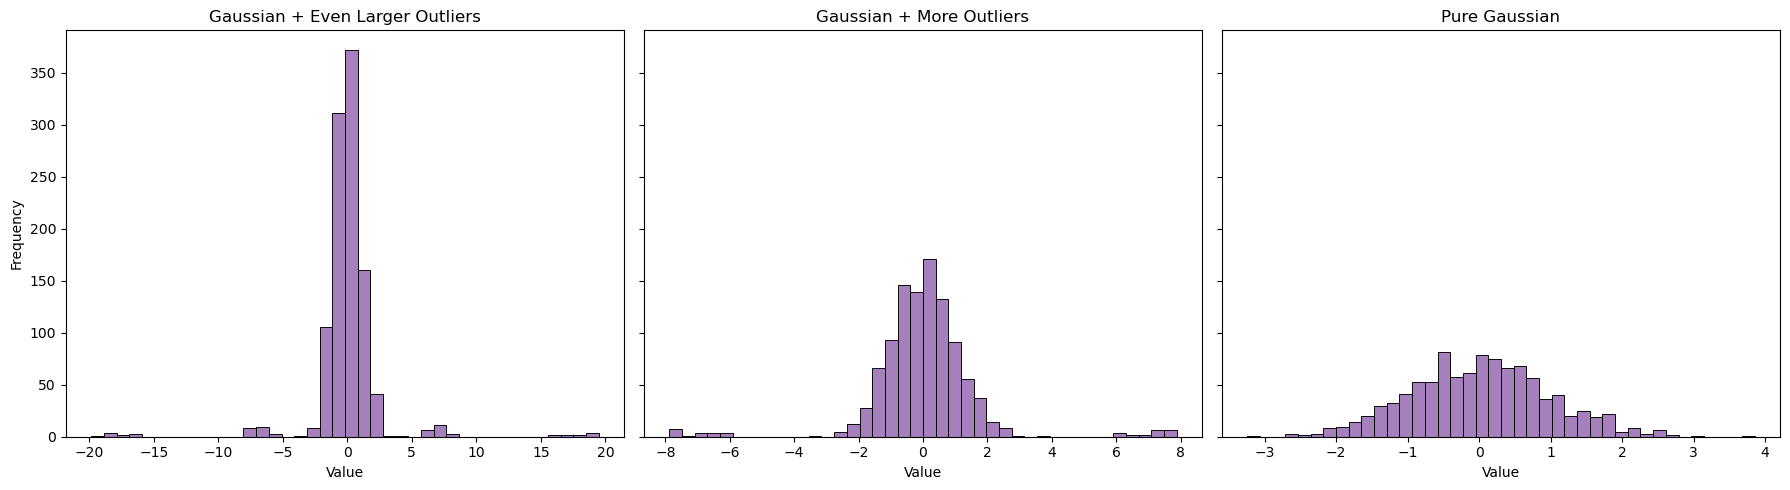

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# 1. Pure Gaussian
gaussian = np.random.normal(loc=0, scale=1, size=1000)

# 2. Gaussian with more outliers (increase number of outliers)
n_outliers_2 = 20  # Increased from 5 to 20
outliers_1 = np.random.uniform(low=6, high=8, size=n_outliers_2)
outliers_2 = np.random.uniform(low=-8, high=-6, size=n_outliers_2)
gaussian_with_outliers = np.concatenate([gaussian, outliers_1, outliers_2])

# 3. Gaussian with previous outliers + even more, larger outliers
n_more_outliers_3 = 10  # Increased from 3 to 10
# These new outliers have larger magnitude than those in graph 2
more_outliers_1 = np.random.uniform(low=16, high=20, size=n_more_outliers_3)
more_outliers_2 = np.random.uniform(low=-20, high=-16, size=n_more_outliers_3)
gaussian_with_more_outliers = np.concatenate([gaussian_with_outliers, more_outliers_1, more_outliers_2])

# Plotting - all the same color
hist_color = '#8856a7'

fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Flip the order of the graphs: rightmost is pure Gaussian, leftmost is Gaussian + even more, larger outliers

# Plot 1: Gaussian + Even More, Larger Outliers (leftmost)
sns.histplot(gaussian_with_more_outliers, bins=40, color=hist_color, edgecolor='black', ax=axs[0])
axs[0].set_title('Step 1')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

# Plot 2: Gaussian + More Outliers (middle)
sns.histplot(gaussian_with_outliers, bins=40, color=hist_color, edgecolor='black', ax=axs[1])
axs[1].set_title('Step i')
axs[1].set_xlabel('Value')

# Plot 3: Pure Gaussian (rightmost)
sns.histplot(gaussian, bins=40, color=hist_color, edgecolor='black', ax=axs[2])
axs[2].set_title('End')
axs[2].set_xlabel('Value')

plt.tight_layout()
plt.show()


In [31]:
#pipeline setup for all timepoints

saved_filter_dir=r'filtering_results'


pipeline_steps_tgt=[['filter_proteins_with_control', '_'],
                ['log2_transform_by_control', '_'],
                ['filter_incomplete_proteins', '.95'],
                ['filter_incomplete_experiments', '.95'],
                ['fill_na_with_mean', '_'],
                # ['filter_keep_low_cv', '.8'],
                # ['remove_outlier_proteins', '10'],
                ['filter_by_mutual_information', '.001','meta_Inhi_5'],
                # ['iterative_signal_filtering', '2.5'],
                # ['spearman_corr_filtering', '0.2','meta_Inhi_5'],
                # ['pearson_corr_filtering', '0.2','meta_Inhi_5']
                ]

pipeline_steps_nontgt=[['filter_proteins_with_control', '_'],
                ['log2_transform_by_control', '_'],
                ['filter_incomplete_proteins', '.8'],
                ['filter_incomplete_experiments', '.8'],
                ['fill_na_with_mean', '_'],
                # ['filter_keep_low_cv', '.8'],
                # ['remove_outlier_proteins', '10'],
                ['filter_by_mutual_information', '.001','meta_Inhi_5'],
                ['iterative_signal_filtering', '3'],
                ['spearman_corr_filtering', '0.2','meta_Inhi_5'],
                ['pearson_corr_filtering', '0.2','meta_Inhi_5'],
                ['noise injected', '_']
                ]
config={'print_flag':False,'graph_flag':True,'graph_type':'hist','filter_flag':True,'verbose':True}
#//////////LOO regression////////////////////////////
from sklearn.linear_model import ElasticNetCV

elasticnet_model= ElasticNetCV(
    alphas=[0.001, 0.01, 0.1, 1.0, 10.0],           # Alpha values to scan
    l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9],            # L1 ratio values to scan
    cv=5,                                            # 5-fold CV for parameter selection
    random_state=42,
    max_iter=5000
)

targeted proteins 6hr
applying filter 1 of 6: ['filter_proteins_with_control', '_']
filtering proteins with control values


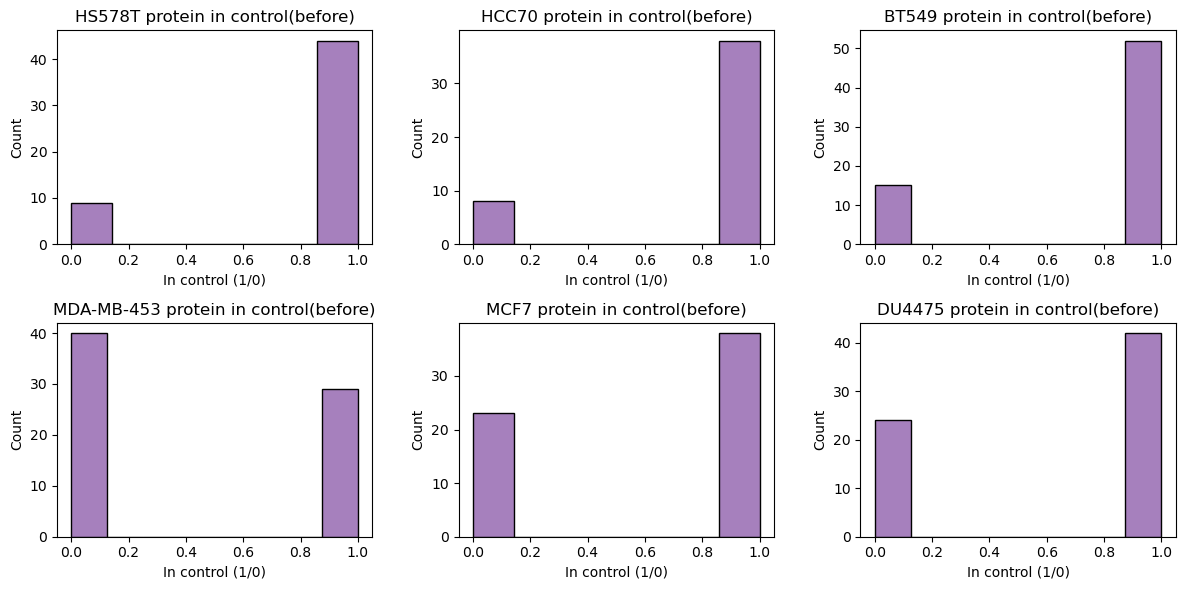

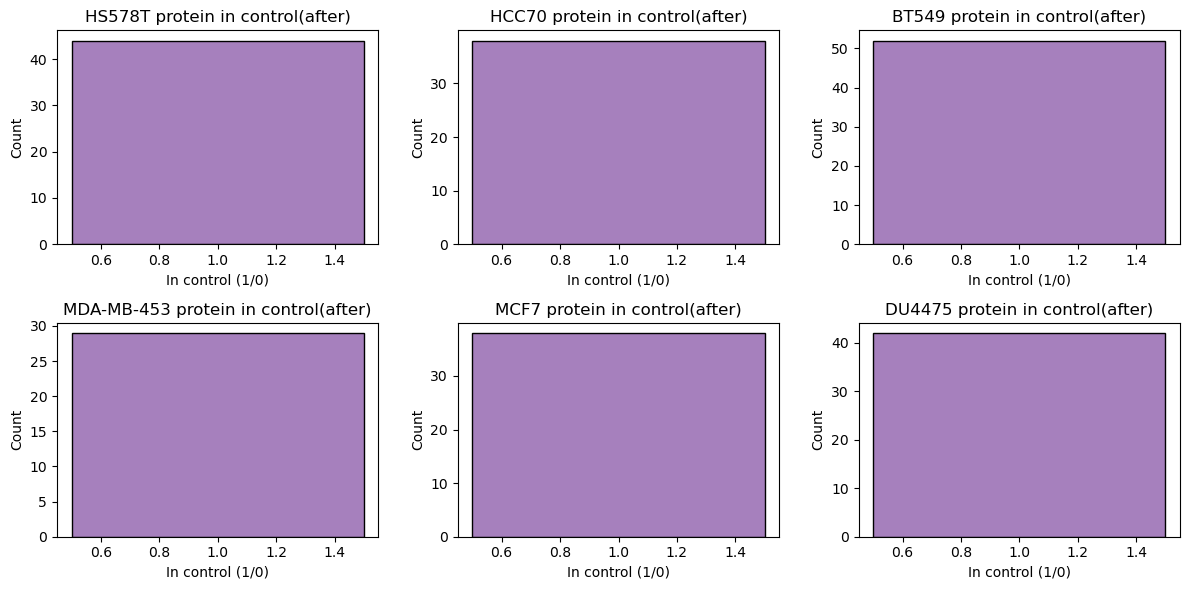

applying filter 2 of 6: ['log2_transform_by_control', '_']
log2 transforming by control
applying filter 3 of 6: ['filter_incomplete_proteins', '.95']
filtering incomplete proteins
[HS578T] 44 cols -> 25 prots
[HCC70] 38 cols -> 20 prots
[BT549] 52 cols -> 38 prots
[MDA-MB-453] 29 cols -> 19 prots
[MCF7] 38 cols -> 26 prots
[DU4475] 42 cols -> 20 prots


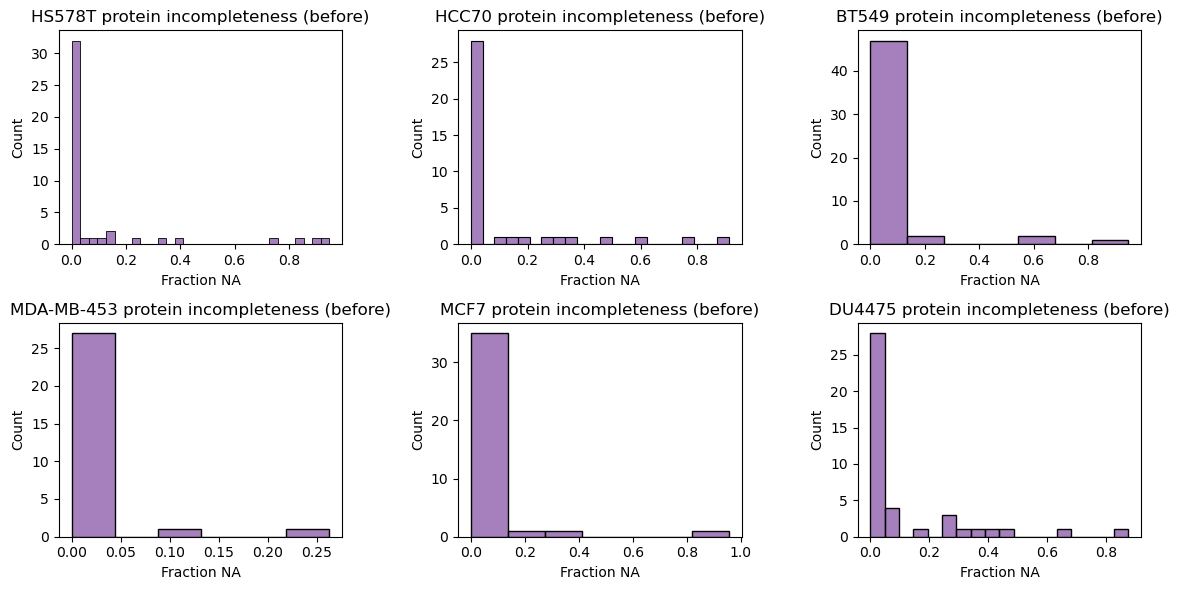

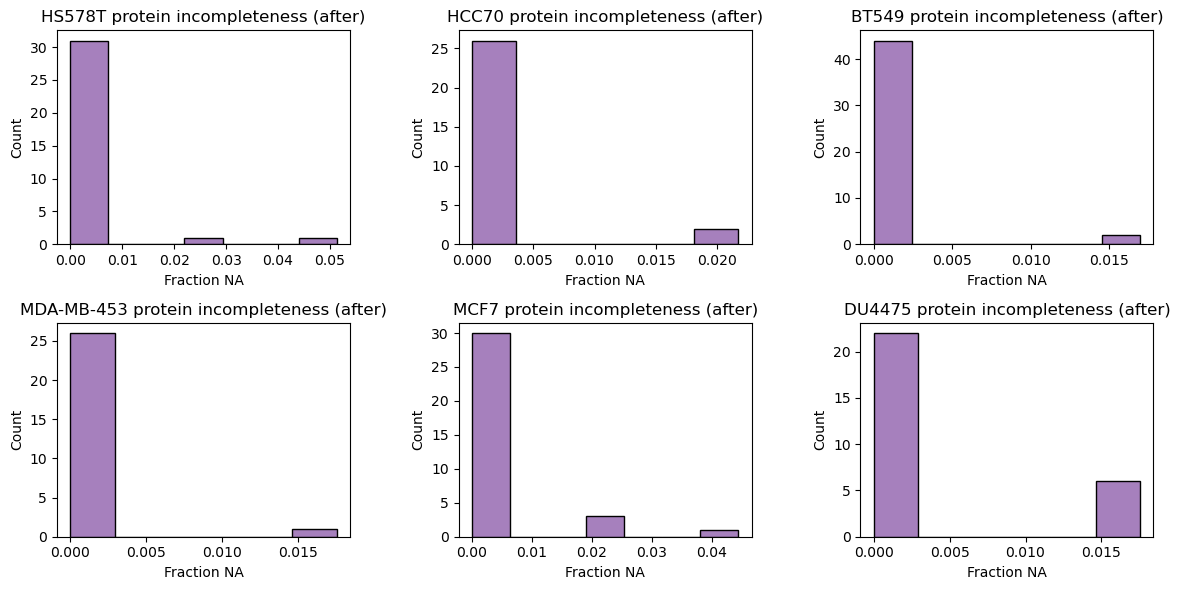

applying filter 4 of 6: ['filter_incomplete_experiments', '.95']
filtering incomplete experiments
[HS578T] 39 experiments -> 39 experiments, 25 prots
[HCC70] 46 experiments -> 46 experiments, 20 prots
[BT549] 59 experiments -> 59 experiments, 38 prots
[MDA-MB-453] 57 experiments -> 57 experiments, 19 prots
[MCF7] 45 experiments -> 44 experiments, 26 prots
[DU4475] 57 experiments -> 56 experiments, 20 prots


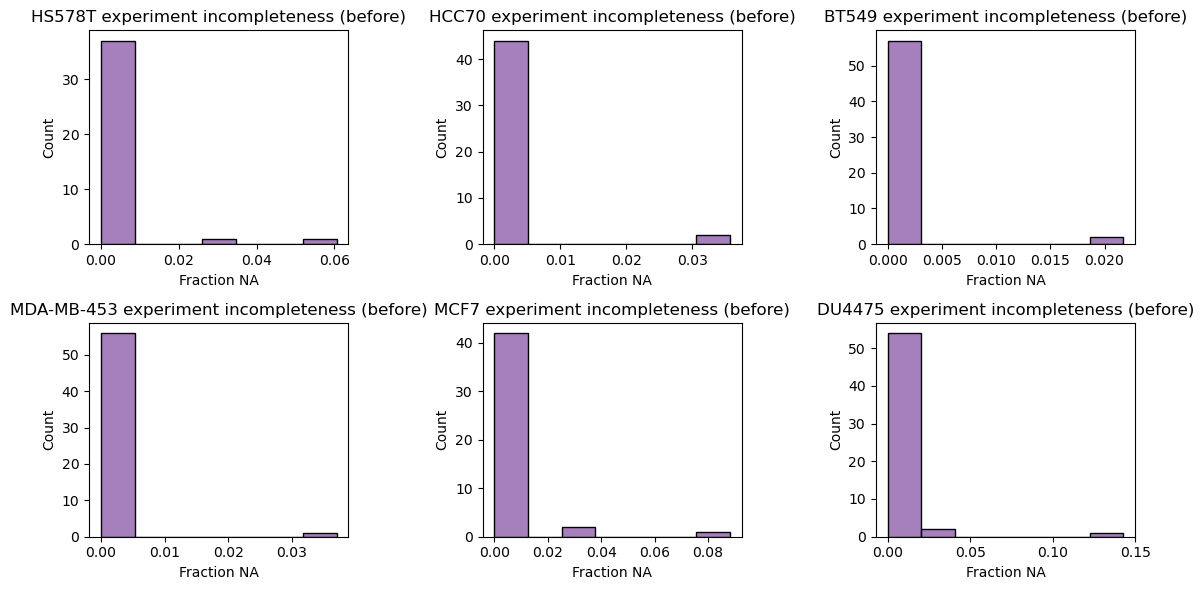

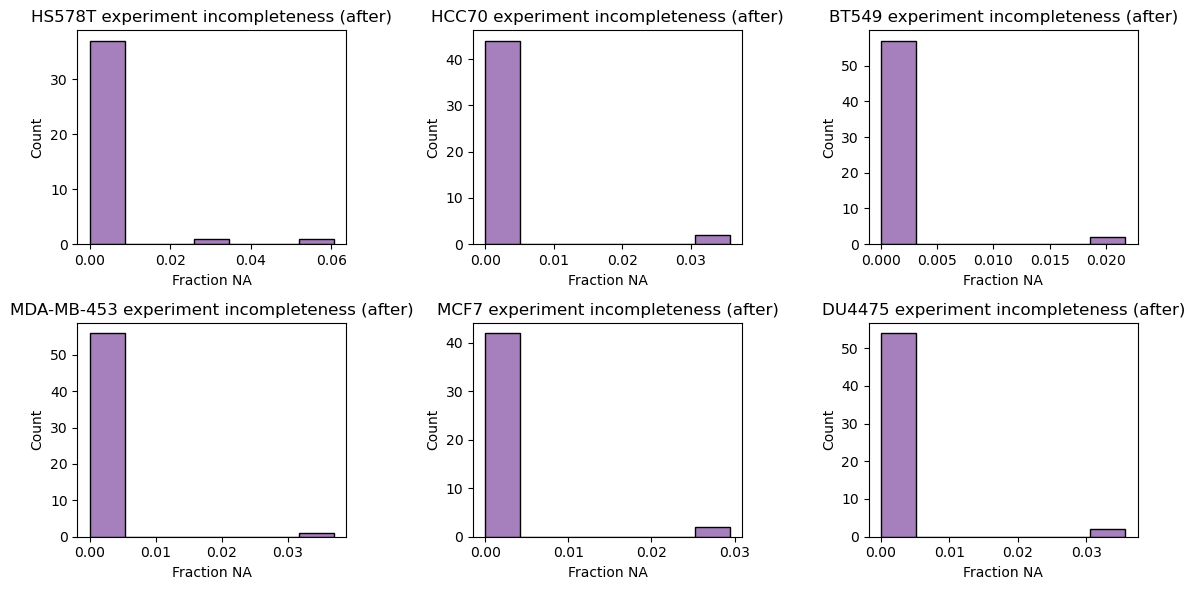

applying filter 5 of 6: ['fill_na_with_mean', '_']
filling na with mean


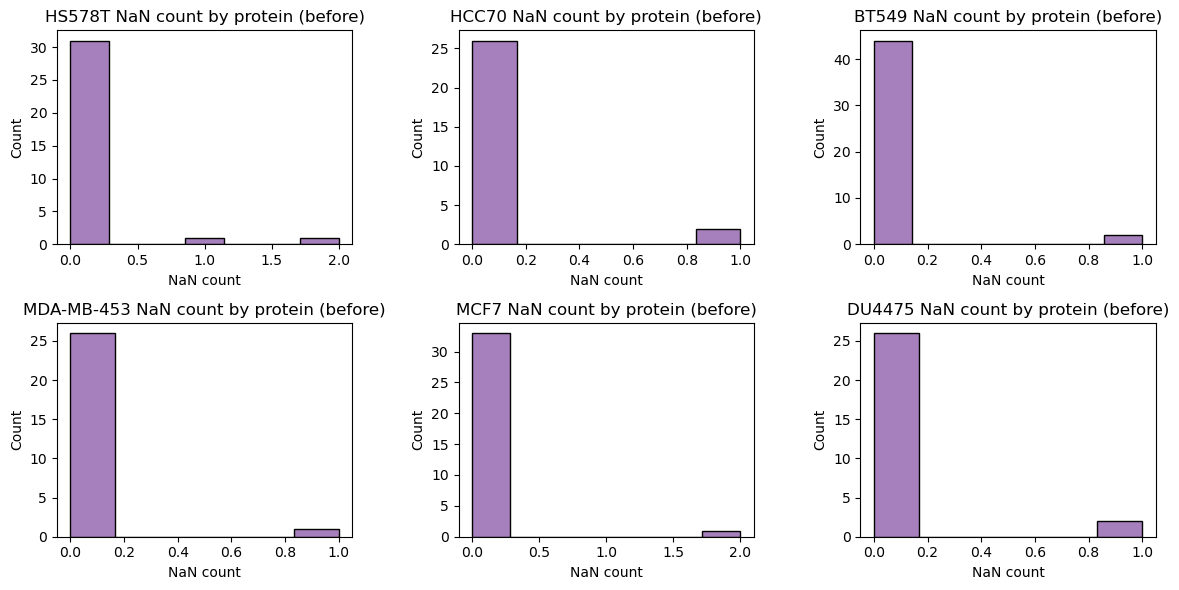

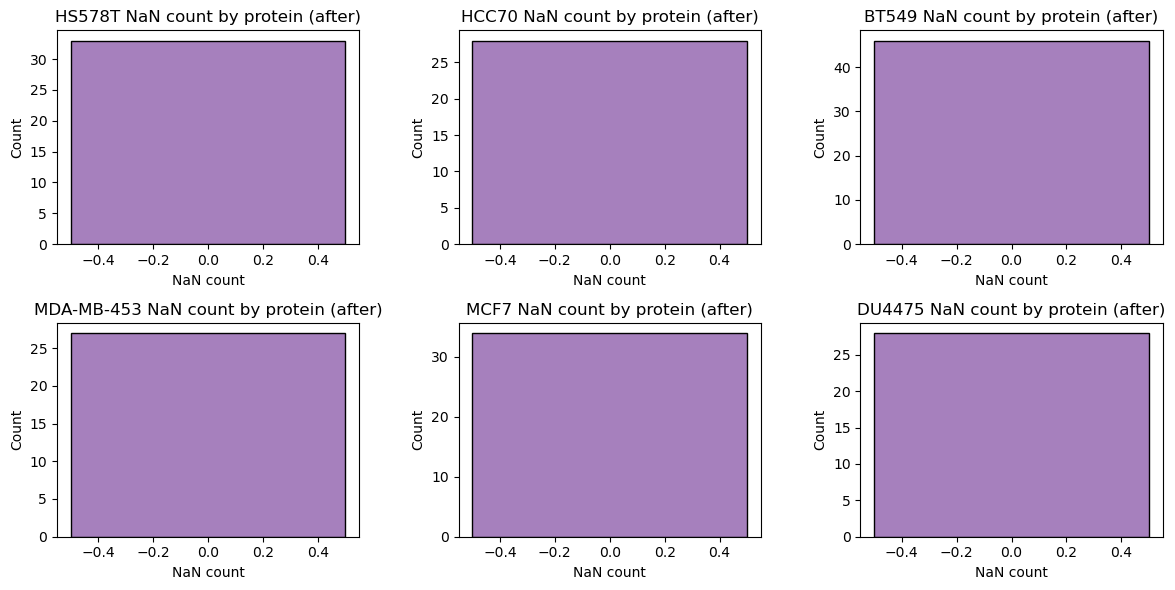

applying filter 6 of 6: ['filter_by_mutual_information', '.001', 'meta_Inhi_5']
filtering by mutual information


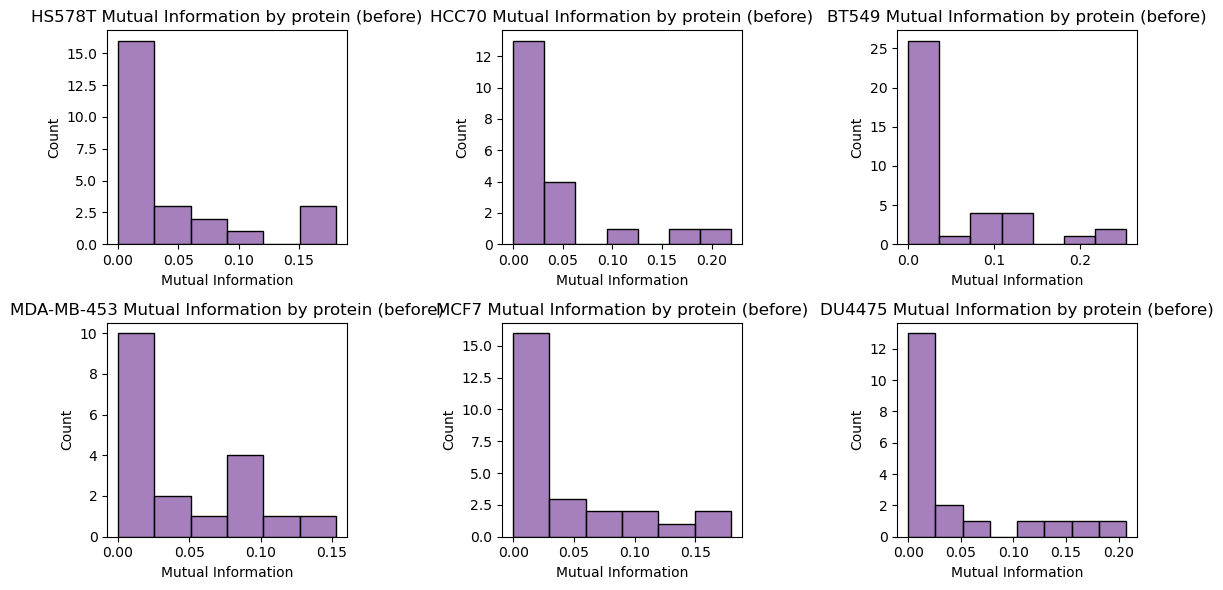

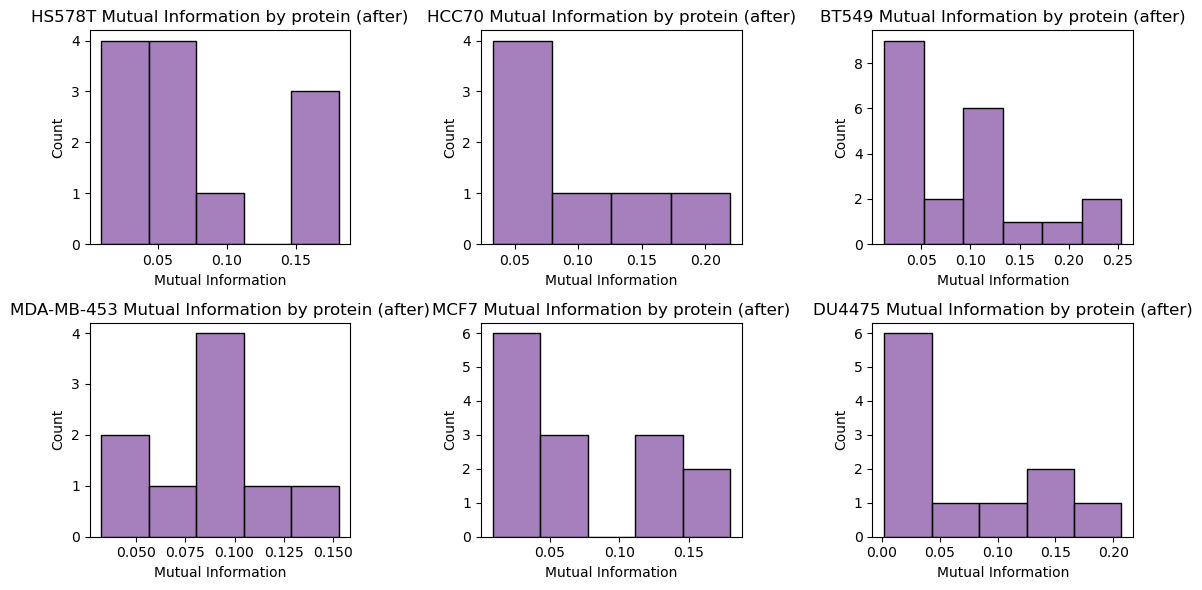

////////////Hash:   5c10e6   ///////////////////////////
+------------------------------------------+----------+---------+---------+--------------+--------+----------+
|                                          |   HS578T |   HCC70 |   BT549 |   MDA-MB-453 |   MCF7 |   DU4475 |
+==========================================+==========+=========+=========+==============+========+==========+
| raw_data                                 |       45 |      38 |      59 |           61 |     53 |       58 |
+------------------------------------------+----------+---------+---------+--------------+--------+----------+
| step_1_filter_proteins_with_control__    |       36 |      30 |      44 |           21 |     30 |       34 |
+------------------------------------------+----------+---------+---------+--------------+--------+----------+
| step_2_log2_transform_by_control__       |       36 |      30 |      44 |           21 |     30 |       34 |
+------------------------------------------+----------+

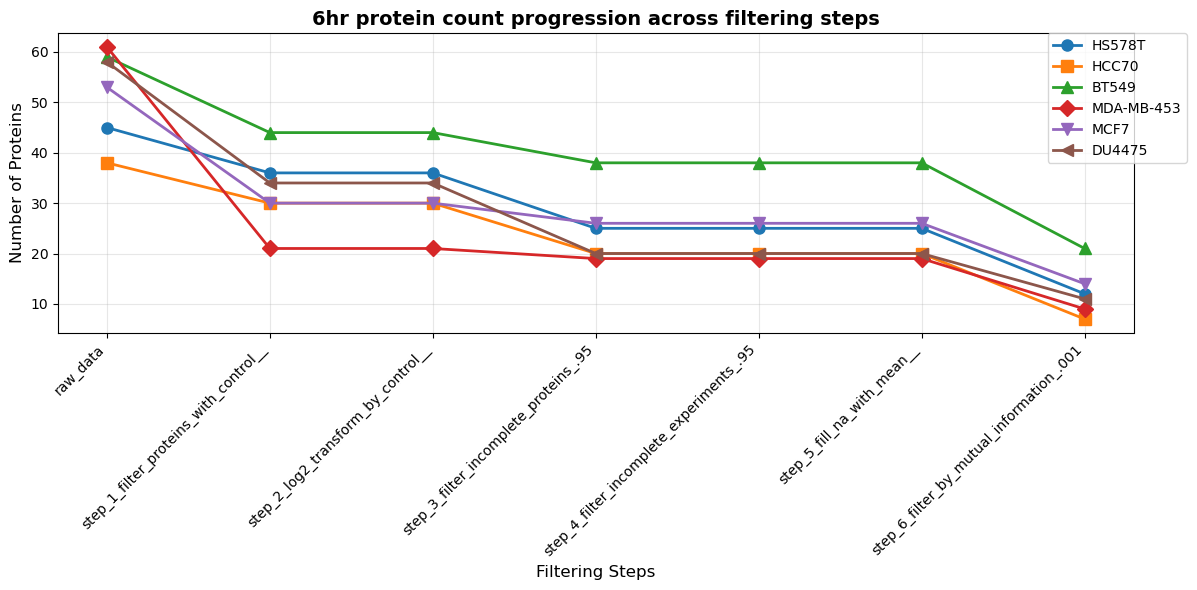

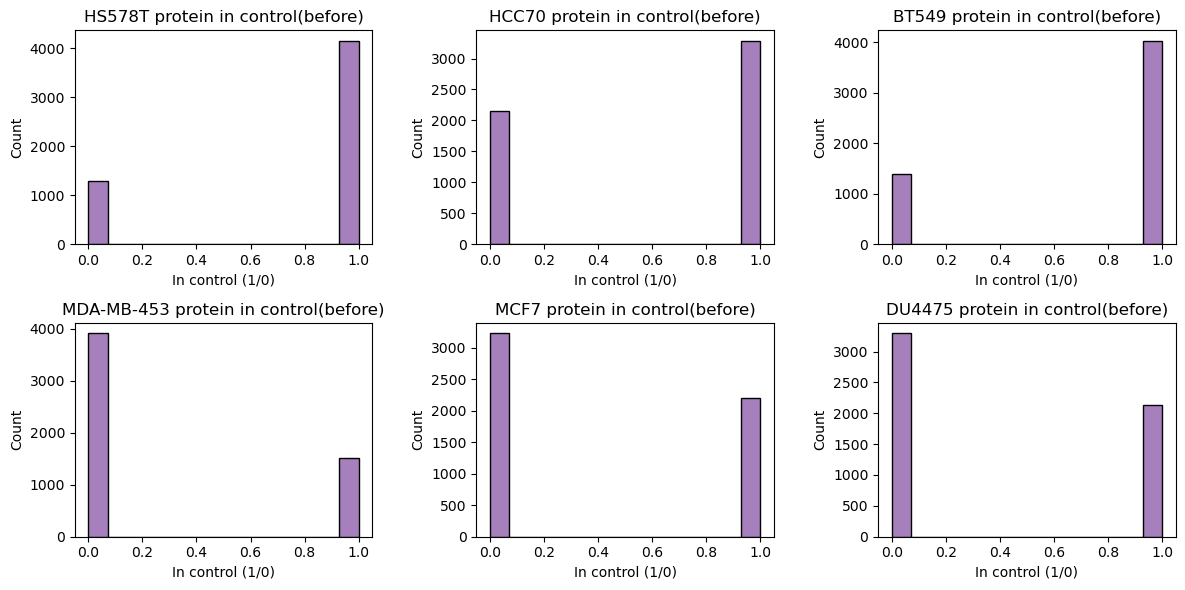

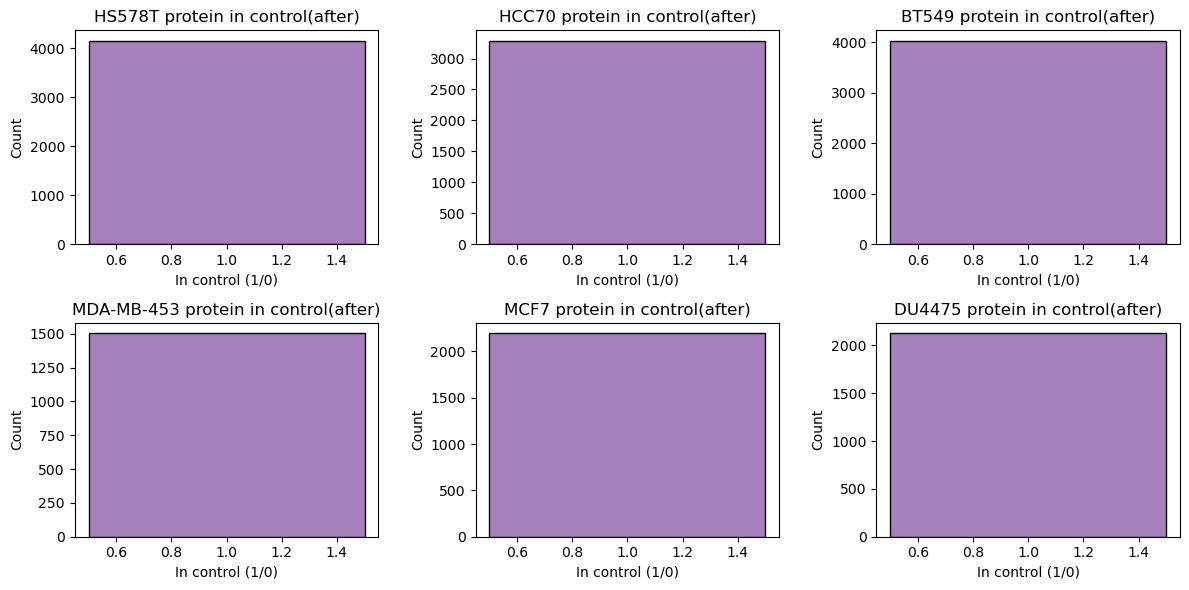

applying filter 2 of 10: ['log2_transform_by_control', '_']
log2 transforming by control
applying filter 3 of 10: ['filter_incomplete_proteins', '.8']
filtering incomplete proteins
[HS578T] 4153 cols -> 3053 prots
[HCC70] 3291 cols -> 2583 prots
[BT549] 4037 cols -> 3077 prots
[MDA-MB-453] 1506 cols -> 1427 prots
[MCF7] 2198 cols -> 2037 prots
[DU4475] 2129 cols -> 1666 prots


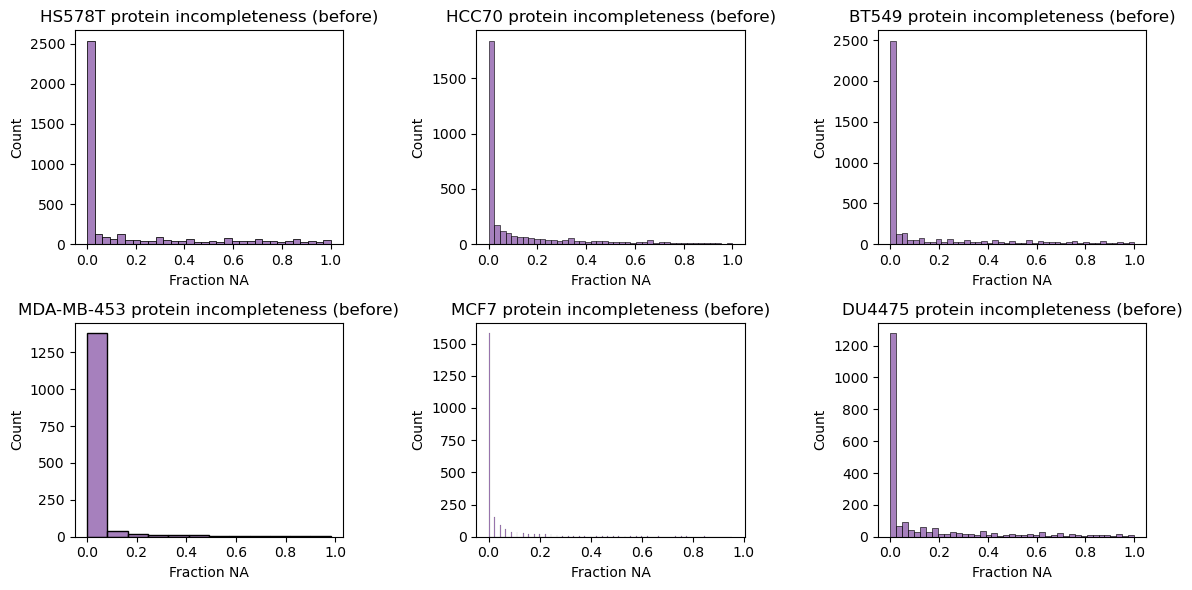

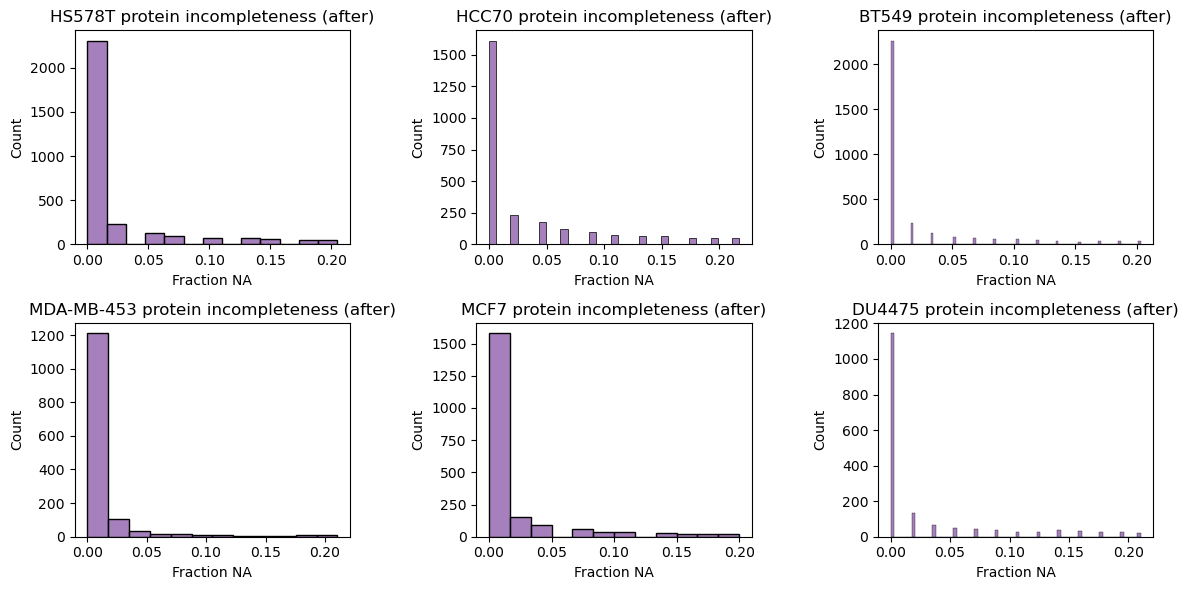

applying filter 4 of 10: ['filter_incomplete_experiments', '.8']
filtering incomplete experiments
[HS578T] 39 experiments -> 39 experiments, 3053 prots
[HCC70] 46 experiments -> 45 experiments, 2583 prots
[BT549] 59 experiments -> 59 experiments, 3077 prots
[MDA-MB-453] 57 experiments -> 57 experiments, 1427 prots
[MCF7] 45 experiments -> 45 experiments, 2037 prots
[DU4475] 57 experiments -> 57 experiments, 1666 prots


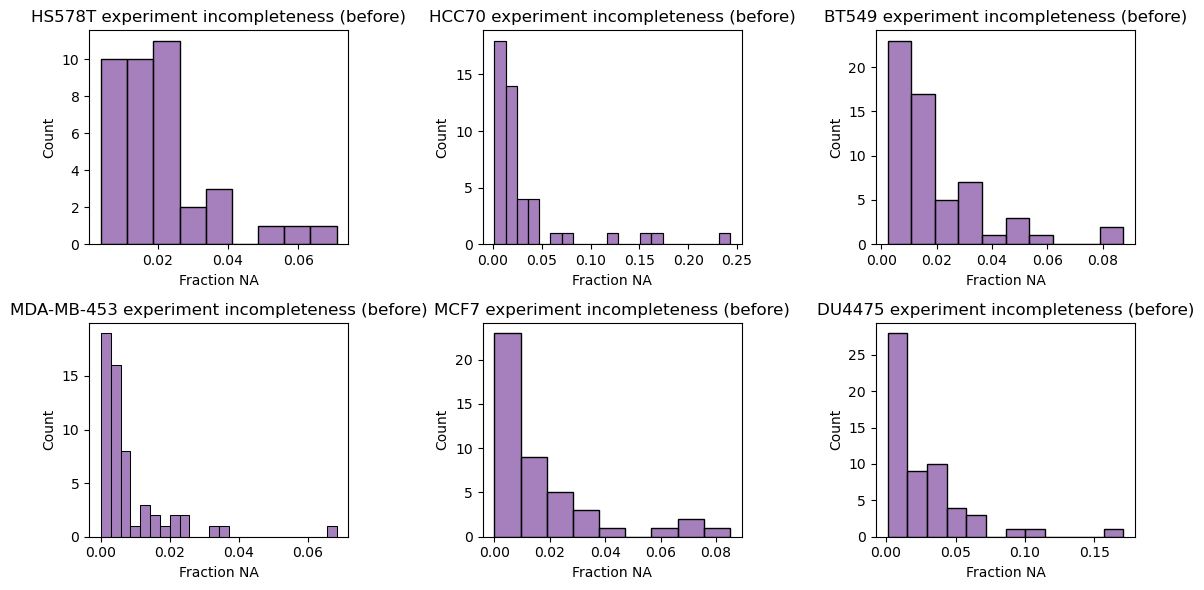

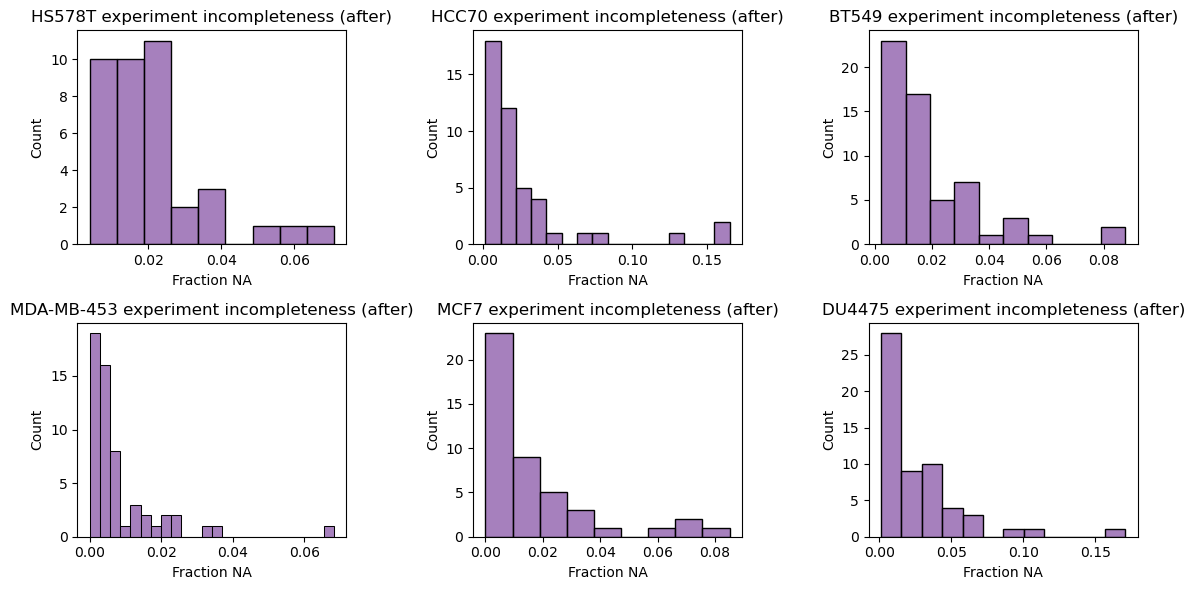

applying filter 5 of 10: ['fill_na_with_mean', '_']
filling na with mean


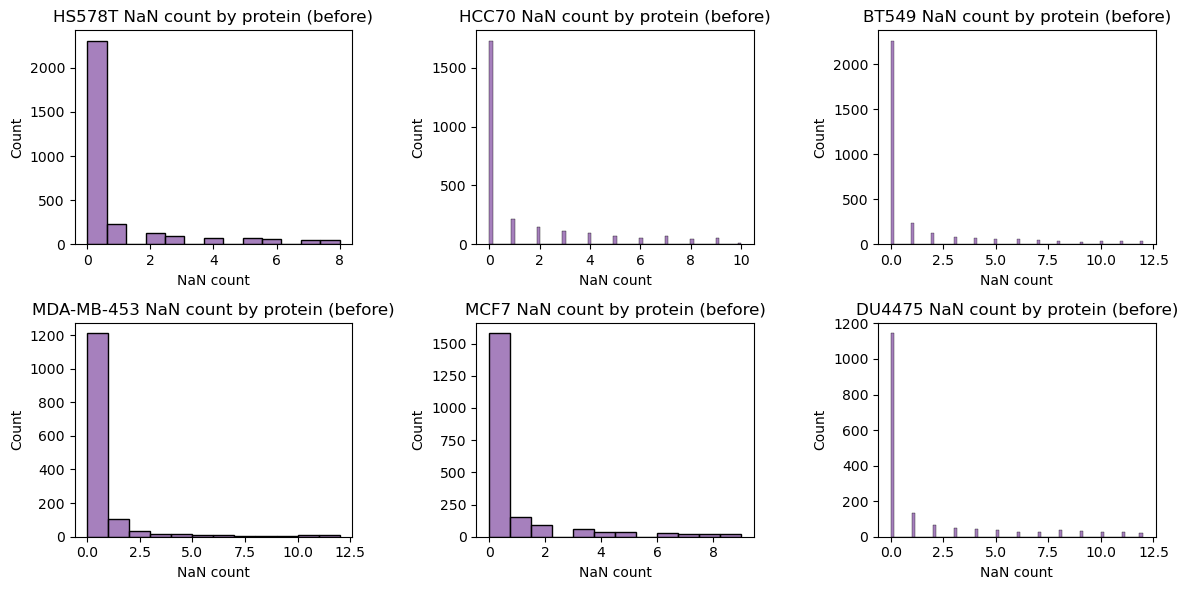

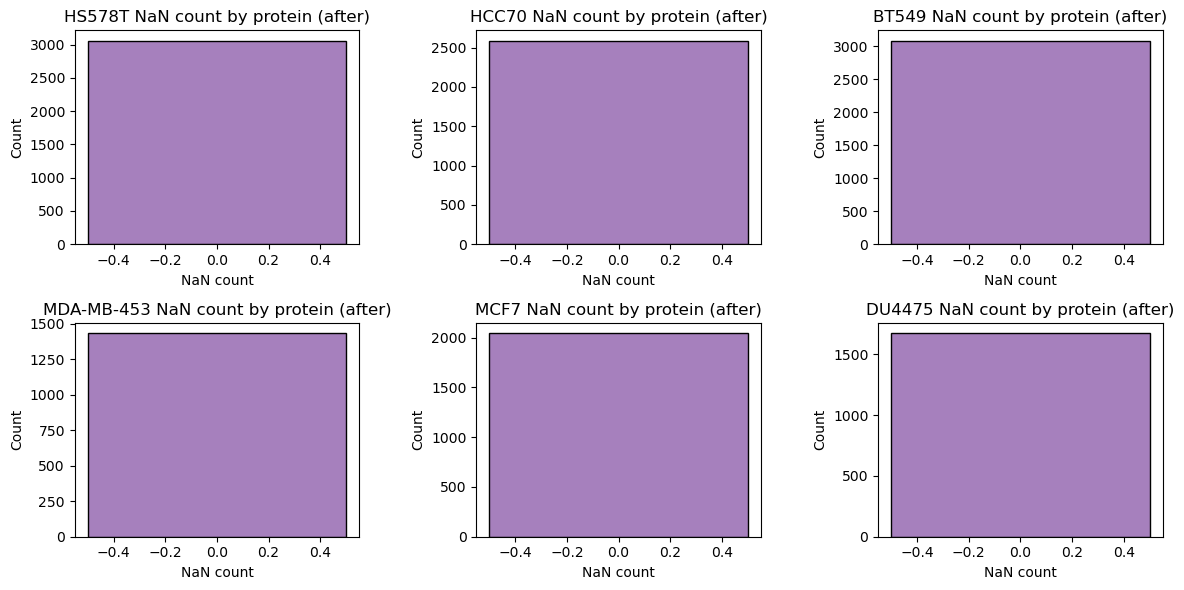

applying filter 6 of 10: ['filter_by_mutual_information', '.001', 'meta_Inhi_5']
filtering by mutual information


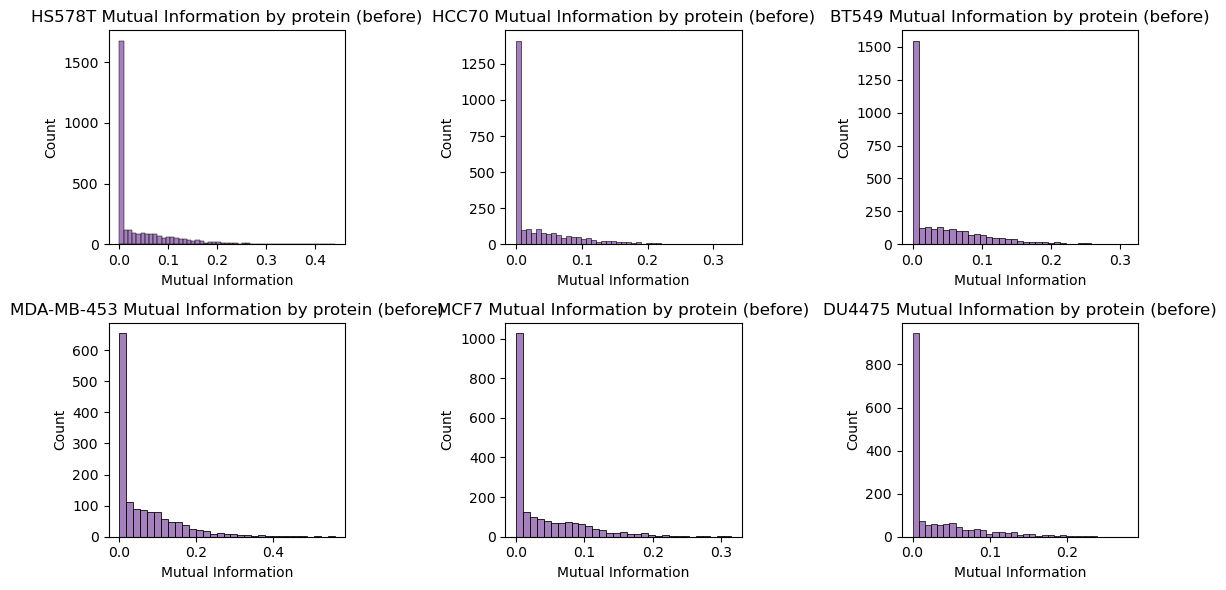

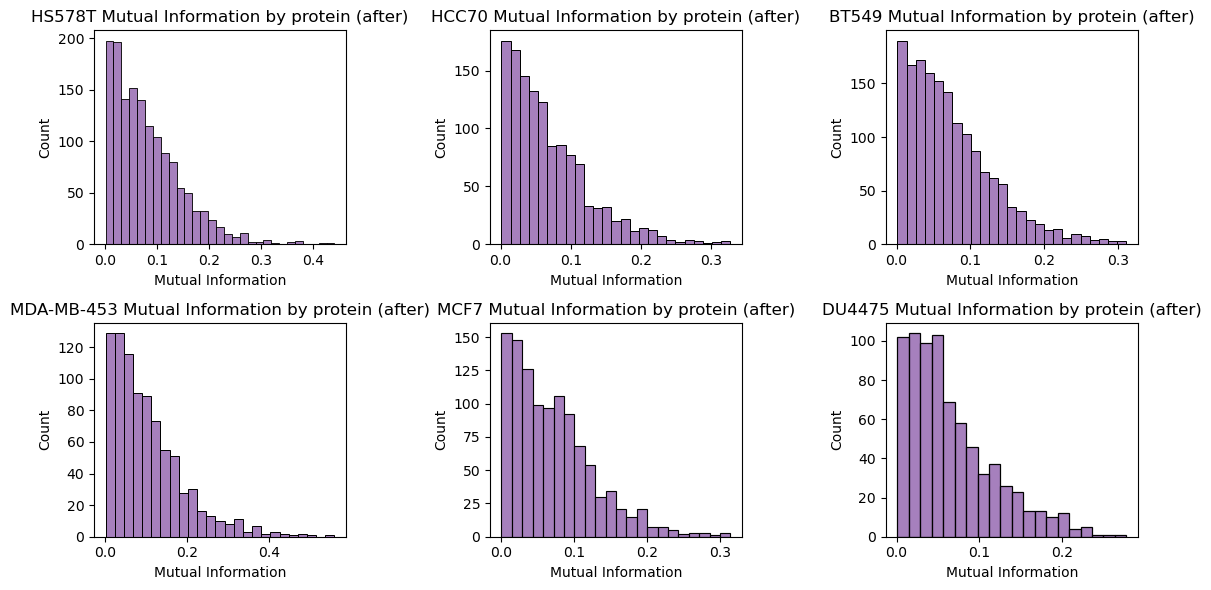

applying filter 7 of 10: ['iterative_signal_filtering', '3']
filtering using iterative SNR filtering
graphing not implemented
applying filter 8 of 10: ['spearman_corr_filtering', '0.2', 'meta_Inhi_5']
filtering by spearman correlation


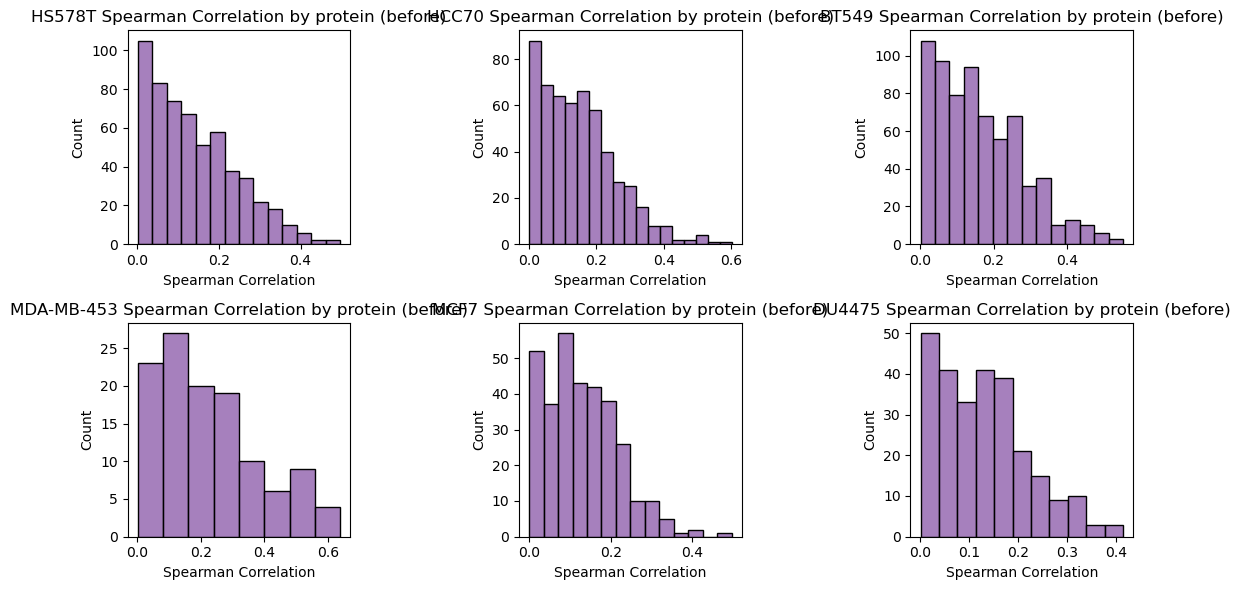

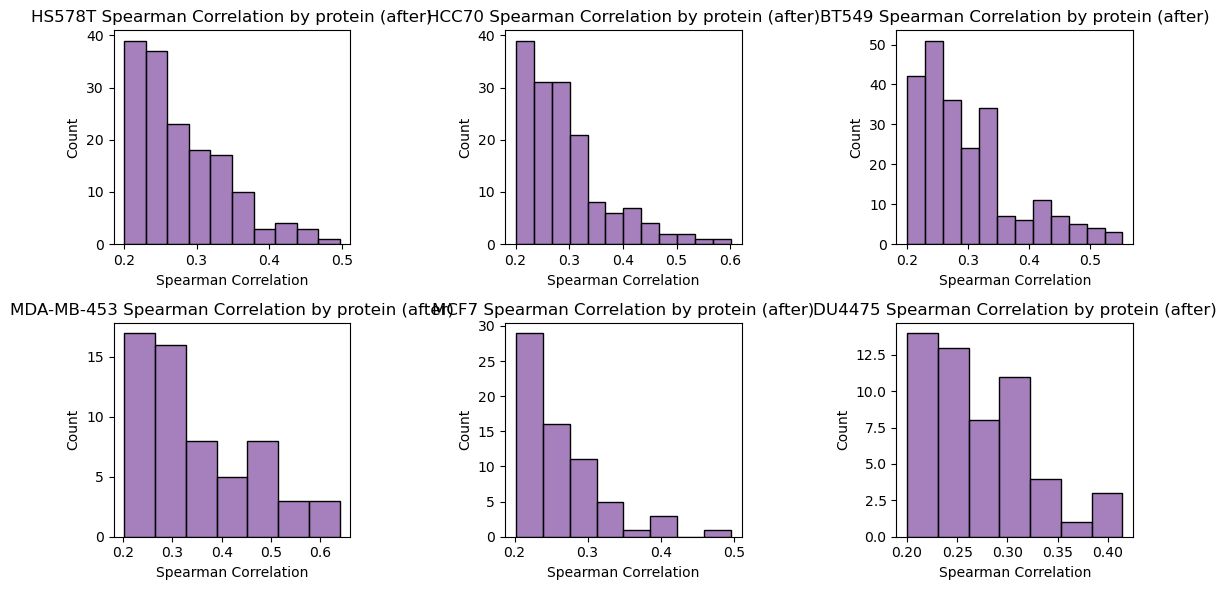

applying filter 9 of 10: ['pearson_corr_filtering', '0.2', 'meta_Inhi_5']
filtering by pearson correlation


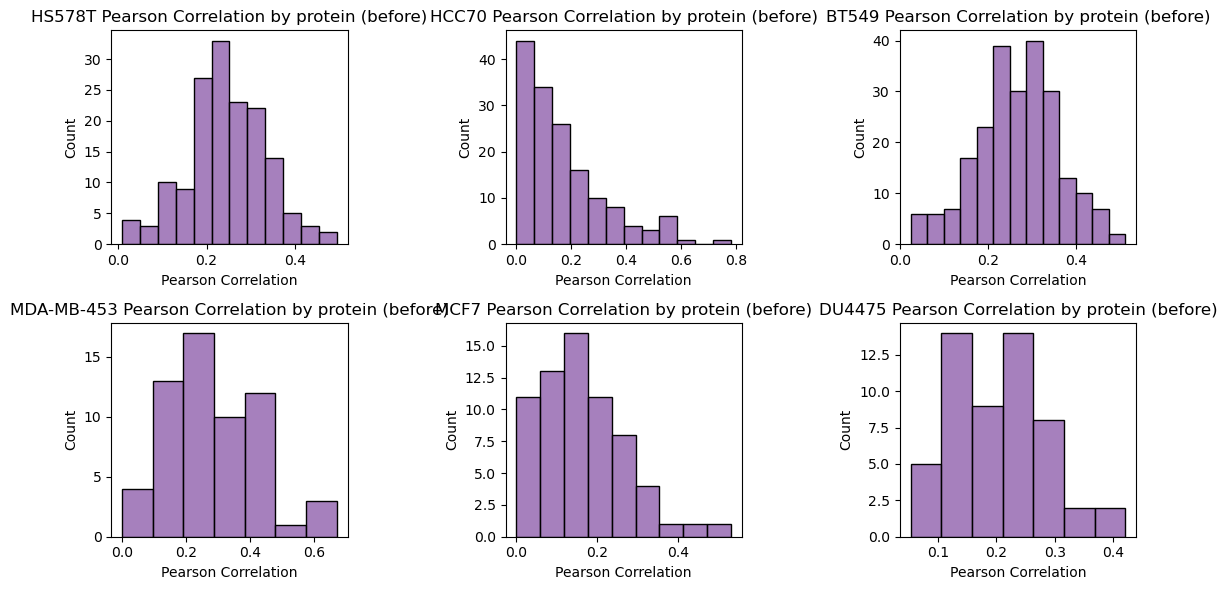

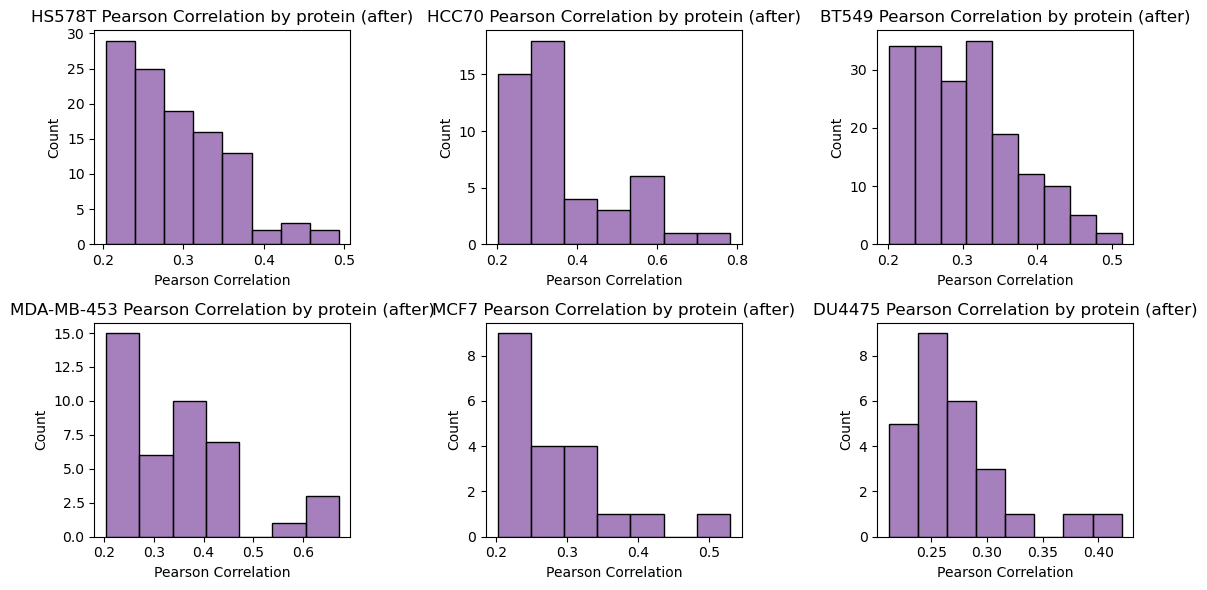

applying filter 10 of 10: ['noise injected', '_']
filter ['noise injected', '_'] not found
////////////Hash:   d23851   ///////////////////////////
+------------------------------------------+----------+---------+---------+--------------+--------+----------+
|                                          |   HS578T |   HCC70 |   BT549 |   MDA-MB-453 |   MCF7 |   DU4475 |
+==========================================+==========+=========+=========+==============+========+==========+
| raw_data                                 |     5434 |    5441 |    5420 |         5418 |   5426 |     5421 |
+------------------------------------------+----------+---------+---------+--------------+--------+----------+
| step_1_filter_proteins_with_control__    |     4145 |    3283 |    4029 |         1498 |   2190 |     2121 |
+------------------------------------------+----------+---------+---------+--------------+--------+----------+
| step_2_log2_transform_by_control__       |     4145 |    3283 |    4029 |

Processing cell lines:  17%|█▋        | 1/6 [00:02<00:12,  2.41s/it]

[HS578T] LOO R2: 0.677 | MSE: 0.041 | Pearson: 0.823 | Features: 109


Processing cell lines:  33%|███▎      | 2/6 [00:04<00:09,  2.29s/it]

[HCC70] LOO R2: 0.394 | MSE: 0.654 | Pearson: 0.636 | Features: 48


Processing cell lines:  50%|█████     | 3/6 [00:11<00:12,  4.24s/it]

[BT549] LOO R2: 0.263 | MSE: 0.224 | Pearson: 0.528 | Features: 179


Processing cell lines:  67%|██████▋   | 4/6 [00:13<00:06,  3.40s/it]

[MDA-MB-453] LOO R2: 0.354 | MSE: 0.900 | Pearson: 0.595 | Features: 42


Processing cell lines:  83%|████████▎ | 5/6 [00:14<00:02,  2.63s/it]

[MCF7] LOO R2: 0.147 | MSE: 0.241 | Pearson: 0.391 | Features: 20


Processing cell lines: 100%|██████████| 6/6 [00:16<00:00,  2.71s/it]


[DU4475] LOO R2: 0.218 | MSE: 0.632 | Pearson: 0.487 | Features: 26


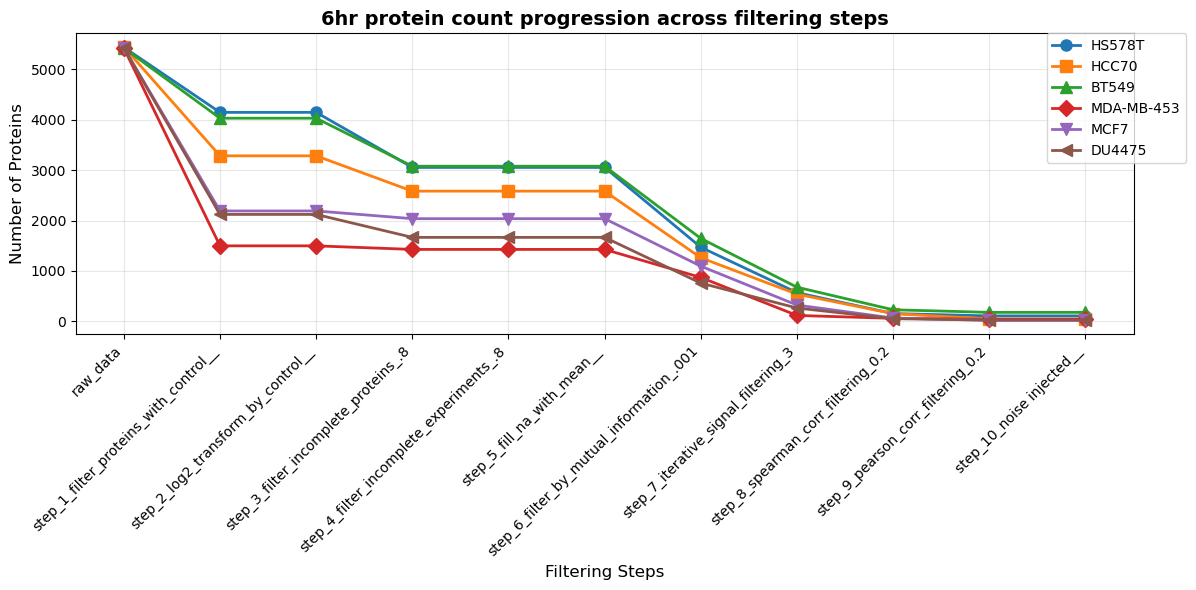

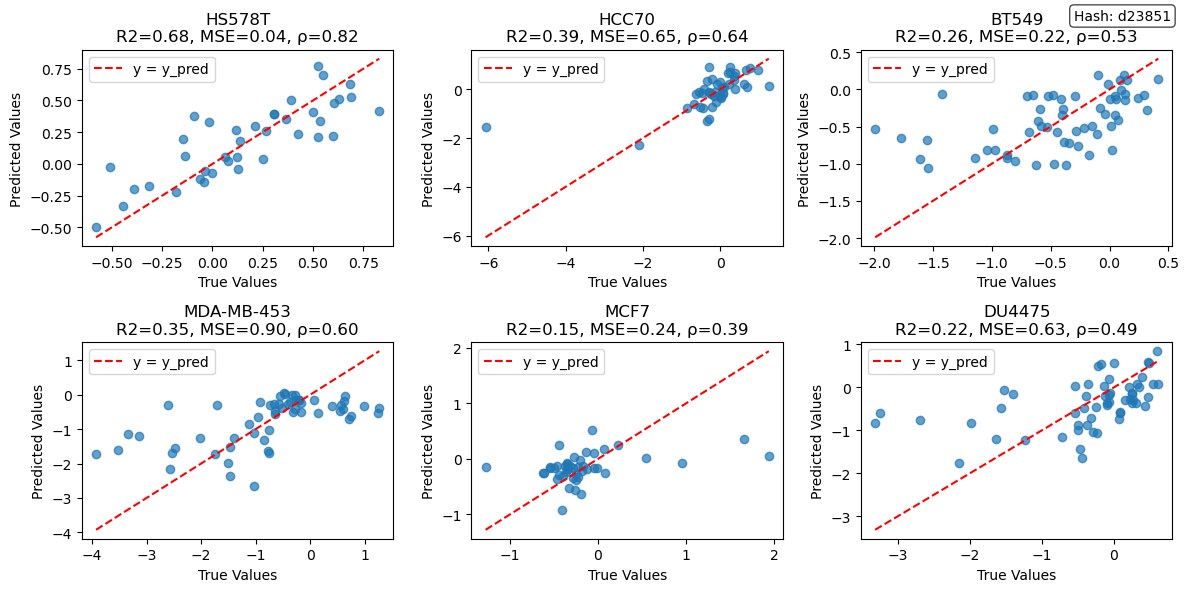

In [32]:
#6hr pipeline
print('targeted proteins 6hr')
six_hr_tgt_pipeline=filtering_pipeline(tgt_prots_raw_6hr,data_6hr['cell_lines'],data_6hr['control_data_by_cell_line'],'6hr',data_6hr['control_data_by_cell_line_coeffvar'],**config)
hd_six_tgt=six_hr_tgt_pipeline.run_pipeline(pipeline_steps_tgt)#,save_dir=saved_filter_dir,tgt='tgt')
sum_six_tgt=six_hr_tgt_pipeline.summary_of_pipeline()
six_hr_tgt_pipeline.save_pipeline(saved_filter_dir,tgt='tgt')

six_hr_non_tgt_pipeline=filtering_pipeline(non_tgt_prots_raw_6hr,data_6hr['cell_lines'],data_6hr['control_data_by_cell_line'],'6hr',data_6hr['control_data_by_cell_line_coeffvar'],**config)
hd_six_non_tgt=six_hr_non_tgt_pipeline.run_pipeline(pipeline_steps_nontgt)#,save_dir=saved_filter_dir,tgt='nontgt')
sum_six_non_tgt=six_hr_non_tgt_pipeline.summary_of_pipeline()
six_hr_non_tgt_pipeline.save_pipeline(saved_filter_dir,tgt='nontgt')
#inject noise after all the filtering happens

# six_hr_non_tgt_pipeline.noise_stability_test(mean_array=[0,1,1,1,1,1,1,1,1,1],sigma_array=[0,.001,.005,.01,.05,.1,.2,.4,.8,1])
# noisy_data=six_hr_non_tgt_pipeline.inject_noise(mean_mult=0,sigma_mult=0)

_=six_hr_non_tgt_pipeline.run_loo_regression(ycol='meta_Inhi_5',model=elasticnet_model)

# plot_protein_correlation_heatmaps(six_hr_tgt_pipeline.final_filtered_data,cell_lines)
# plot_protein_correlation_heatmaps(six_hr_non_tgt_pipeline.final_filtered_data,cell_lines)

targeted proteins 24hr
applying filter 1 of 6: ['filter_proteins_with_control', '_']
filtering proteins with control values


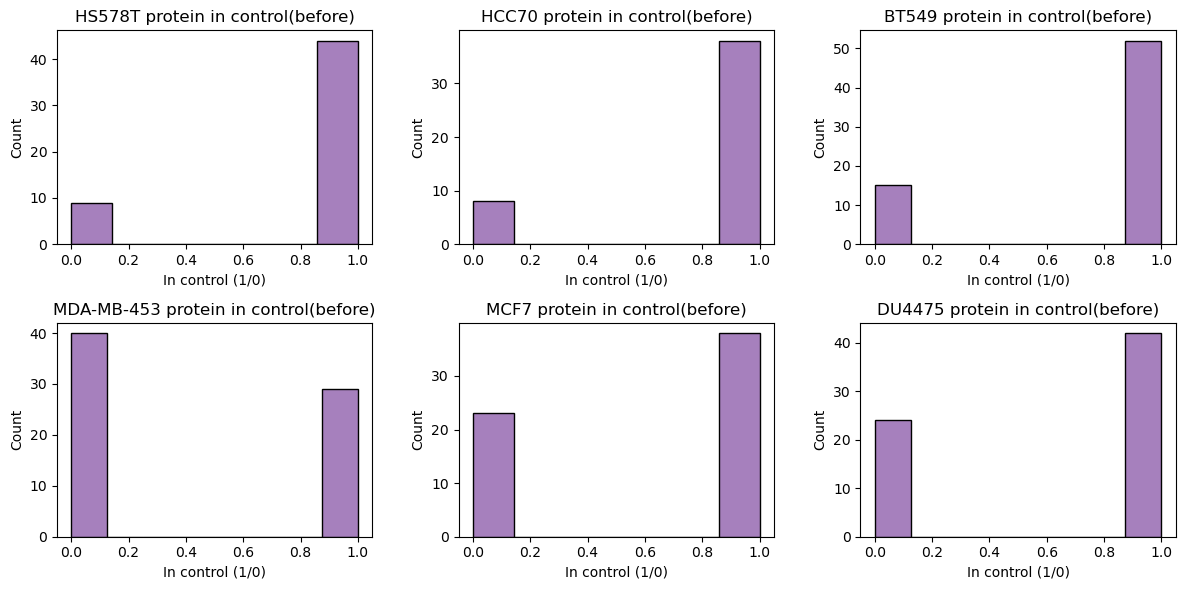

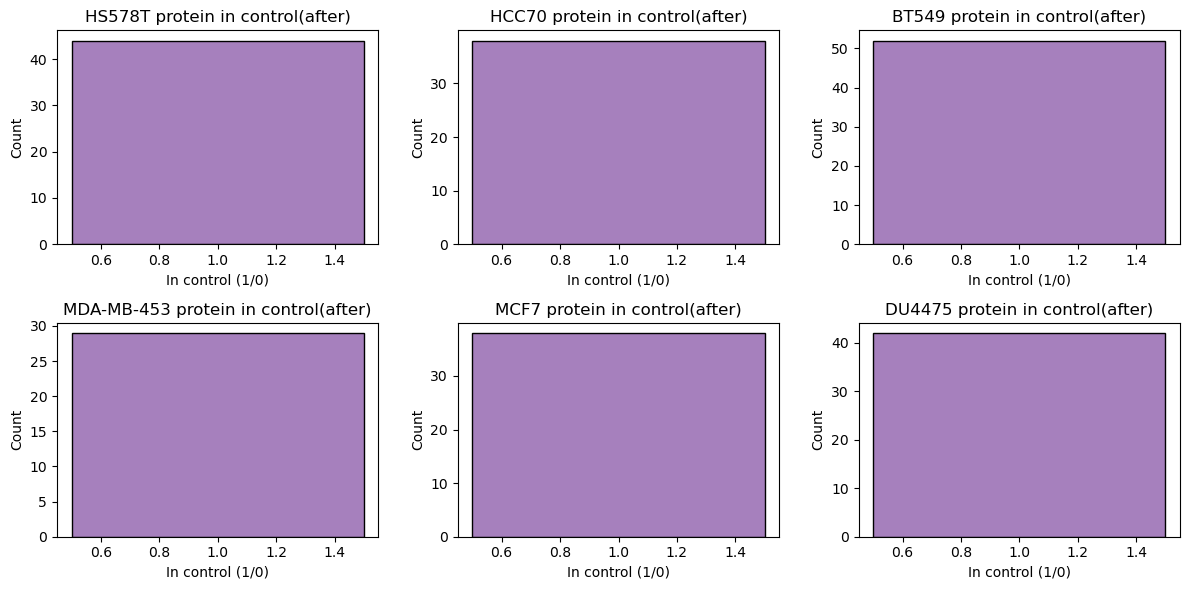

applying filter 2 of 6: ['log2_transform_by_control', '_']
log2 transforming by control
applying filter 3 of 6: ['filter_incomplete_proteins', '.95']
filtering incomplete proteins
[HS578T] 44 cols -> 24 prots
[HCC70] 38 cols -> 21 prots
[BT549] 52 cols -> 37 prots
[MDA-MB-453] 29 cols -> 20 prots
[MCF7] 38 cols -> 26 prots
[DU4475] 42 cols -> 25 prots


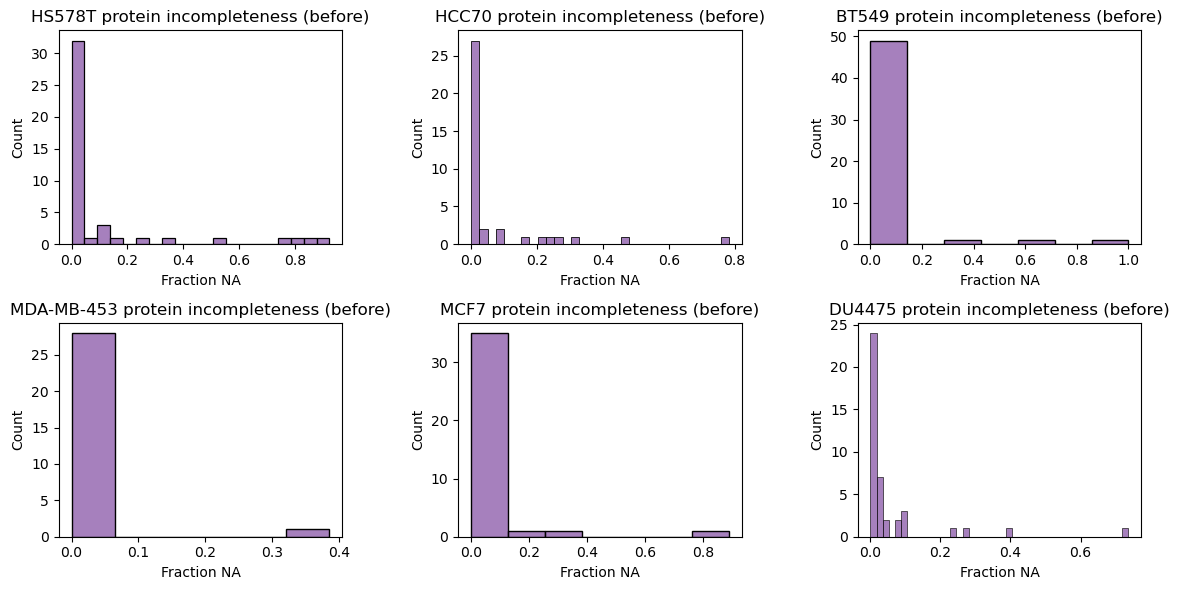

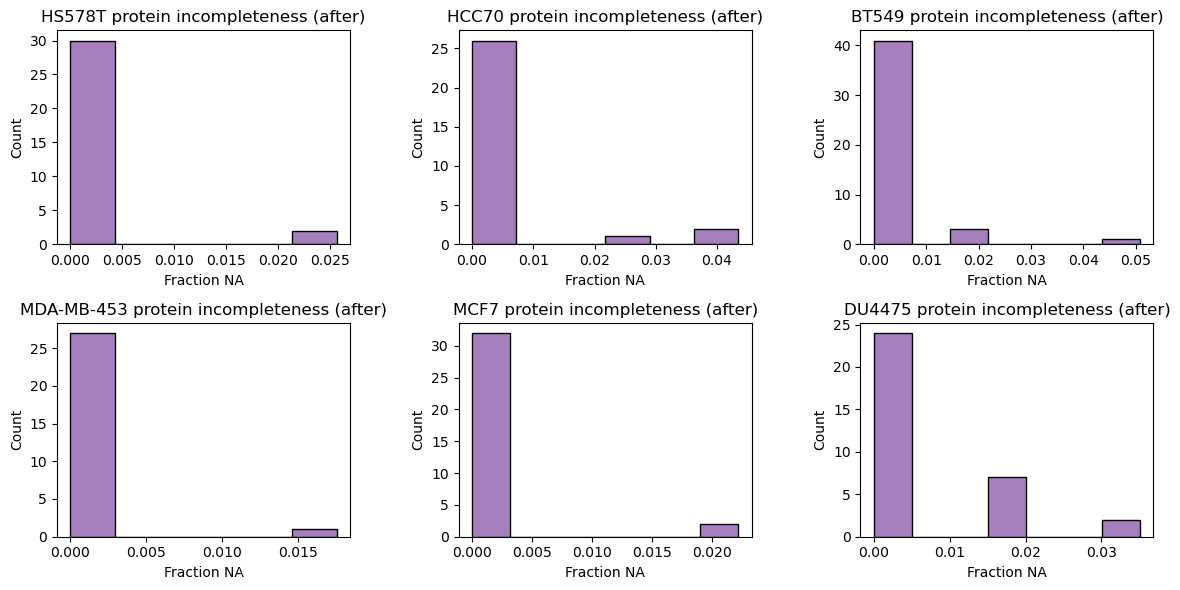

applying filter 4 of 6: ['filter_incomplete_experiments', '.95']
filtering incomplete experiments
[HS578T] 39 experiments -> 39 experiments, 24 prots
[HCC70] 46 experiments -> 46 experiments, 21 prots
[BT549] 59 experiments -> 59 experiments, 37 prots
[MDA-MB-453] 57 experiments -> 57 experiments, 20 prots
[MCF7] 45 experiments -> 45 experiments, 26 prots
[DU4475] 57 experiments -> 56 experiments, 25 prots


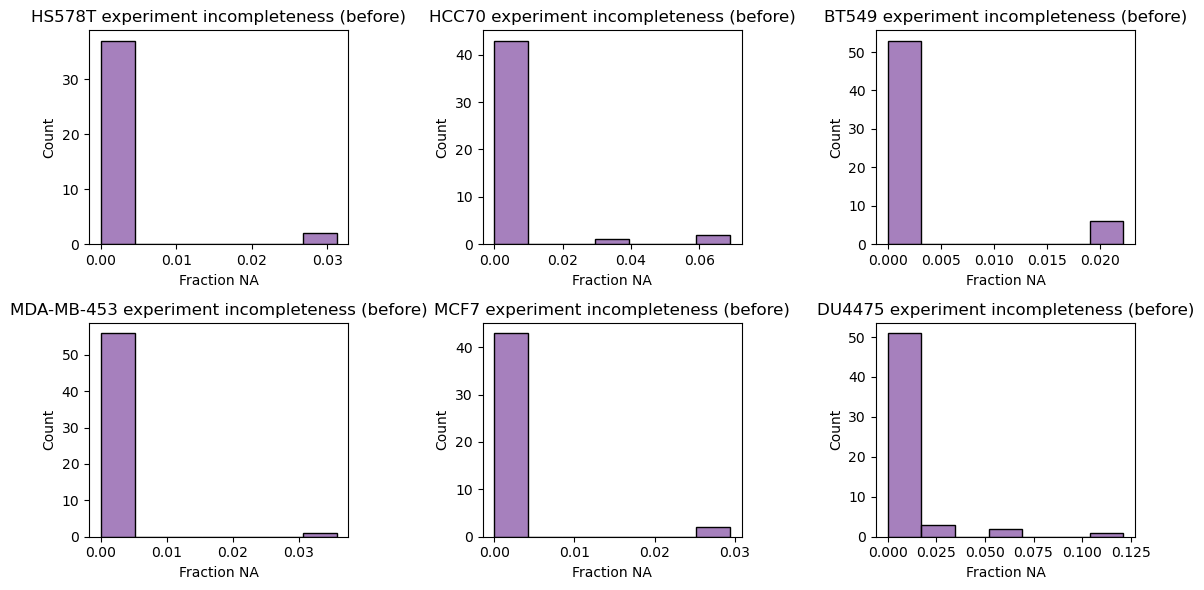

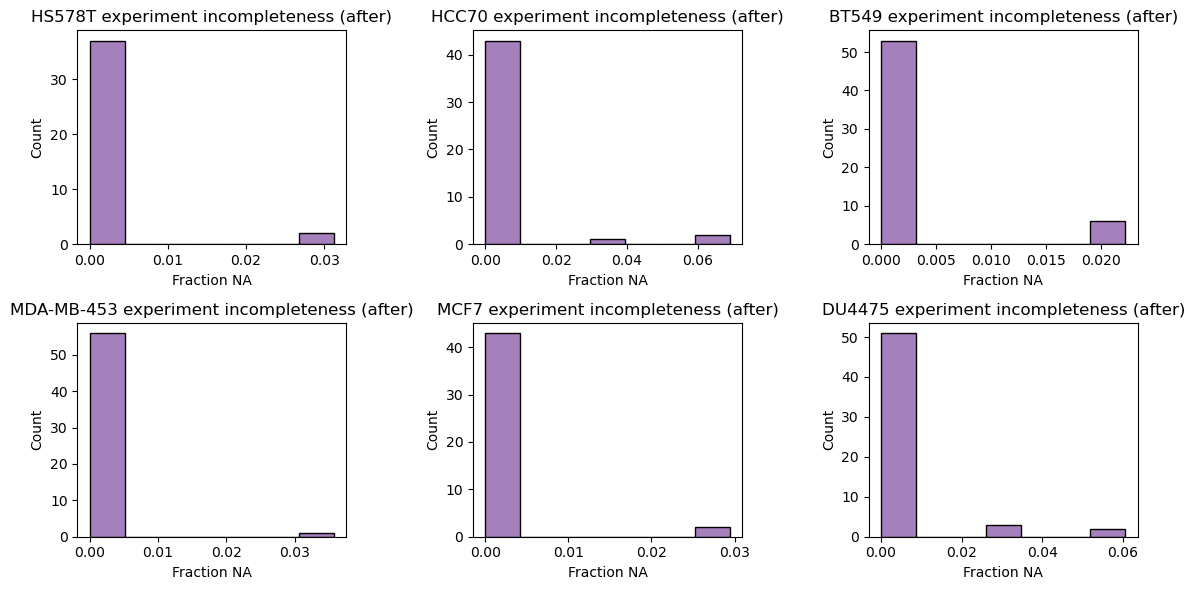

applying filter 5 of 6: ['fill_na_with_mean', '_']
filling na with mean


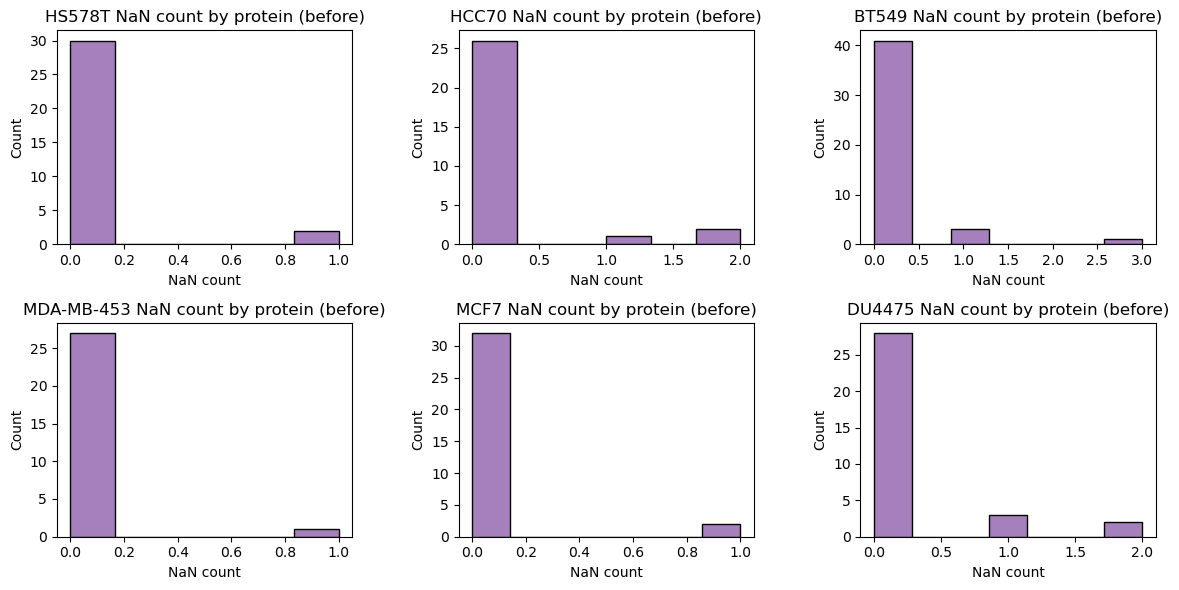

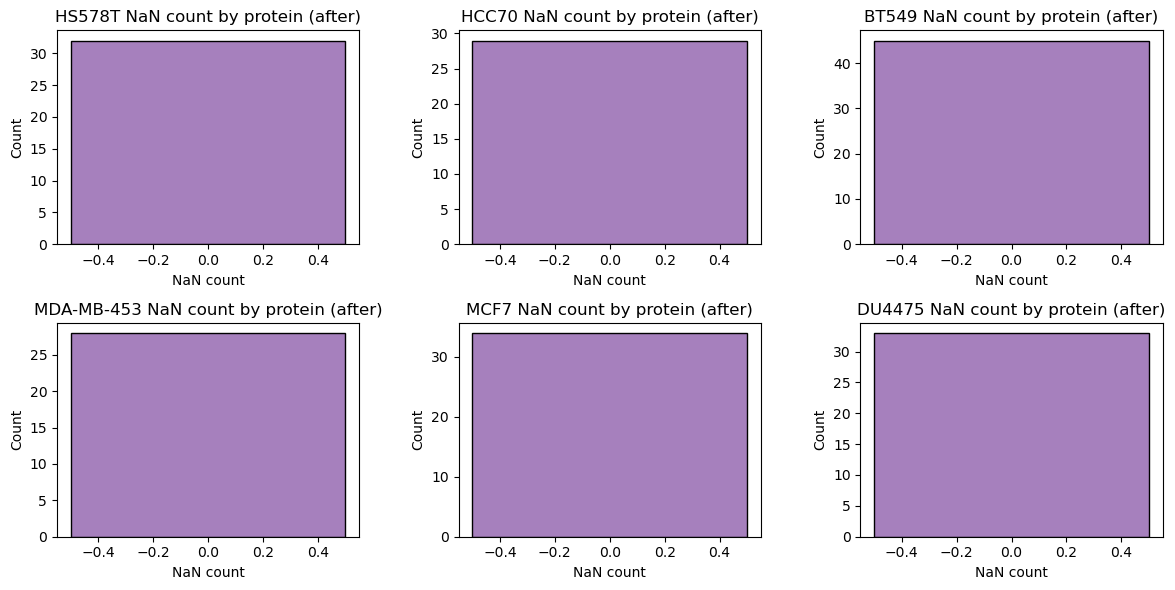

applying filter 6 of 6: ['filter_by_mutual_information', '.001', 'meta_Inhi_5']
filtering by mutual information


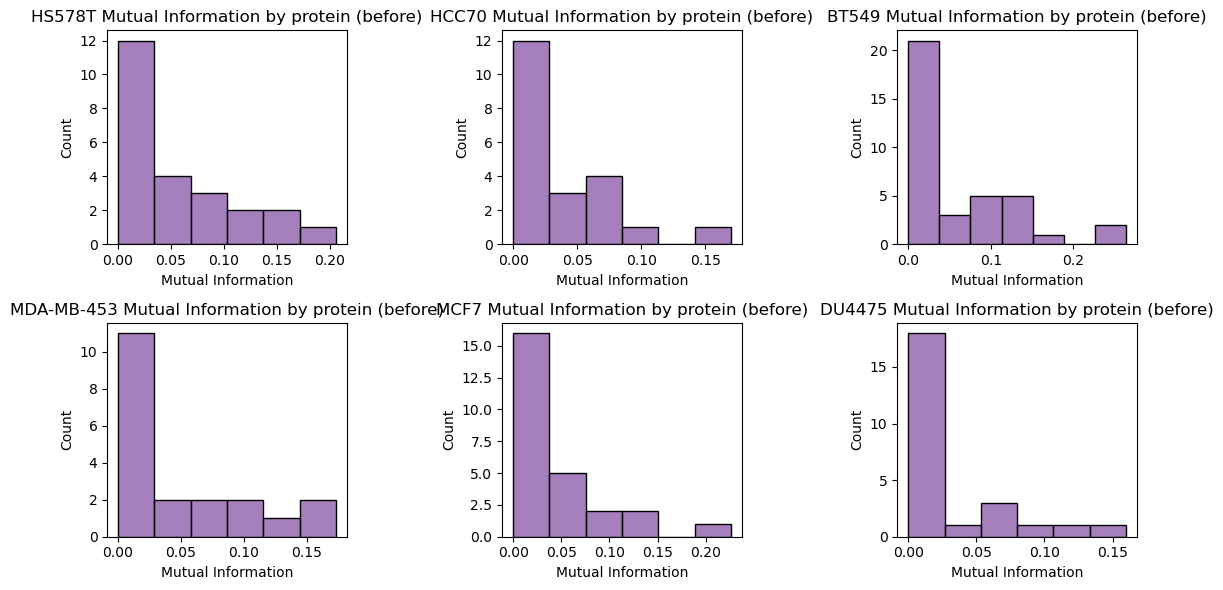

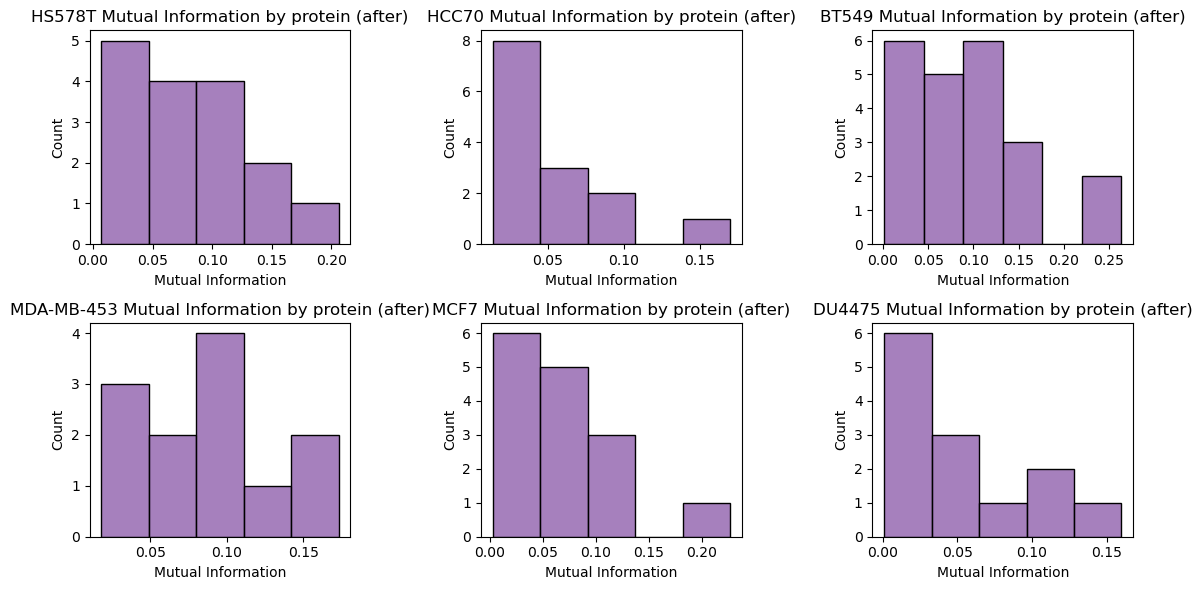

////////////Hash:   2b2f04   ///////////////////////////
+------------------------------------------+----------+---------+---------+--------------+--------+----------+
|                                          |   HS578T |   HCC70 |   BT549 |   MDA-MB-453 |   MCF7 |   DU4475 |
+==========================================+==========+=========+=========+==============+========+==========+
| raw_data                                 |       45 |      38 |      59 |           61 |     53 |       58 |
+------------------------------------------+----------+---------+---------+--------------+--------+----------+
| step_1_filter_proteins_with_control__    |       36 |      30 |      44 |           21 |     30 |       34 |
+------------------------------------------+----------+---------+---------+--------------+--------+----------+
| step_2_log2_transform_by_control__       |       36 |      30 |      44 |           21 |     30 |       34 |
+------------------------------------------+----------+

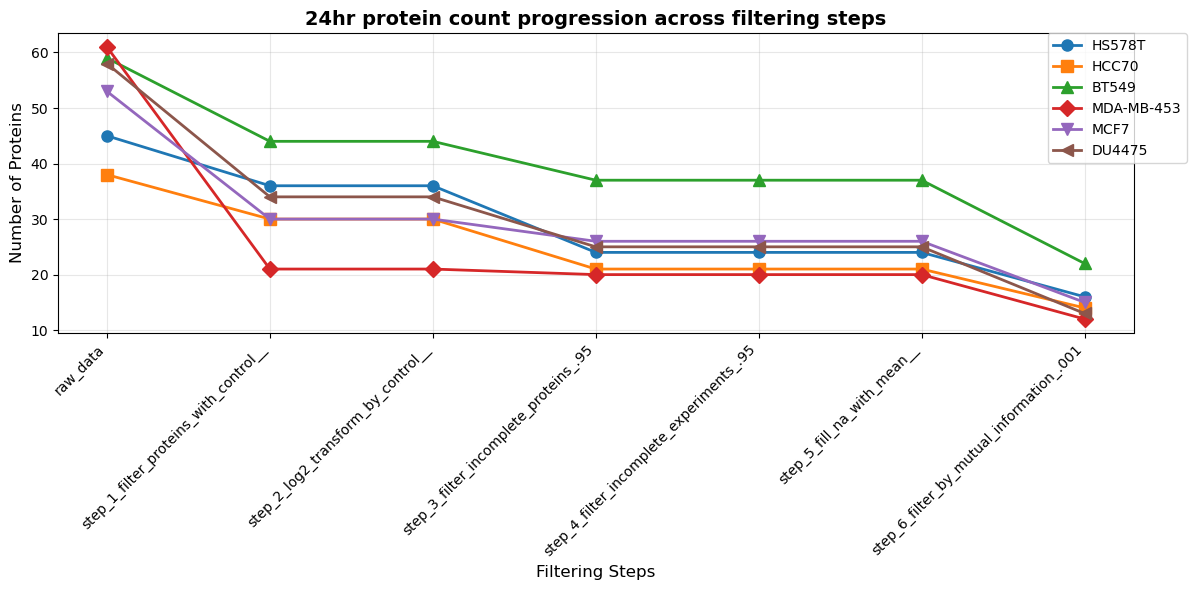

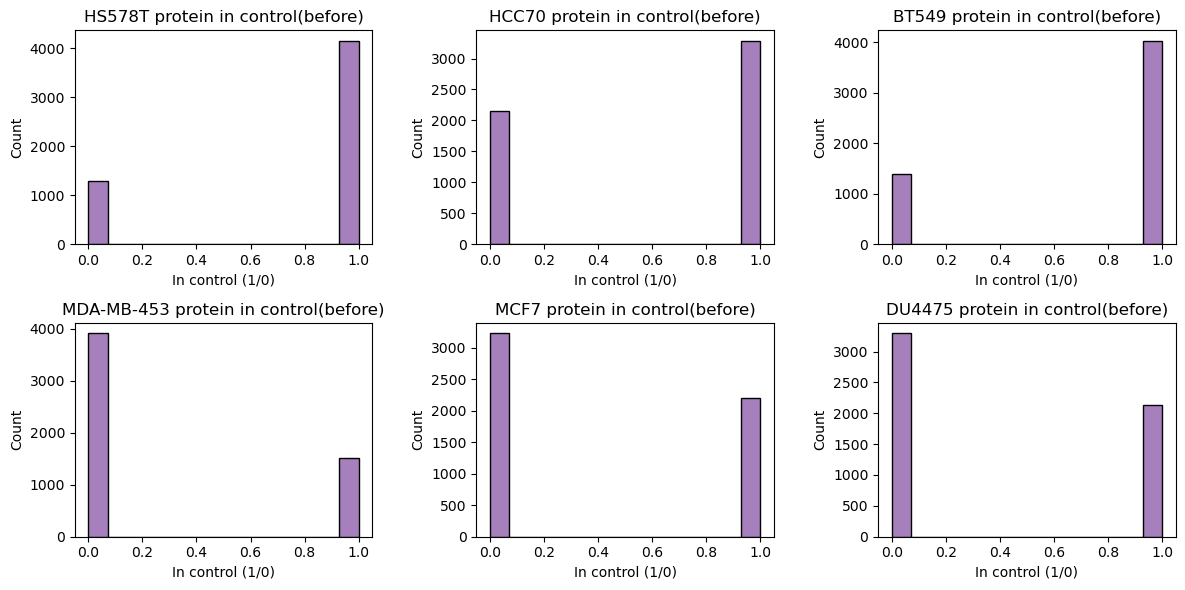

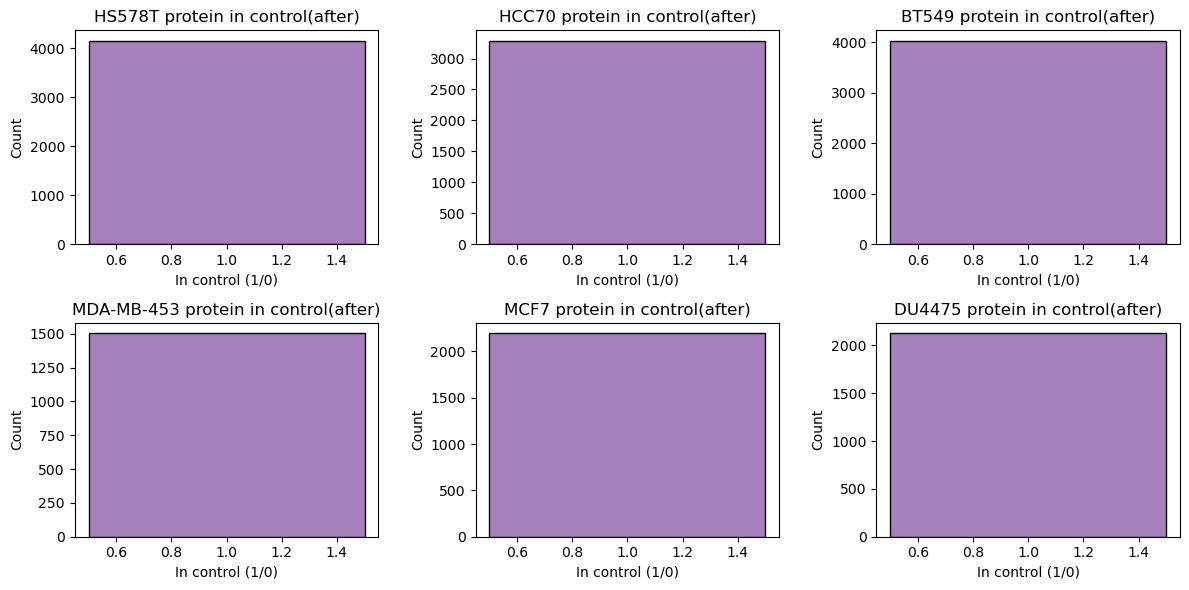

applying filter 2 of 10: ['log2_transform_by_control', '_']
log2 transforming by control
applying filter 3 of 10: ['filter_incomplete_proteins', '.8']
filtering incomplete proteins
[HS578T] 4153 cols -> 3043 prots
[HCC70] 3291 cols -> 2707 prots
[BT549] 4037 cols -> 3093 prots
[MDA-MB-453] 1506 cols -> 1440 prots
[MCF7] 2198 cols -> 2054 prots
[DU4475] 2129 cols -> 1851 prots


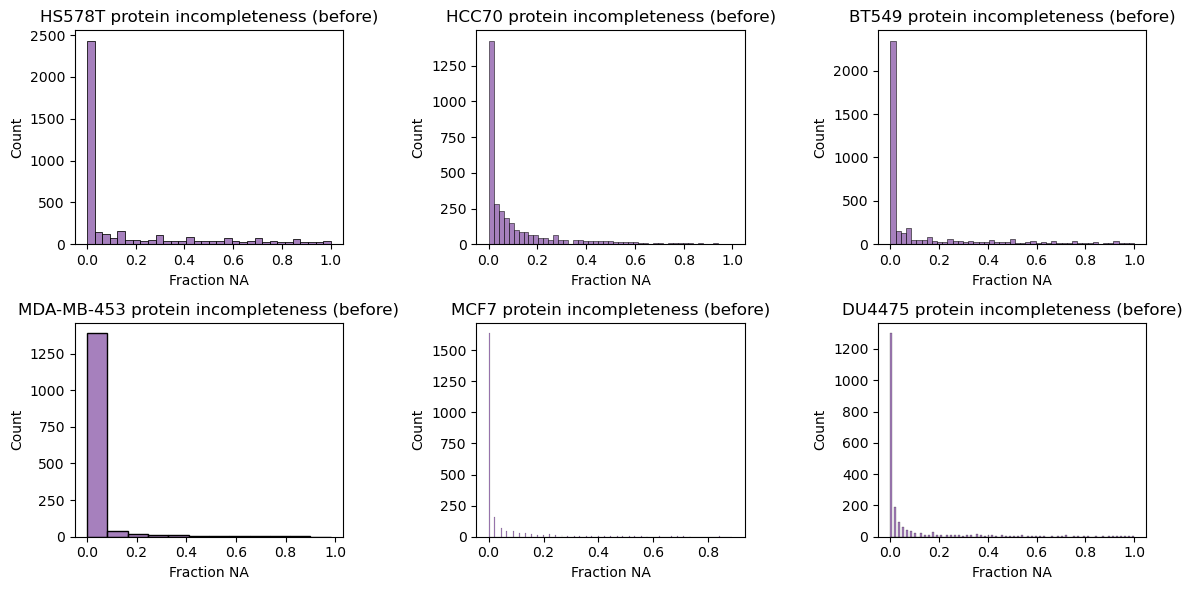

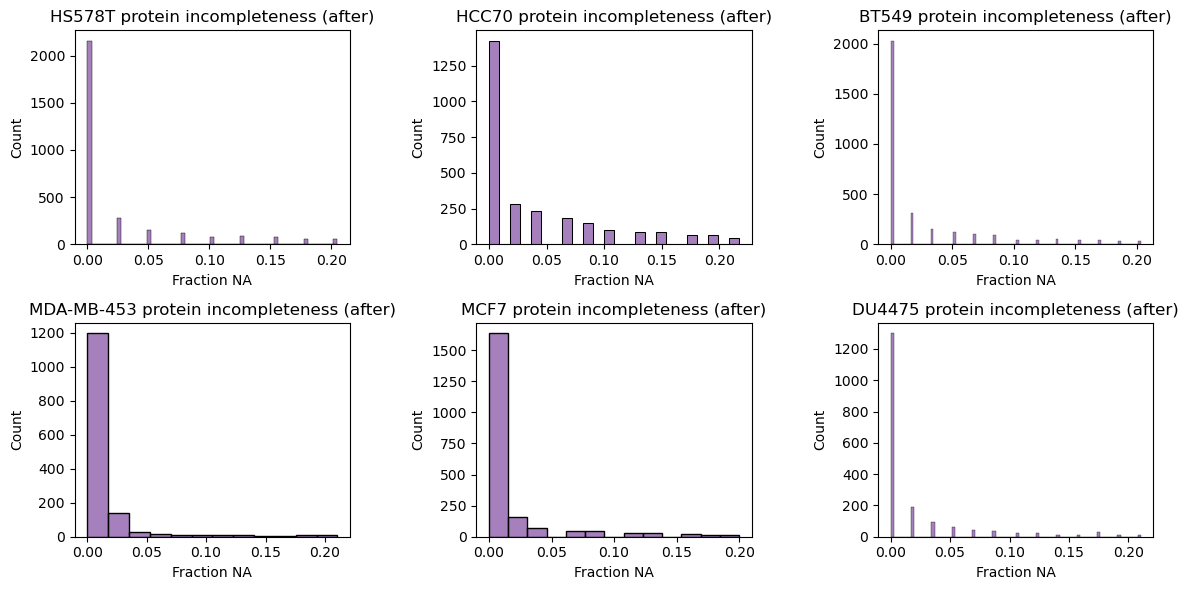

applying filter 4 of 10: ['filter_incomplete_experiments', '.8']
filtering incomplete experiments
[HS578T] 39 experiments -> 39 experiments, 3043 prots
[HCC70] 46 experiments -> 43 experiments, 2707 prots
[BT549] 59 experiments -> 59 experiments, 3093 prots
[MDA-MB-453] 57 experiments -> 57 experiments, 1440 prots
[MCF7] 45 experiments -> 45 experiments, 2054 prots
[DU4475] 57 experiments -> 57 experiments, 1851 prots


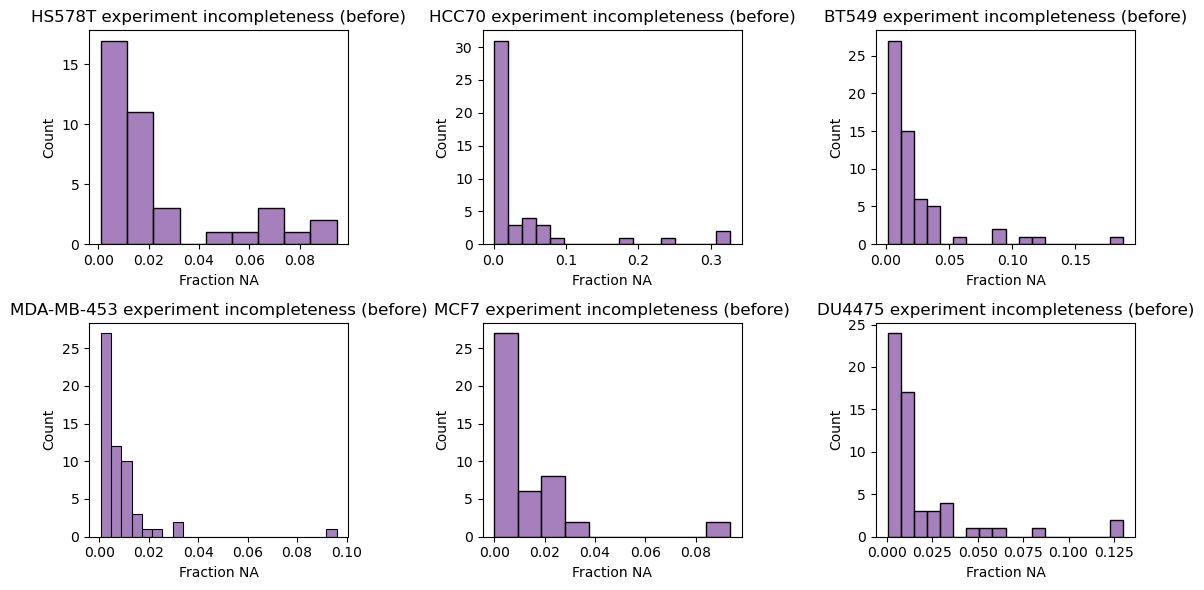

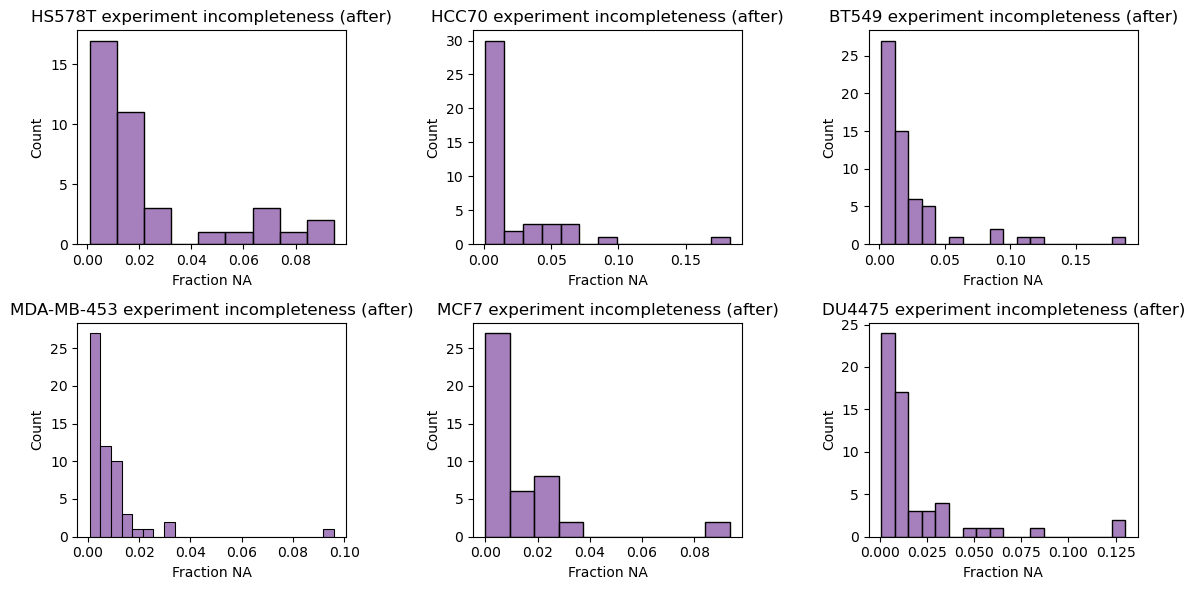

applying filter 5 of 10: ['fill_na_with_mean', '_']
filling na with mean


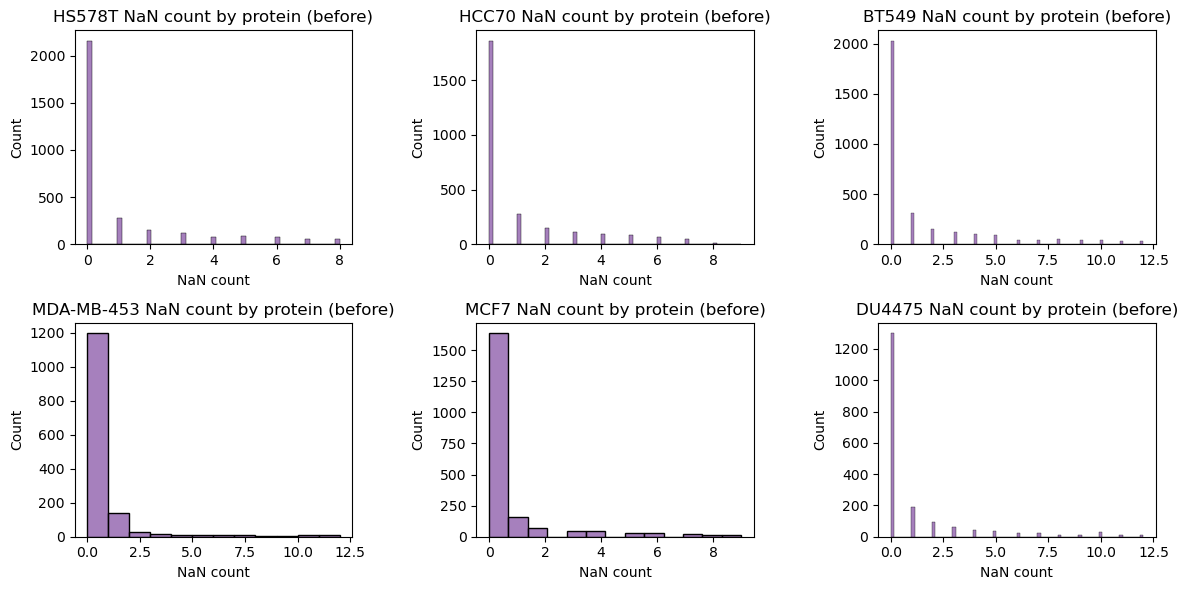

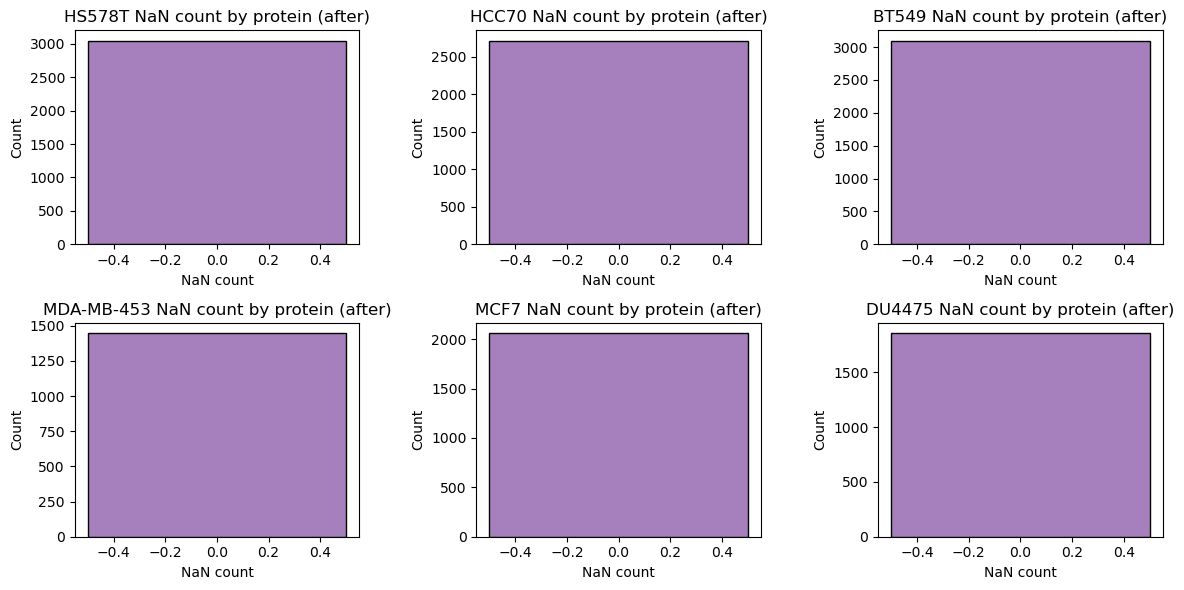

applying filter 6 of 10: ['filter_by_mutual_information', '.001', 'meta_Inhi_5']
filtering by mutual information


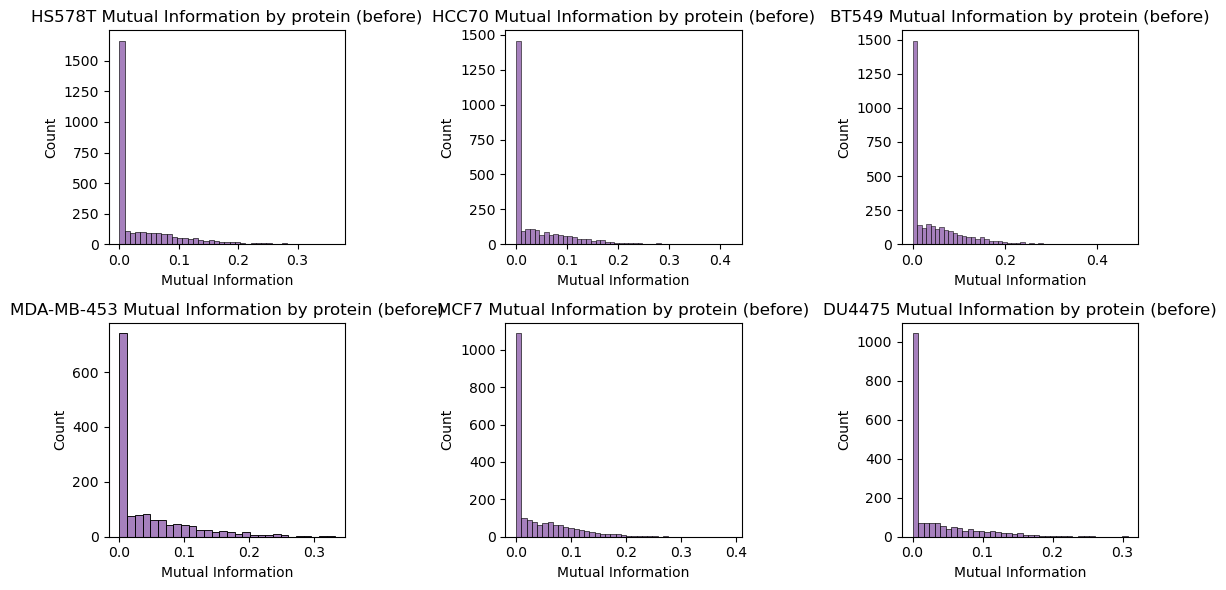

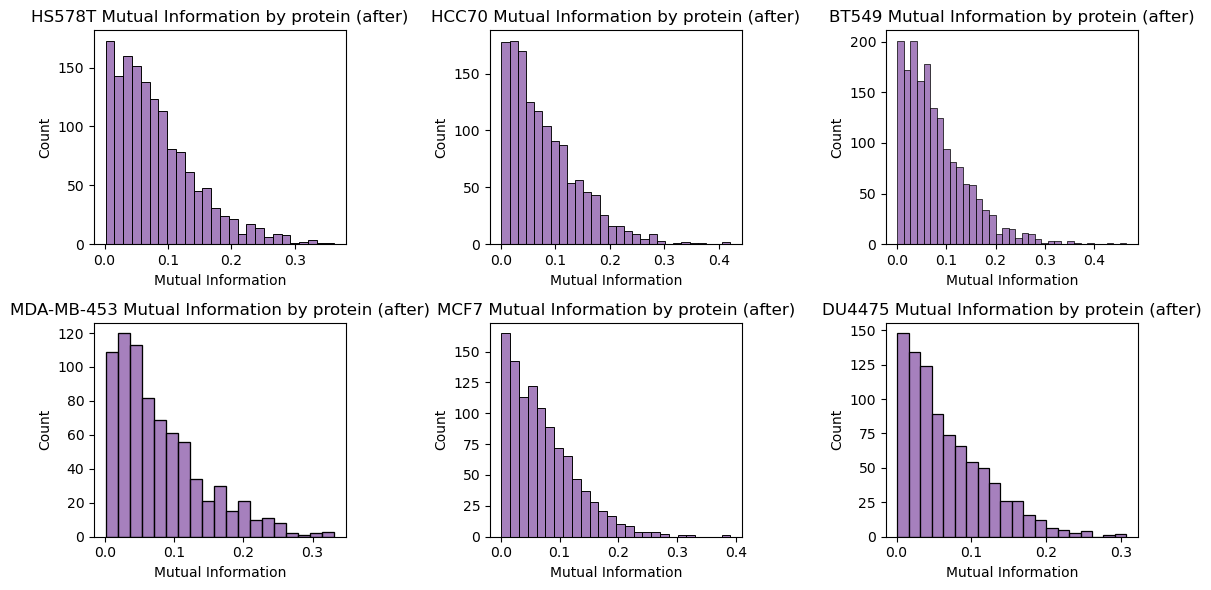

applying filter 7 of 10: ['iterative_signal_filtering', '3']
filtering using iterative SNR filtering
graphing not implemented
applying filter 8 of 10: ['spearman_corr_filtering', '0.2', 'meta_Inhi_5']
filtering by spearman correlation


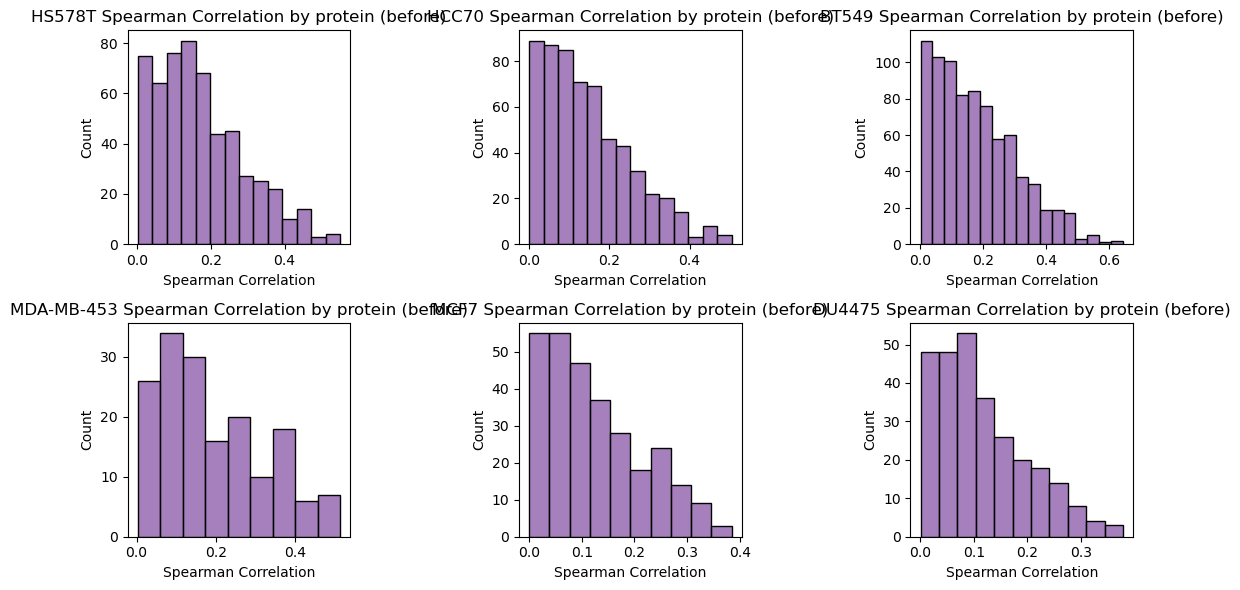

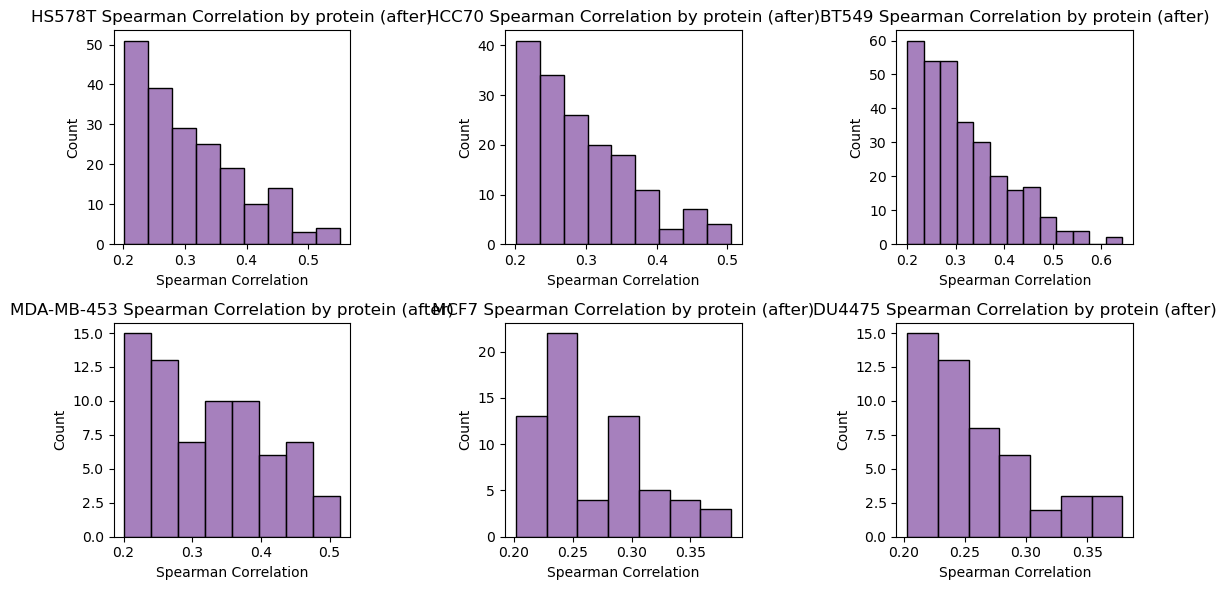

applying filter 9 of 10: ['pearson_corr_filtering', '0.2', 'meta_Inhi_5']
filtering by pearson correlation


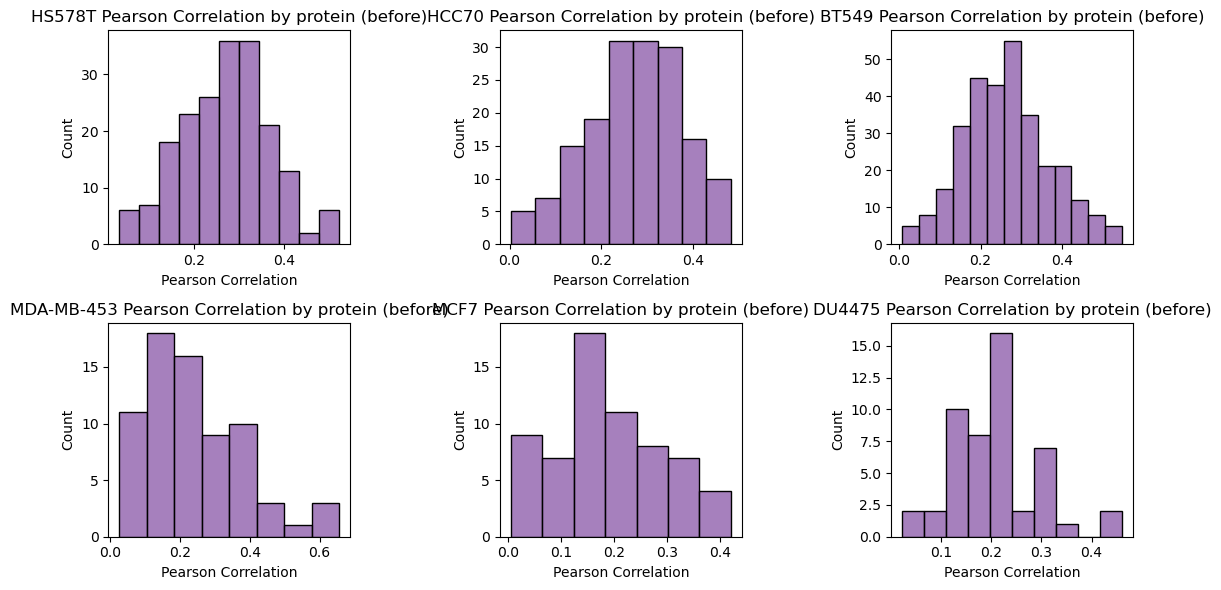

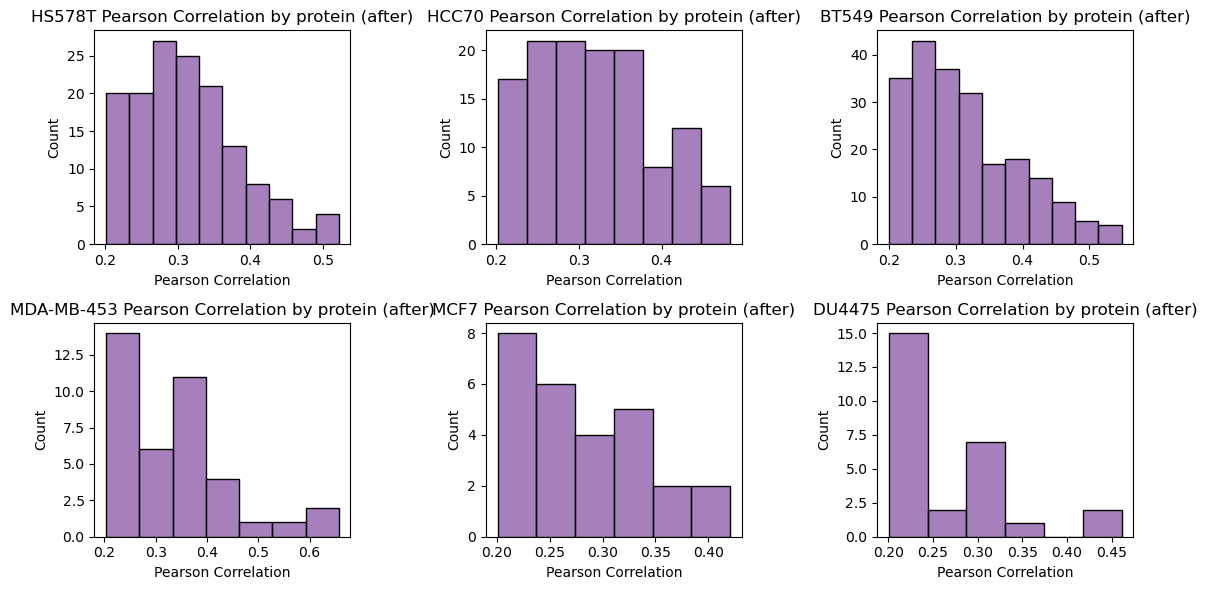

applying filter 10 of 10: ['noise injected', '_']
filter ['noise injected', '_'] not found
////////////Hash:   cda02d   ///////////////////////////
+------------------------------------------+----------+---------+---------+--------------+--------+----------+
|                                          |   HS578T |   HCC70 |   BT549 |   MDA-MB-453 |   MCF7 |   DU4475 |
+==========================================+==========+=========+=========+==============+========+==========+
| raw_data                                 |     5434 |    5441 |    5420 |         5418 |   5426 |     5421 |
+------------------------------------------+----------+---------+---------+--------------+--------+----------+
| step_1_filter_proteins_with_control__    |     4145 |    3283 |    4029 |         1498 |   2190 |     2121 |
+------------------------------------------+----------+---------+---------+--------------+--------+----------+
| step_2_log2_transform_by_control__       |     4145 |    3283 |    4029 |

'cda02d'

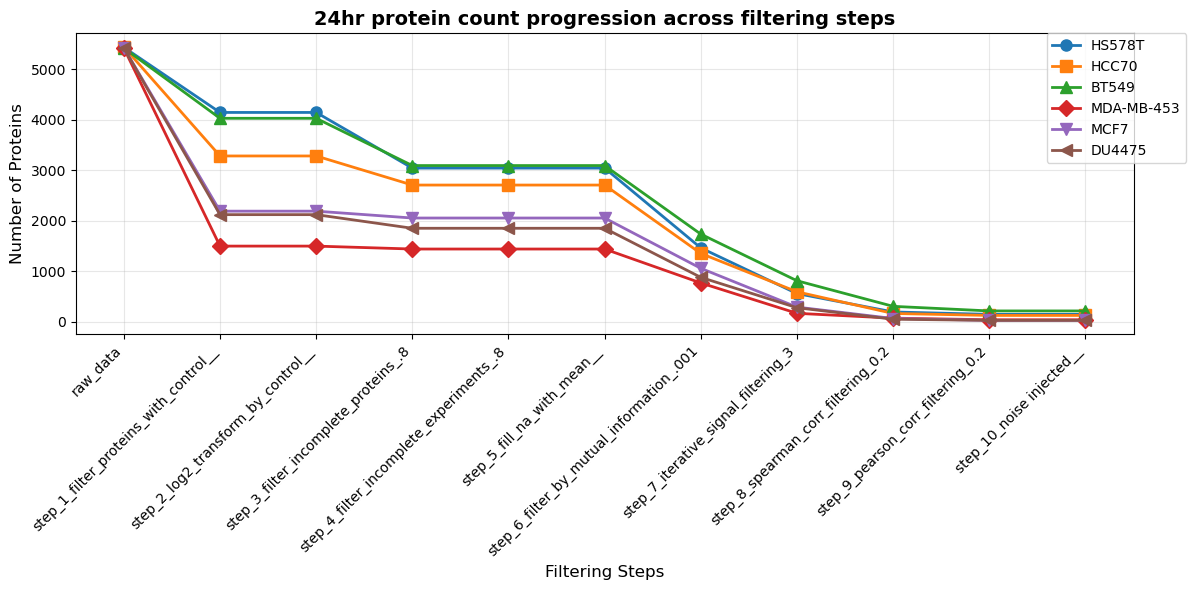

In [33]:
#24hr pipeline:
print('targeted proteins 24hr')
twenty_four_hr_tgt_pipeline=filtering_pipeline(tgt_prots_raw_24hr,data_24hr['cell_lines'],data_24hr['control_data_by_cell_line'],'24hr',data_24hr['control_data_by_cell_line_coeffvar'],**config)
hd_twentyfour_tgt=twenty_four_hr_tgt_pipeline.run_pipeline(pipeline_steps_tgt,save_dir=saved_filter_dir,tgt='tgt')
sum_twentyfour_tgt=twenty_four_hr_tgt_pipeline.summary_of_pipeline()
twenty_four_hr_tgt_pipeline.save_pipeline(saved_filter_dir,tgt='tgt')

print('non-targeted proteins 24hr')
twenty_four_hr_non_tgt_pipeline=filtering_pipeline(non_tgt_prots_raw_24hr,data_24hr['cell_lines'],data_24hr['control_data_by_cell_line'],'24hr',data_24hr['control_data_by_cell_line_coeffvar'],**config)
hd_twentyfour_non_tgt=twenty_four_hr_non_tgt_pipeline.run_pipeline(pipeline_steps_nontgt,save_dir=saved_filter_dir,tgt='nontgt')
sum_twentyfour_non_tgt=twenty_four_hr_non_tgt_pipeline.summary_of_pipeline()
twenty_four_hr_non_tgt_pipeline.save_pipeline(saved_filter_dir,tgt='nontgt')
# _=twenty_four_hr_non_tgt_pipeline.run_loo_regression(ycol='meta_Inhi_5',model=elasticnet_model)

# plot_protein_correlation_heatmaps(twenty_four_hr_tgt_pipeline.final_filtered_data,cell_lines)
# plot_protein_correlation_heatmaps(twenty_four_hr_non_tgt_pipeline.final_filtered_data,cell_lines)

targeted proteins 48hr
applying filter 1 of 6: ['filter_proteins_with_control', '_']
filtering proteins with control values


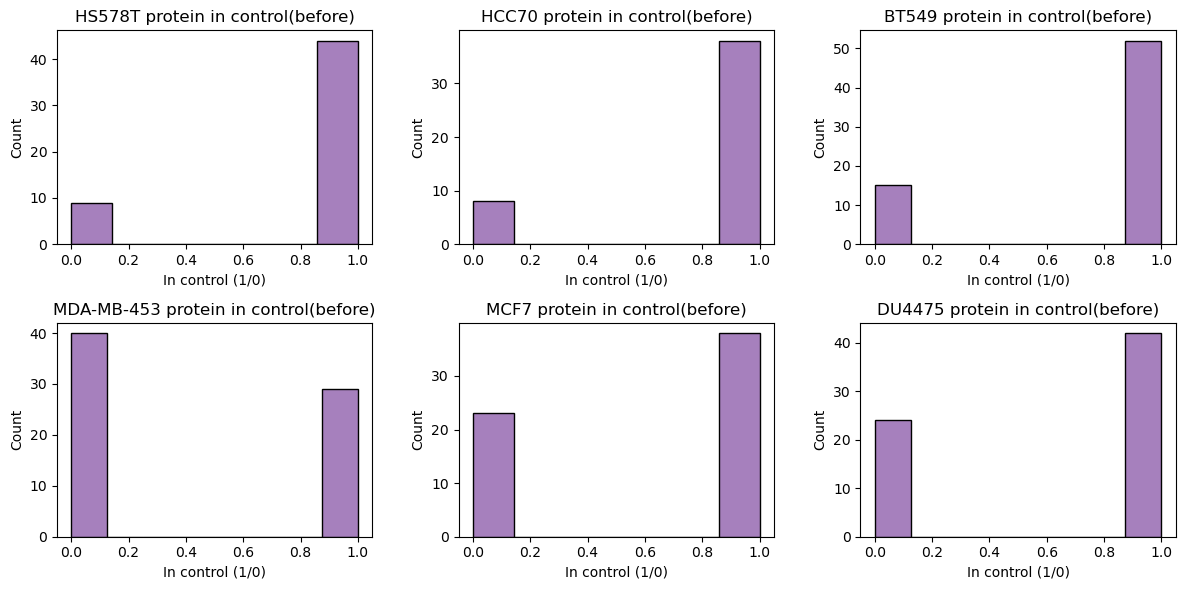

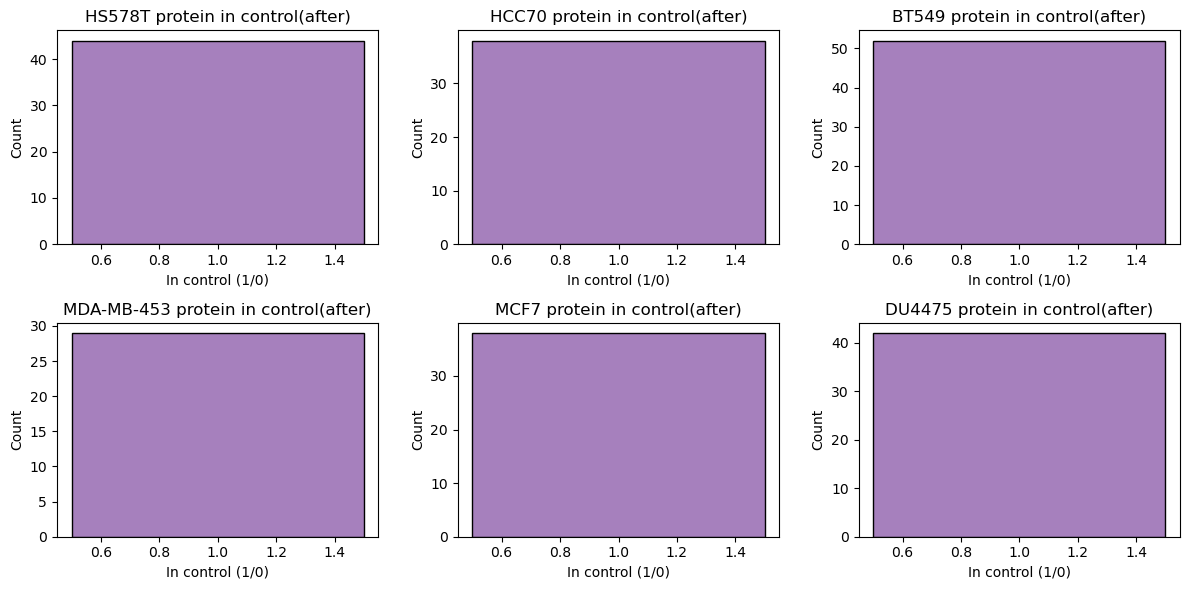

applying filter 2 of 6: ['log2_transform_by_control', '_']
log2 transforming by control
applying filter 3 of 6: ['filter_incomplete_proteins', '.95']
filtering incomplete proteins
[HS578T] 44 cols -> 21 prots
[HCC70] 38 cols -> 21 prots
[BT549] 52 cols -> 36 prots
[MDA-MB-453] 29 cols -> 20 prots
[MCF7] 38 cols -> 25 prots
[DU4475] 42 cols -> 26 prots


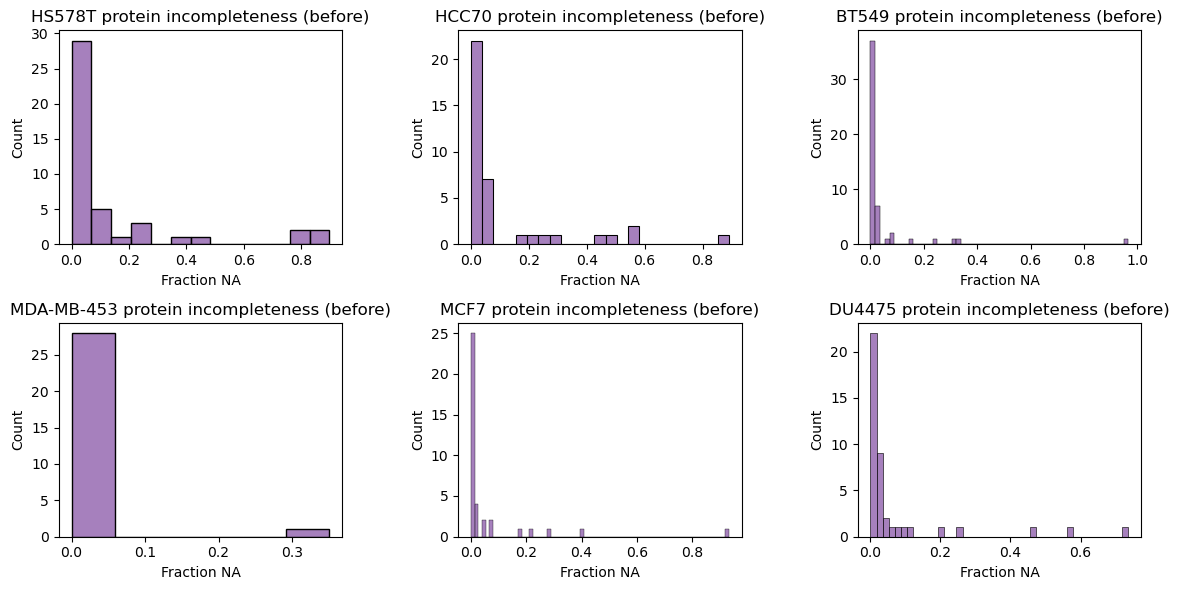

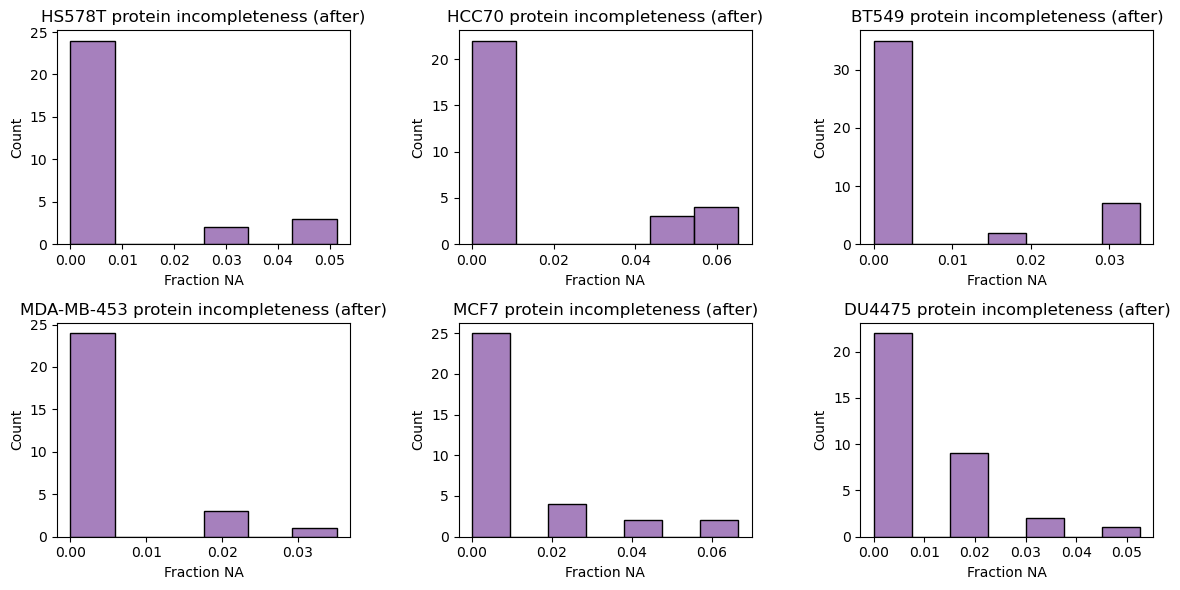

applying filter 4 of 6: ['filter_incomplete_experiments', '.95']
filtering incomplete experiments
[HS578T] 39 experiments -> 38 experiments, 21 prots
[HCC70] 46 experiments -> 42 experiments, 21 prots
[BT549] 59 experiments -> 57 experiments, 36 prots
[MDA-MB-453] 57 experiments -> 57 experiments, 20 prots
[MCF7] 45 experiments -> 43 experiments, 25 prots
[DU4475] 57 experiments -> 55 experiments, 26 prots


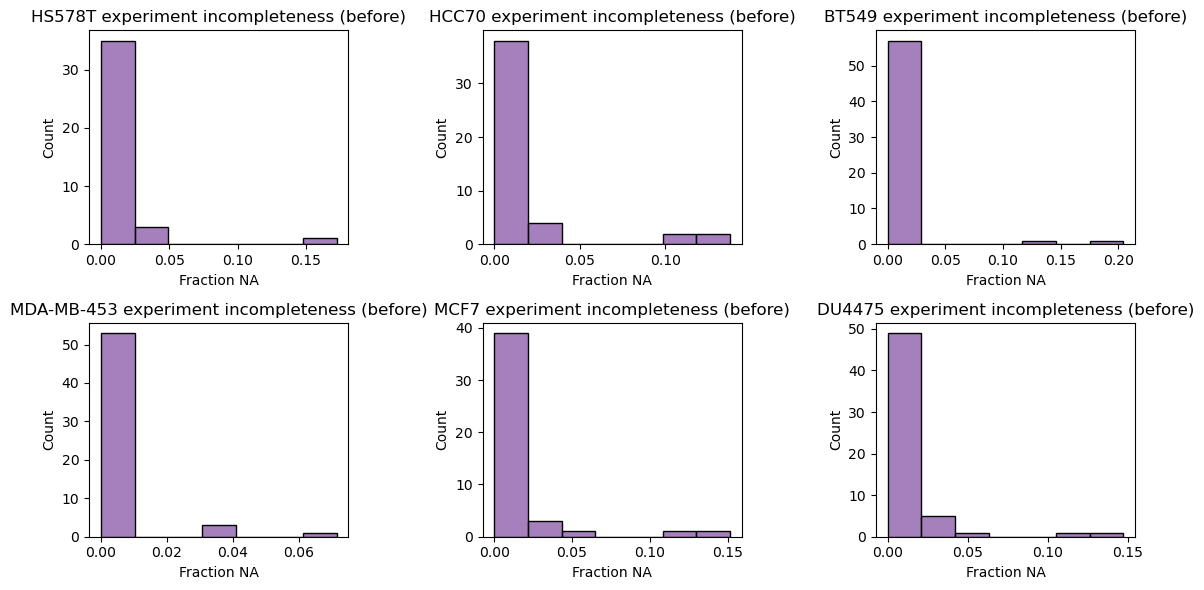

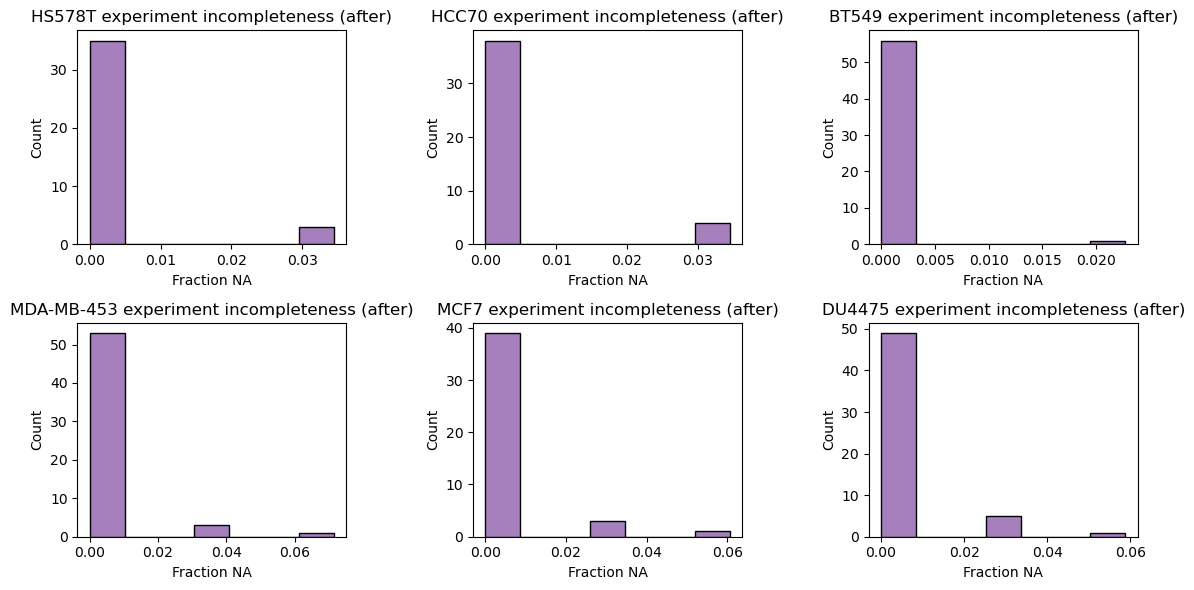

applying filter 5 of 6: ['fill_na_with_mean', '_']
filling na with mean


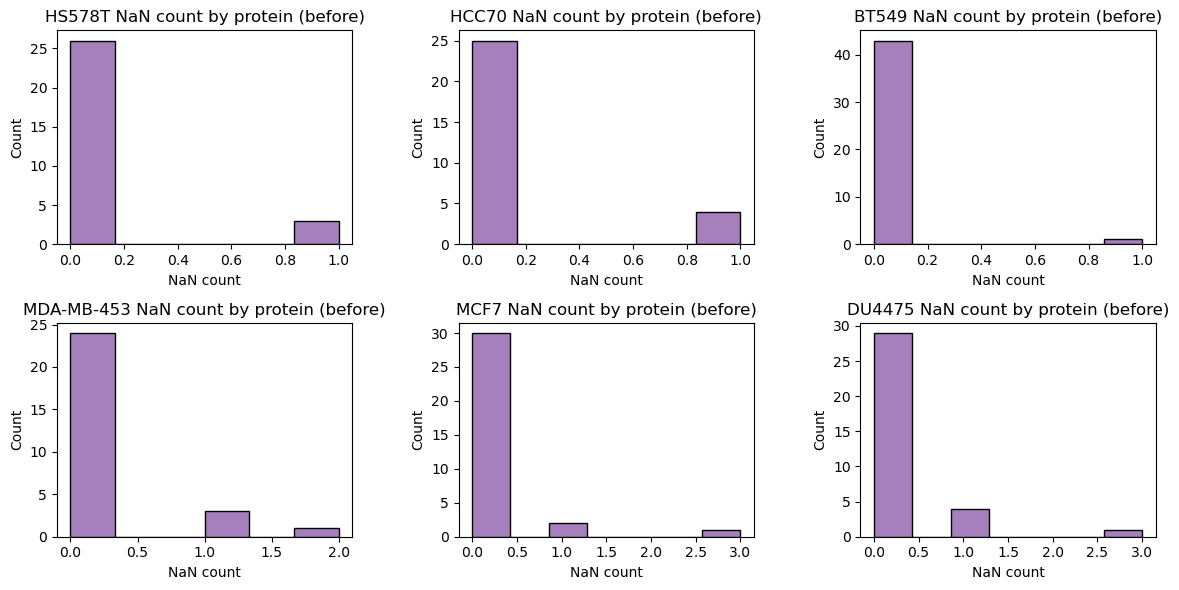

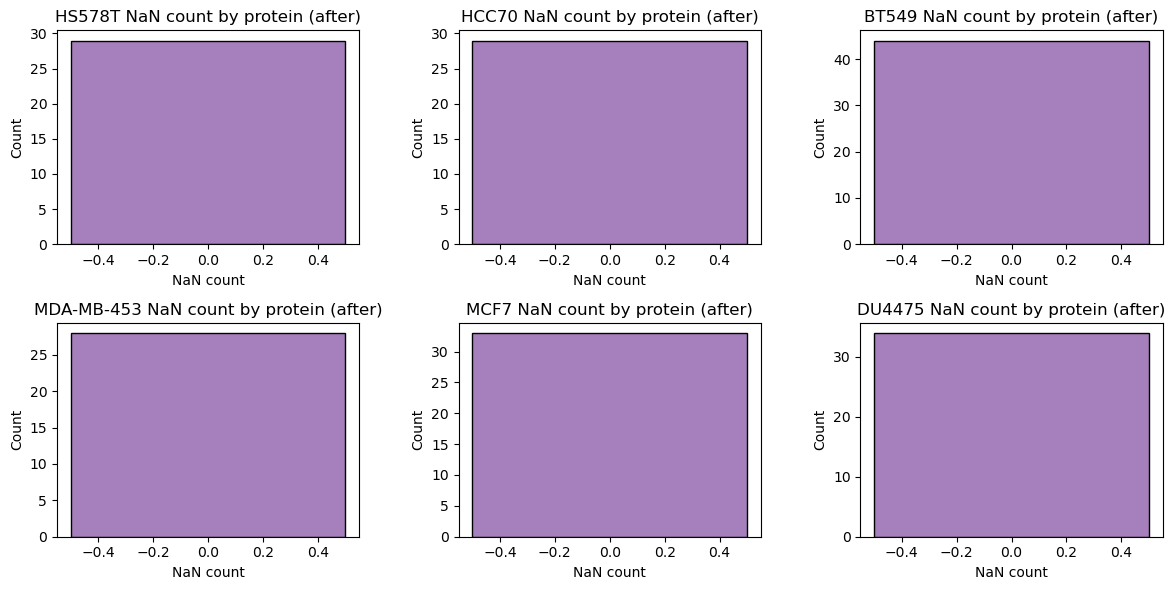

applying filter 6 of 6: ['filter_by_mutual_information', '.001', 'meta_Inhi_5']
filtering by mutual information


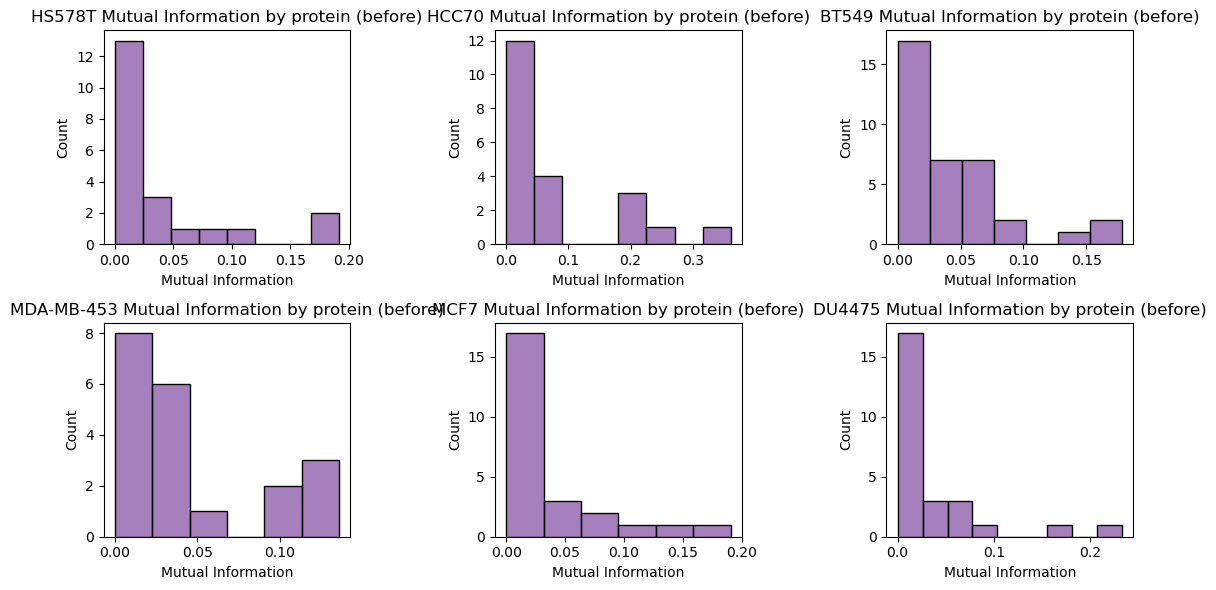

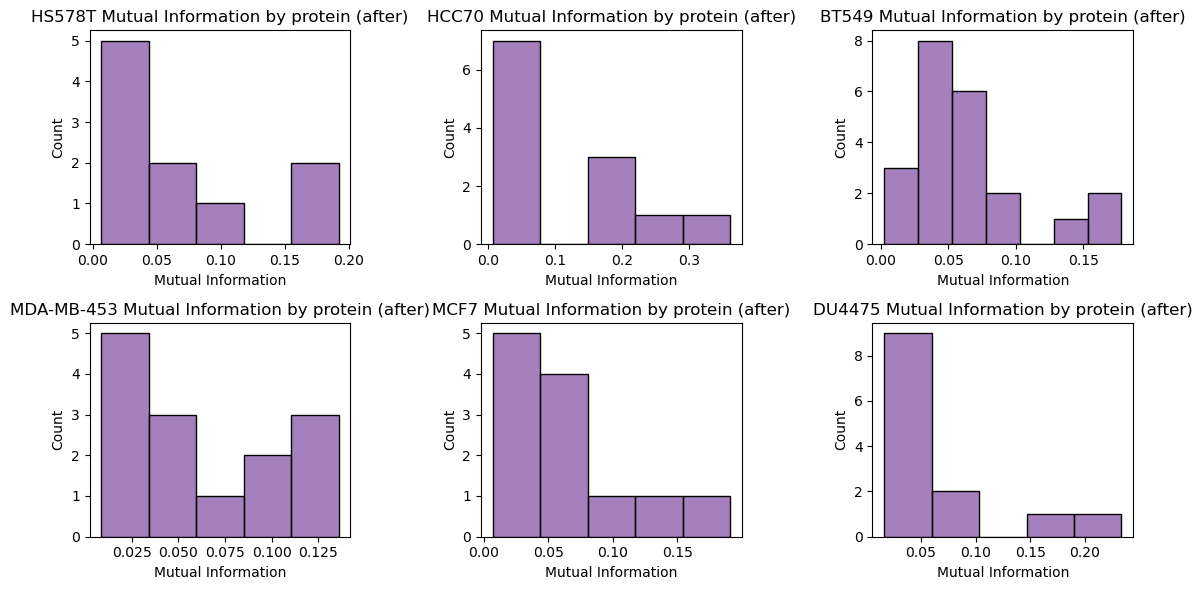

////////////Hash:   53cb1a   ///////////////////////////
+------------------------------------------+----------+---------+---------+--------------+--------+----------+
|                                          |   HS578T |   HCC70 |   BT549 |   MDA-MB-453 |   MCF7 |   DU4475 |
+==========================================+==========+=========+=========+==============+========+==========+
| raw_data                                 |       45 |      38 |      59 |           61 |     53 |       58 |
+------------------------------------------+----------+---------+---------+--------------+--------+----------+
| step_1_filter_proteins_with_control__    |       36 |      30 |      44 |           21 |     30 |       34 |
+------------------------------------------+----------+---------+---------+--------------+--------+----------+
| step_2_log2_transform_by_control__       |       36 |      30 |      44 |           21 |     30 |       34 |
+------------------------------------------+----------+

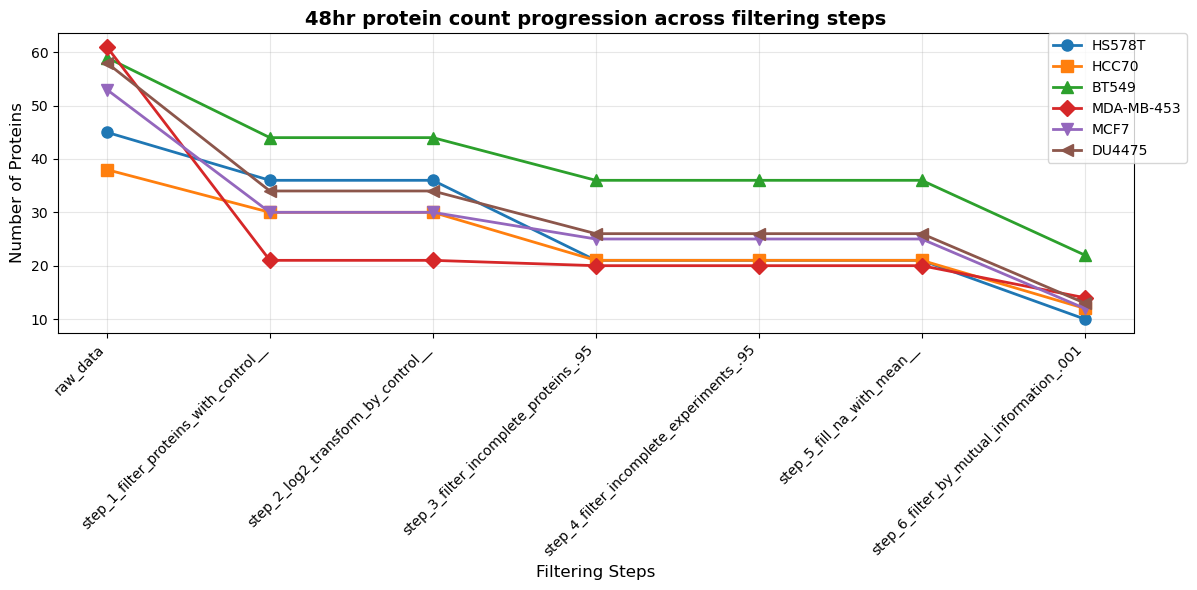

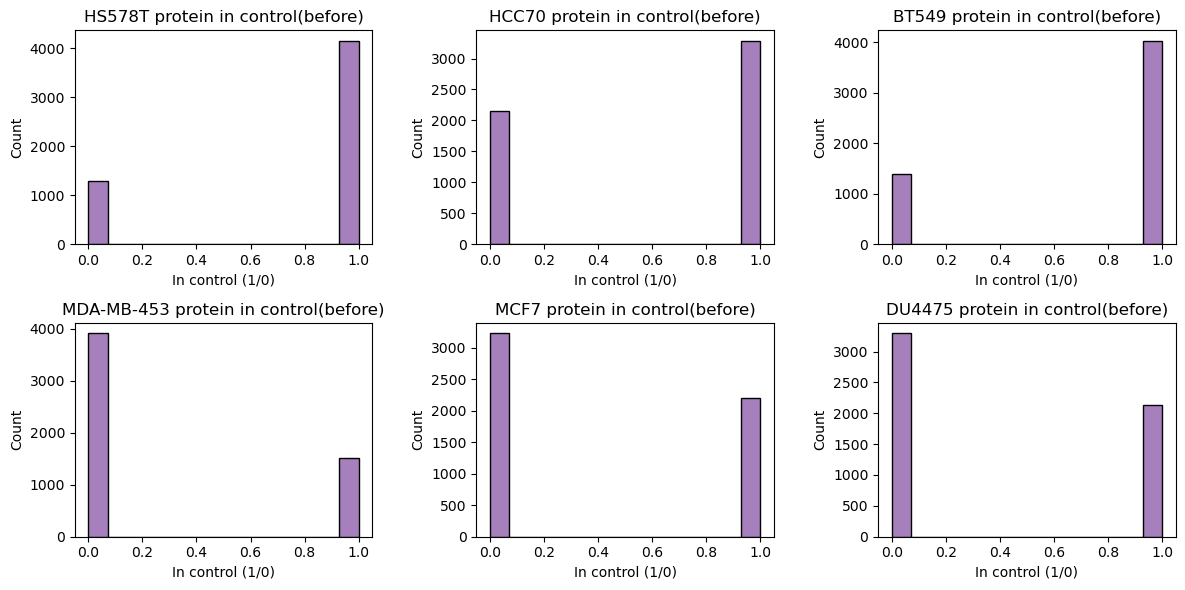

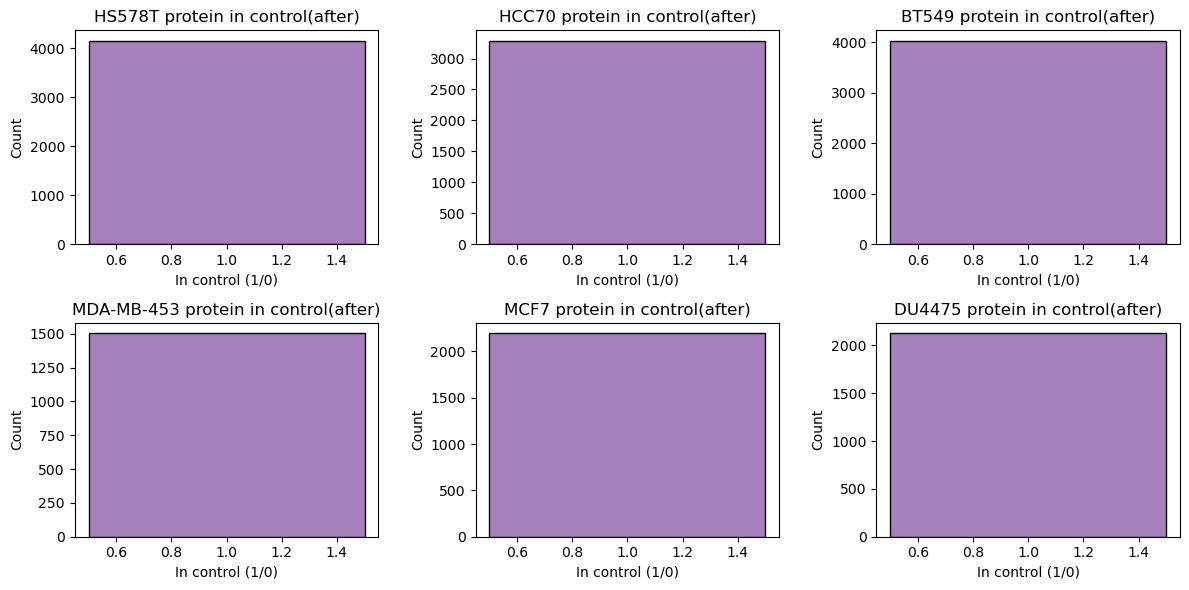

applying filter 2 of 10: ['log2_transform_by_control', '_']
log2 transforming by control
applying filter 3 of 10: ['filter_incomplete_proteins', '.8']
filtering incomplete proteins
[HS578T] 4153 cols -> 2838 prots
[HCC70] 3291 cols -> 2522 prots
[BT549] 4037 cols -> 3101 prots
[MDA-MB-453] 1506 cols -> 1431 prots
[MCF7] 2198 cols -> 1977 prots
[DU4475] 2129 cols -> 1808 prots


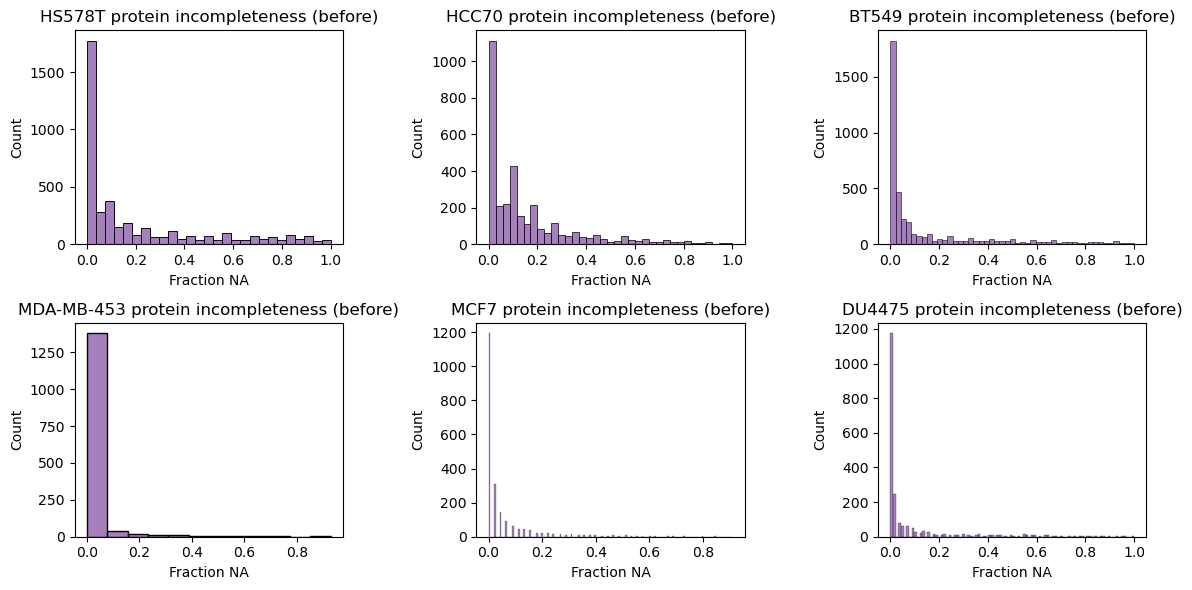

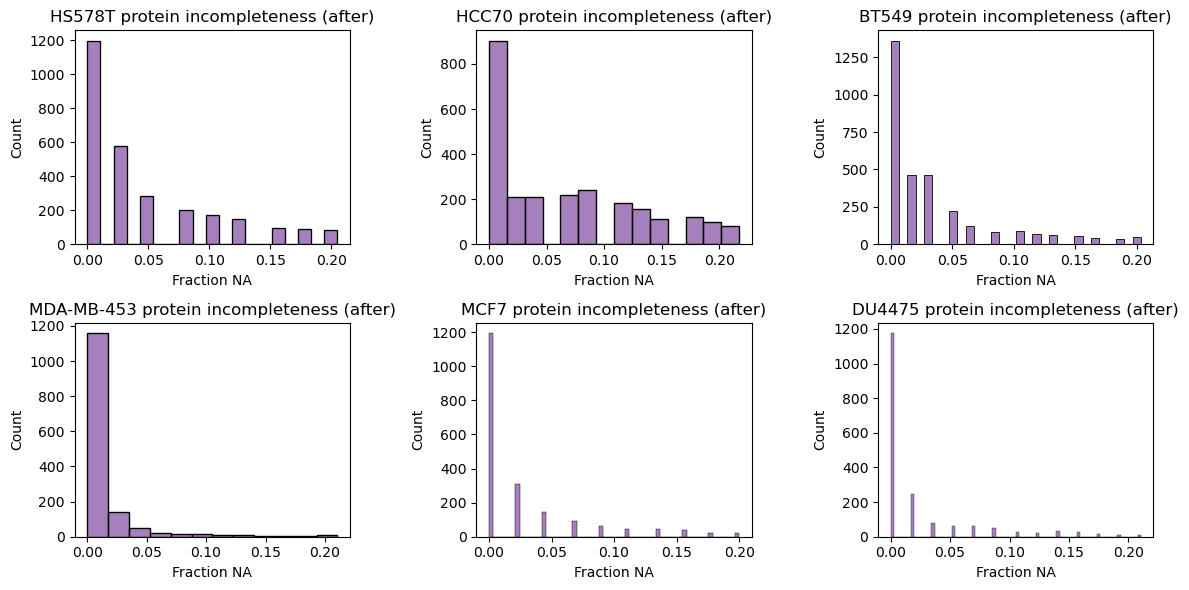

applying filter 4 of 10: ['filter_incomplete_experiments', '.8']
filtering incomplete experiments
[HS578T] 39 experiments -> 37 experiments, 2838 prots
[HCC70] 46 experiments -> 41 experiments, 2522 prots
[BT549] 59 experiments -> 57 experiments, 3101 prots
[MDA-MB-453] 57 experiments -> 57 experiments, 1431 prots
[MCF7] 45 experiments -> 44 experiments, 1977 prots
[DU4475] 57 experiments -> 56 experiments, 1808 prots


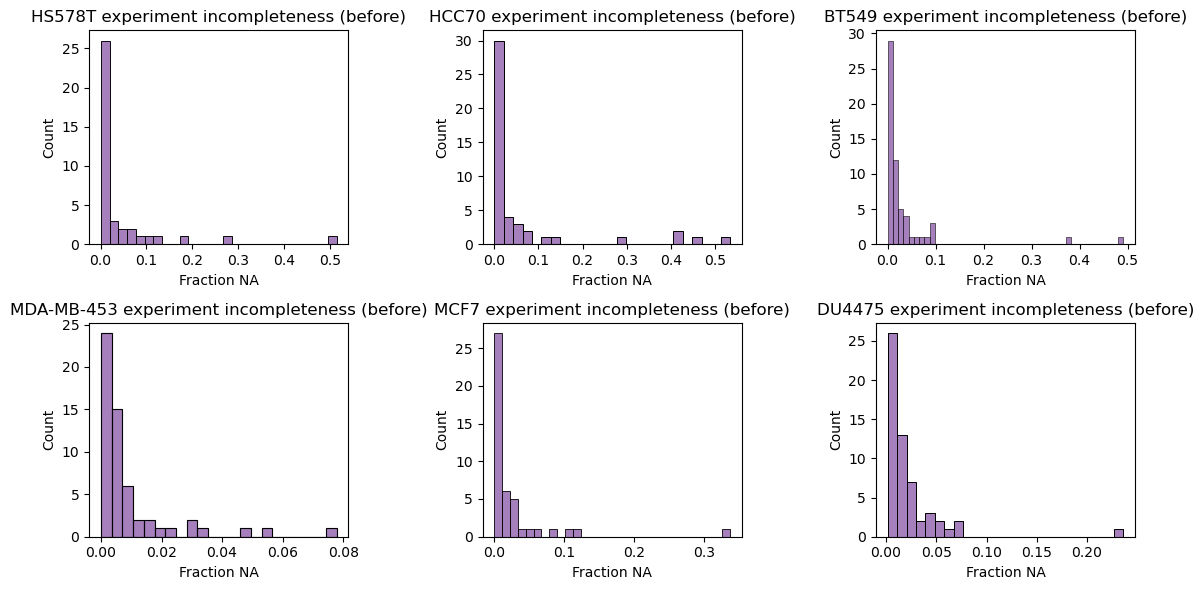

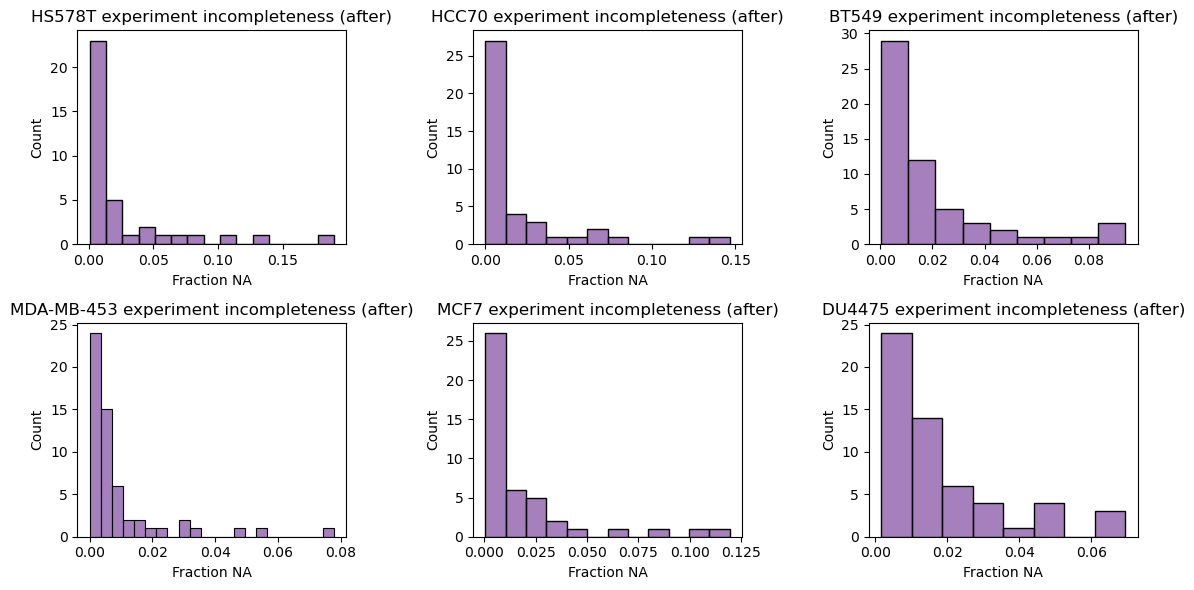

applying filter 5 of 10: ['fill_na_with_mean', '_']
filling na with mean


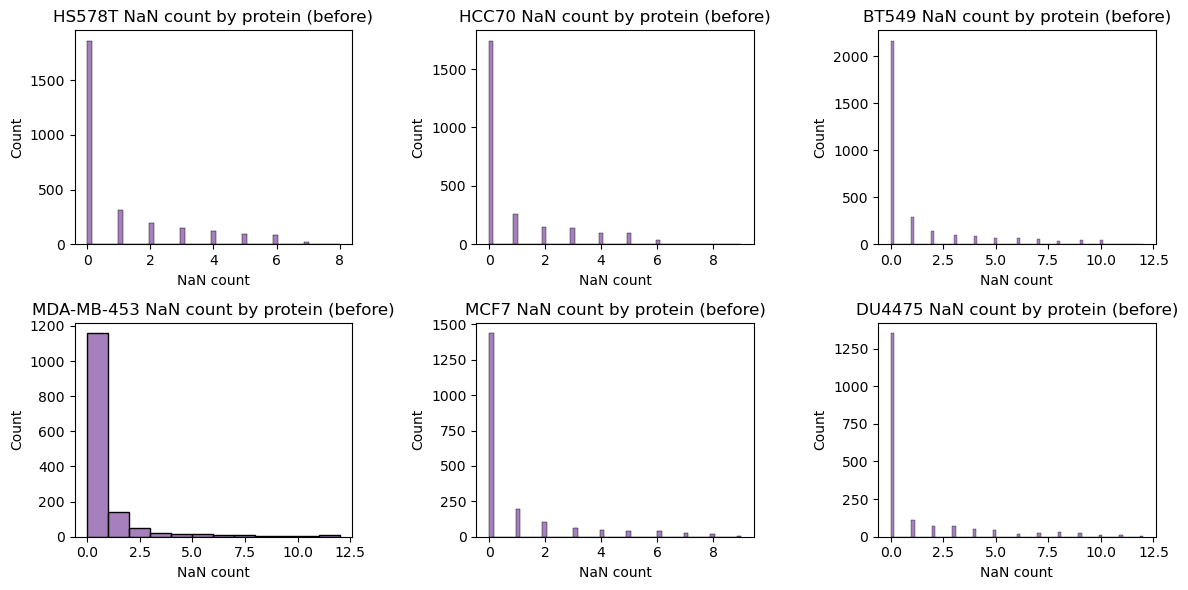

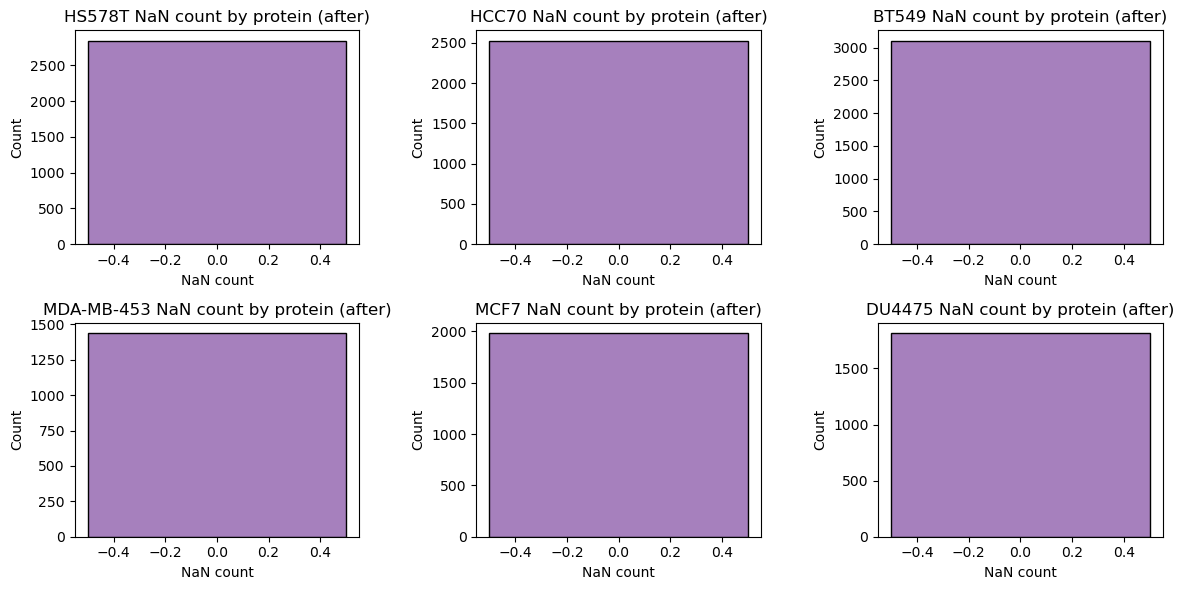

applying filter 6 of 10: ['filter_by_mutual_information', '.001', 'meta_Inhi_5']
filtering by mutual information


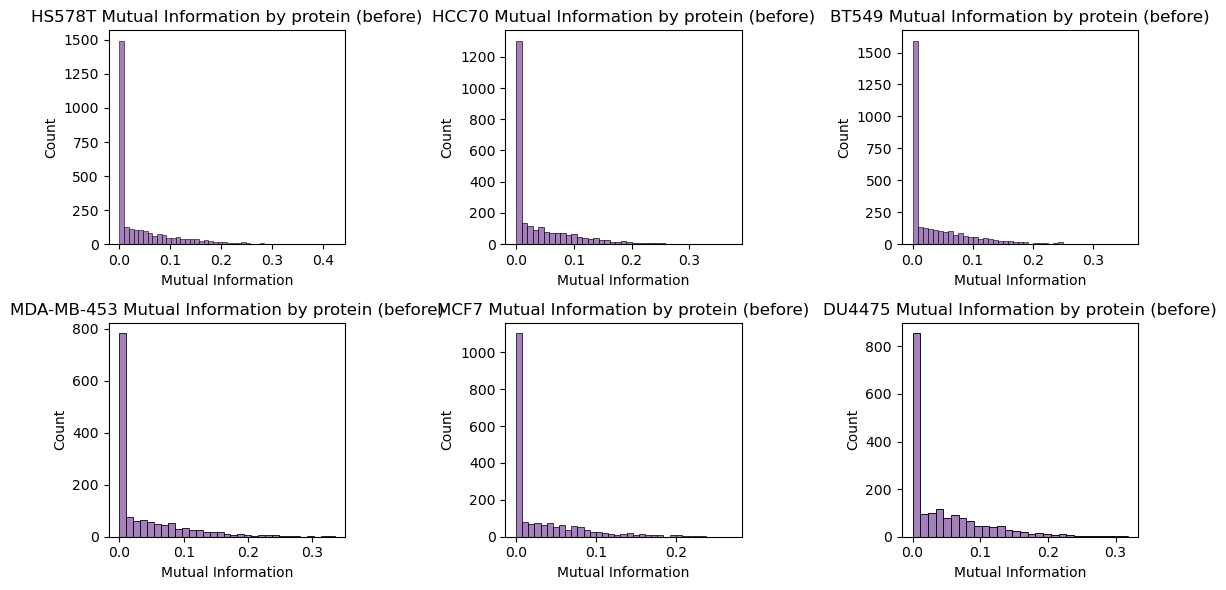

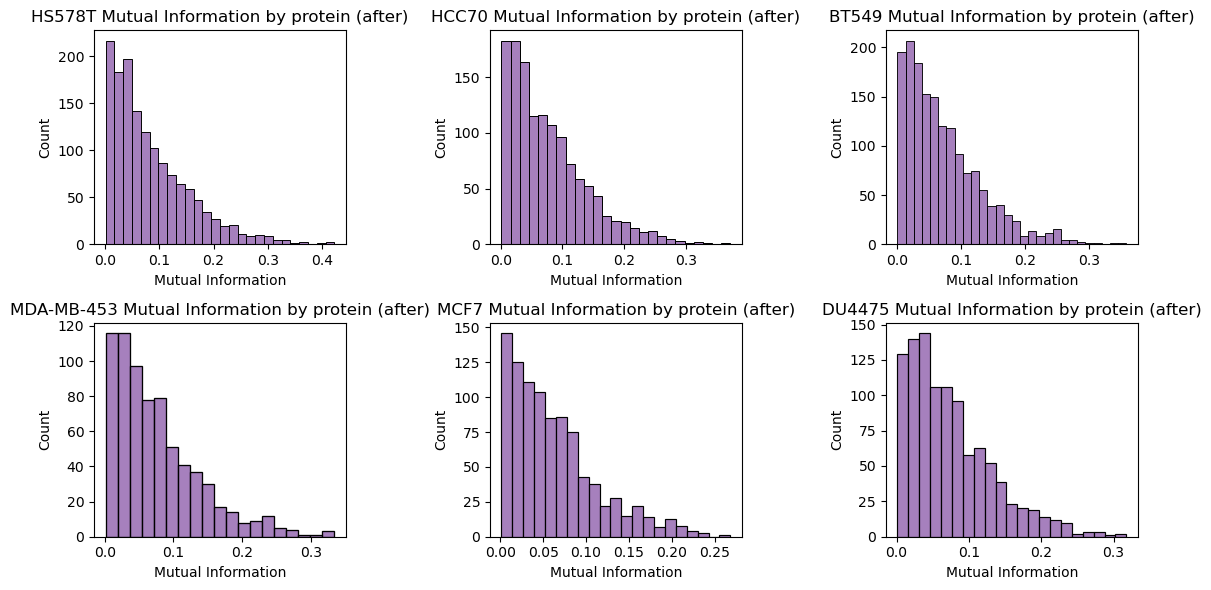

applying filter 7 of 10: ['iterative_signal_filtering', '3']
filtering using iterative SNR filtering
graphing not implemented
applying filter 8 of 10: ['spearman_corr_filtering', '0.2', 'meta_Inhi_5']
filtering by spearman correlation


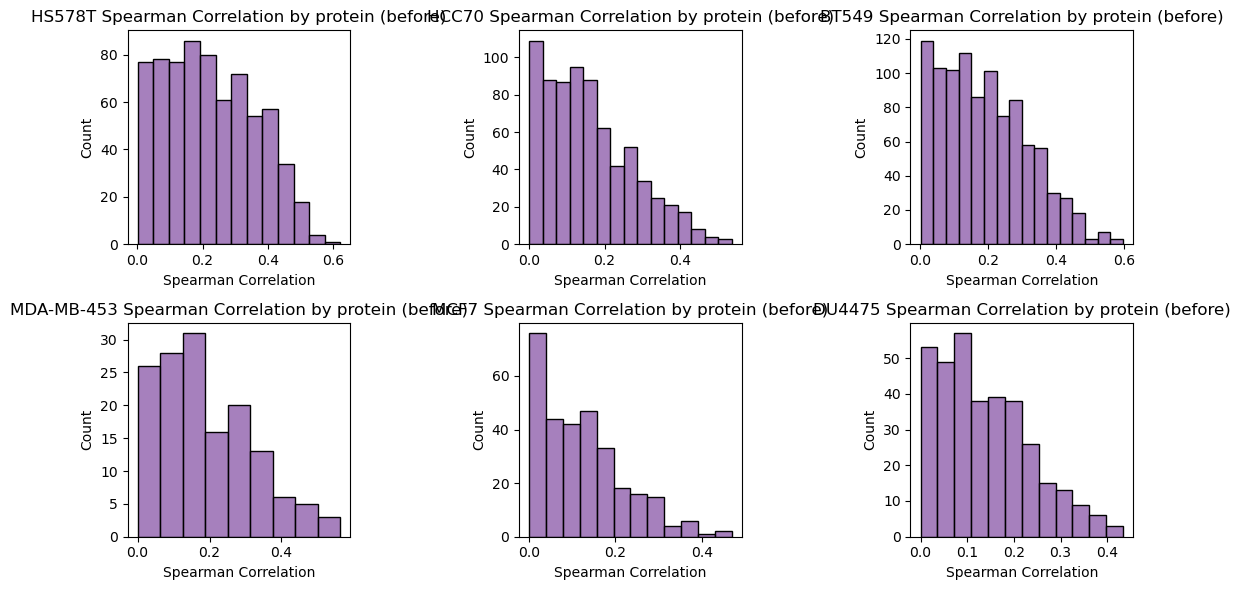

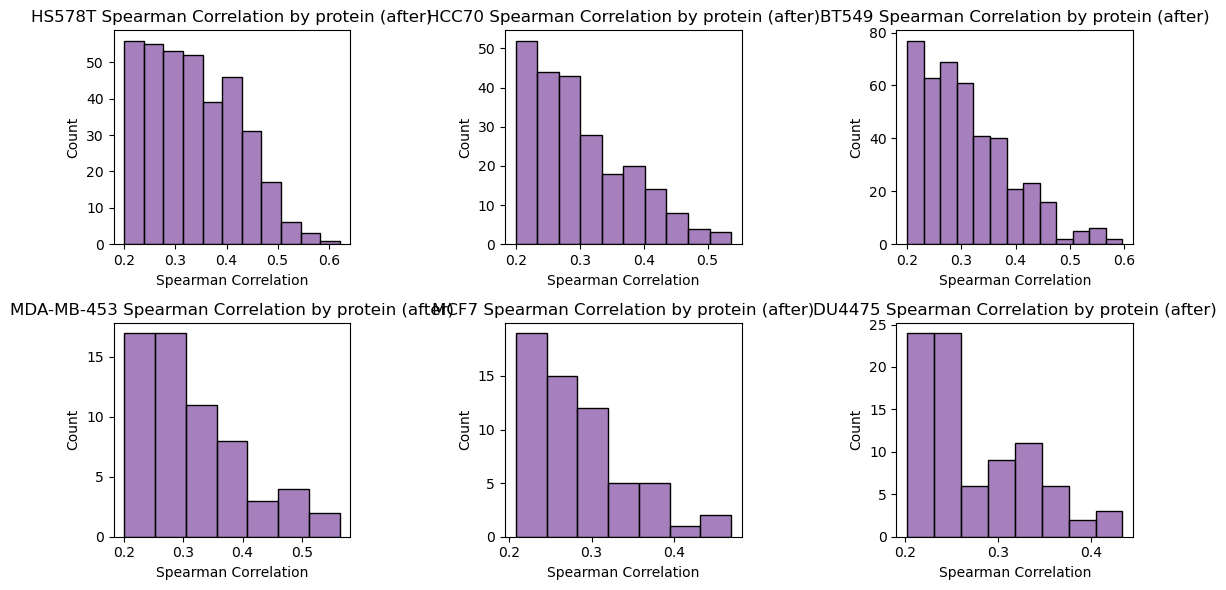

applying filter 9 of 10: ['pearson_corr_filtering', '0.2', 'meta_Inhi_5']
filtering by pearson correlation


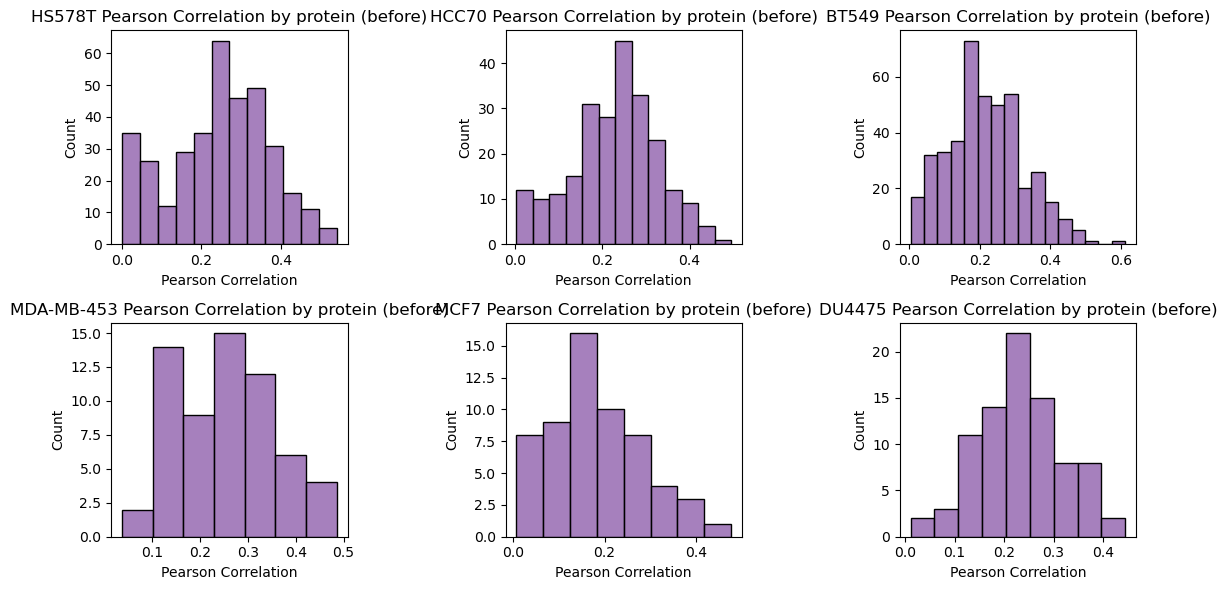

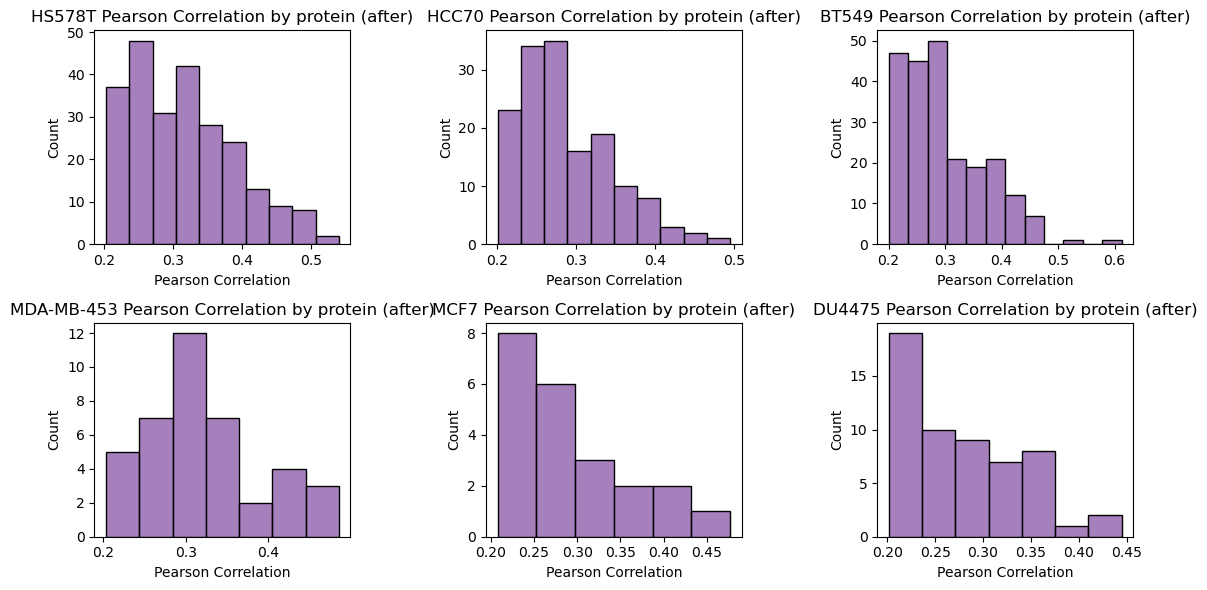

applying filter 10 of 10: ['noise injected', '_']
filter ['noise injected', '_'] not found
////////////Hash:   7d24ea   ///////////////////////////
+------------------------------------------+----------+---------+---------+--------------+--------+----------+
|                                          |   HS578T |   HCC70 |   BT549 |   MDA-MB-453 |   MCF7 |   DU4475 |
+==========================================+==========+=========+=========+==============+========+==========+
| raw_data                                 |     5434 |    5441 |    5420 |         5418 |   5426 |     5421 |
+------------------------------------------+----------+---------+---------+--------------+--------+----------+
| step_1_filter_proteins_with_control__    |     4145 |    3283 |    4029 |         1498 |   2190 |     2121 |
+------------------------------------------+----------+---------+---------+--------------+--------+----------+
| step_2_log2_transform_by_control__       |     4145 |    3283 |    4029 |

'7d24ea'

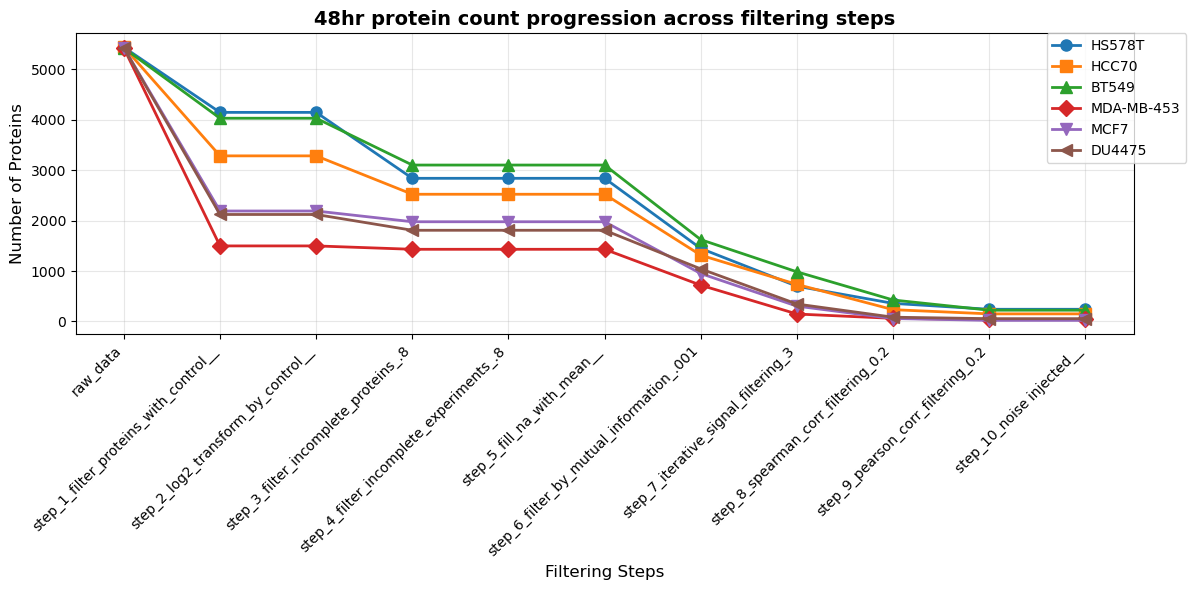

In [34]:
#48hr pipeline:
print('targeted proteins 48hr')
forty_eight_hr_tgt_pipeline=filtering_pipeline(tgt_prots_raw_48hr,data_48hr['cell_lines'],data_48hr['control_data_by_cell_line'],'48hr',data_48hr['control_data_by_cell_line_coeffvar'],**config)
hd_fortyeight_tgt=forty_eight_hr_tgt_pipeline.run_pipeline(pipeline_steps_tgt,save_dir=saved_filter_dir,tgt='tgt')
sum_fortyeight_tgt=forty_eight_hr_tgt_pipeline.summary_of_pipeline()
forty_eight_hr_tgt_pipeline.save_pipeline(saved_filter_dir,tgt='tgt')


print('non-targeted proteins 48hr')
forty_eight_hr_non_tgt_pipeline=filtering_pipeline(non_tgt_prots_raw_48hr,data_48hr['cell_lines'],data_48hr['control_data_by_cell_line'],'48hr',data_48hr['control_data_by_cell_line_coeffvar'],**config)
hd_fortyeight_non_tgt=forty_eight_hr_non_tgt_pipeline.run_pipeline(pipeline_steps_nontgt,save_dir=saved_filter_dir,tgt='nontgt')
sum_fortyeight_non_tgt=forty_eight_hr_non_tgt_pipeline.summary_of_pipeline()
forty_eight_hr_non_tgt_pipeline.save_pipeline(saved_filter_dir,tgt='nontgt')
# _=forty_eight_hr_non_tgt_pipeline.run_loo_regression(ycol='meta_Inhi_5',model=elasticnet_model)
# plot_protein_correlation_heatmaps(forty_eight_hr_tgt_pipeline.final_filtered_data,cell_lines)
# plot_protein_correlation_heatmaps(forty_eight_hr_non_tgt_pipeline.final_filtered_data,cell_lines)


In [35]:
#making combined dicts and ablation studying to get the most important so that I can have 100 nodes:
#ablation studying:
#TODO reimpleent the ablation study


#make the combined dictionaries,
cell_lines=data_6hr['cell_lines']
combined_6hr_data=recombine_data(six_hr_non_tgt_pipeline.final_filtered_data,six_hr_tgt_pipeline.final_filtered_data,cell_lines)
combined_24hr_data=recombine_data(twenty_four_hr_non_tgt_pipeline.final_filtered_data,twenty_four_hr_tgt_pipeline.final_filtered_data,cell_lines)
combined_48hr_data=recombine_data(forty_eight_hr_non_tgt_pipeline.final_filtered_data,forty_eight_hr_tgt_pipeline.final_filtered_data,cell_lines)

combined_6hr_data_log=recombine_data(six_hr_tgt_pipeline.outputs_from_steps['step_2_log2_transform_by_control__']['filtered_data'],six_hr_non_tgt_pipeline.outputs_from_steps['step_2_log2_transform_by_control__']['filtered_data'],cell_lines)
combined_24hr_data_log=recombine_data(twenty_four_hr_tgt_pipeline.outputs_from_steps['step_2_log2_transform_by_control__']['filtered_data'],twenty_four_hr_non_tgt_pipeline.outputs_from_steps['step_2_log2_transform_by_control__']['filtered_data'],cell_lines)
combined_48hr_data_log=recombine_data(forty_eight_hr_tgt_pipeline.outputs_from_steps['step_2_log2_transform_by_control__']['filtered_data'],forty_eight_hr_non_tgt_pipeline.outputs_from_steps['step_2_log2_transform_by_control__']['filtered_data'],cell_lines)

#now make cellbox files for each of the timepoints:
#cellbox files look like:
#node_Index, a list of the names of each of the nodes
#pert.csv has all the experiments as rows, and proteins/nodes as columns; expressions zeroed out and the activities are tanh transformed;
#expr.csv has all the experiments as rows, and proteins/nodes as columns; expressions are log2 transformed and activites are tanh transformed


In [36]:
#making cellbox files
#putting them in a convenient location
from pathlib import Path
import os
save_dir = Path(os.getcwd()).resolve().parent.parent / 'Experiments' / 'TNBC_cellbox_files'
save_dir.mkdir(parents=True, exist_ok=True)


#pick a cell line and timepoint to make the cellbox files for
selected_cell_line='HS578T'
a_six_hr_data_for_cellbox=combined_6hr_data[selected_cell_line]
drug_pert_id_targets_dict=data_6hr['drug_pert_id_targets_dict'] #This dict has the pert Id and drug name as keys and the targeted proteins as values
phenotype_columns=['meta_Inhi_5']
a_expr_csv, a_pert_csv, a_node_index_csv=make_cellbox_files2(
    six_hr_non_tgt_pipeline.final_filtered_data[selected_cell_line],
    phenotype_columns,
    six_hr_tgt_pipeline.final_filtered_data[selected_cell_line],
    drug_pert_id_targets_dict,
    save_dir,
    file_prefix=f"{selected_cell_line}_6hr"
)


Processing cell lines:  17%|█▋        | 1/6 [00:05<00:29,  5.91s/it]

[HS578T] LOO R2: 0.143 | MSE: 0.109 | Pearson: 0.389 | Features: 464


Processing cell lines:  33%|███▎      | 2/6 [00:13<00:26,  6.71s/it]

[HCC70] LOO R2: 0.323 | MSE: 0.715 | Pearson: 0.592 | Features: 314


Processing cell lines:  50%|█████     | 3/6 [00:29<00:32, 10.96s/it]

[BT549] LOO R2: 0.134 | MSE: 0.263 | Pearson: 0.426 | Features: 574


Processing cell lines:  67%|██████▋   | 4/6 [00:35<00:17,  8.95s/it]

[MDA-MB-453] LOO R2: 0.236 | MSE: 1.064 | Pearson: 0.489 | Features: 117


Processing cell lines:  83%|████████▎ | 5/6 [00:37<00:06,  6.68s/it]

[MCF7] LOO R2: -0.171 | MSE: 0.331 | Pearson: -0.104 | Features: 92


Processing cell lines: 100%|██████████| 6/6 [00:43<00:00,  7.28s/it]


[DU4475] LOO R2: 0.200 | MSE: 0.649 | Pearson: 0.468 | Features: 127


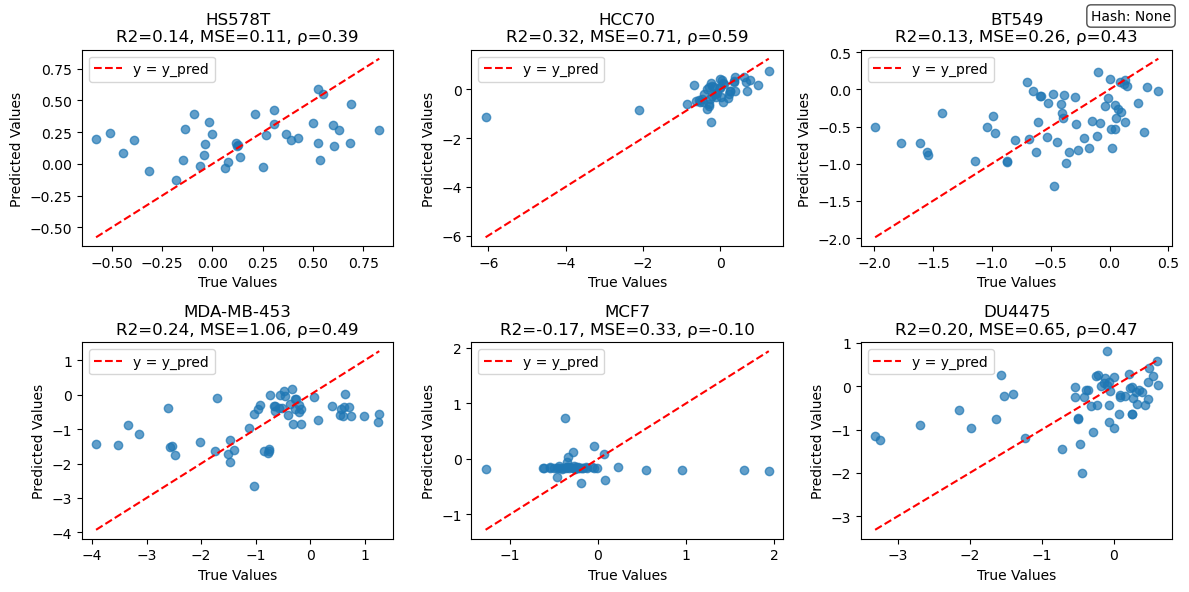

Processing cell lines:  17%|█▋        | 1/6 [00:06<00:31,  6.30s/it]

[HS578T] LOO R2: -0.241 | MSE: 0.158 | Pearson: -0.297 | Features: 464


Processing cell lines:  33%|███▎      | 2/6 [00:13<00:27,  6.86s/it]

[HCC70] LOO R2: 0.162 | MSE: 0.885 | Pearson: 0.412 | Features: 314


Processing cell lines:  50%|█████     | 3/6 [00:28<00:32, 10.75s/it]

[BT549] LOO R2: 0.338 | MSE: 0.201 | Pearson: 0.590 | Features: 574


Processing cell lines:  67%|██████▋   | 4/6 [00:32<00:16,  8.06s/it]

[MDA-MB-453] LOO R2: 0.535 | MSE: 0.649 | Pearson: 0.743 | Features: 117


Processing cell lines:  83%|████████▎ | 5/6 [00:35<00:06,  6.11s/it]

[MCF7] LOO R2: -0.024 | MSE: 0.290 | Pearson: 0.047 | Features: 92


Processing cell lines: 100%|██████████| 6/6 [00:41<00:00,  6.93s/it]


[DU4475] LOO R2: 0.272 | MSE: 0.590 | Pearson: 0.530 | Features: 127


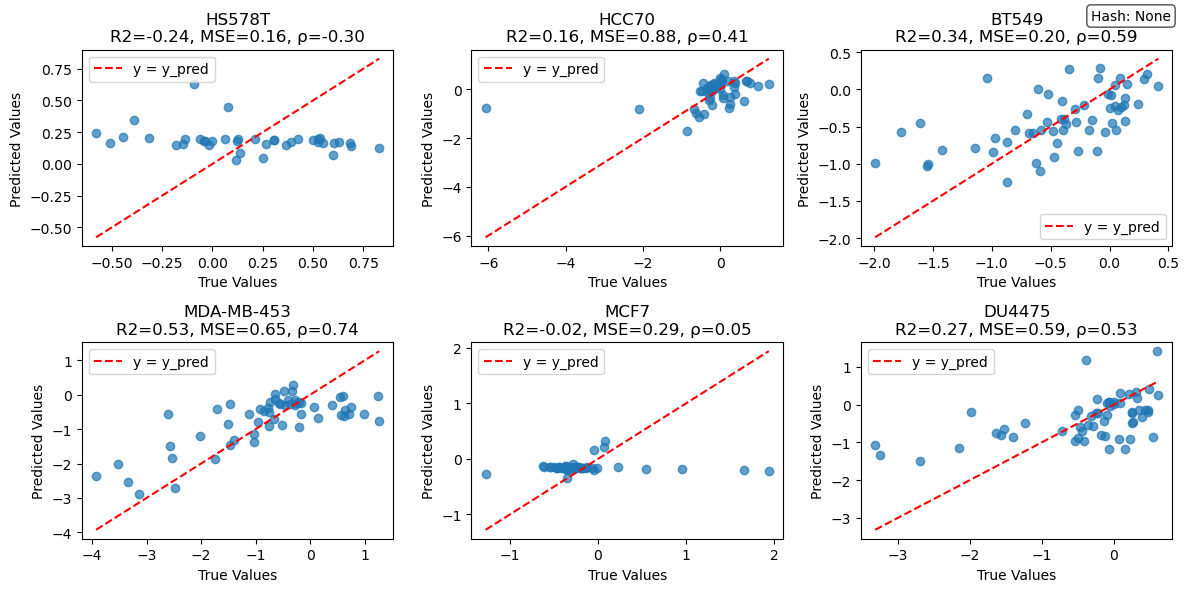

Processing cell lines:  17%|█▋        | 1/6 [00:07<00:37,  7.52s/it]

[HS578T] LOO R2: 0.031 | MSE: 0.124 | Pearson: 0.197 | Features: 464


Processing cell lines:  33%|███▎      | 2/6 [00:15<00:30,  7.57s/it]

[HCC70] LOO R2: -0.019 | MSE: 1.076 | Pearson: 0.062 | Features: 314


Processing cell lines:  50%|█████     | 3/6 [00:33<00:37, 12.65s/it]

[BT549] LOO R2: 0.213 | MSE: 0.239 | Pearson: 0.468 | Features: 574


Processing cell lines:  67%|██████▋   | 4/6 [00:39<00:19,  9.89s/it]

[MDA-MB-453] LOO R2: 0.341 | MSE: 0.919 | Pearson: 0.588 | Features: 117


Processing cell lines:  83%|████████▎ | 5/6 [00:42<00:07,  7.41s/it]

[MCF7] LOO R2: 0.091 | MSE: 0.257 | Pearson: 0.367 | Features: 92


Processing cell lines: 100%|██████████| 6/6 [00:50<00:00,  8.45s/it]


[DU4475] LOO R2: 0.190 | MSE: 0.657 | Pearson: 0.468 | Features: 127


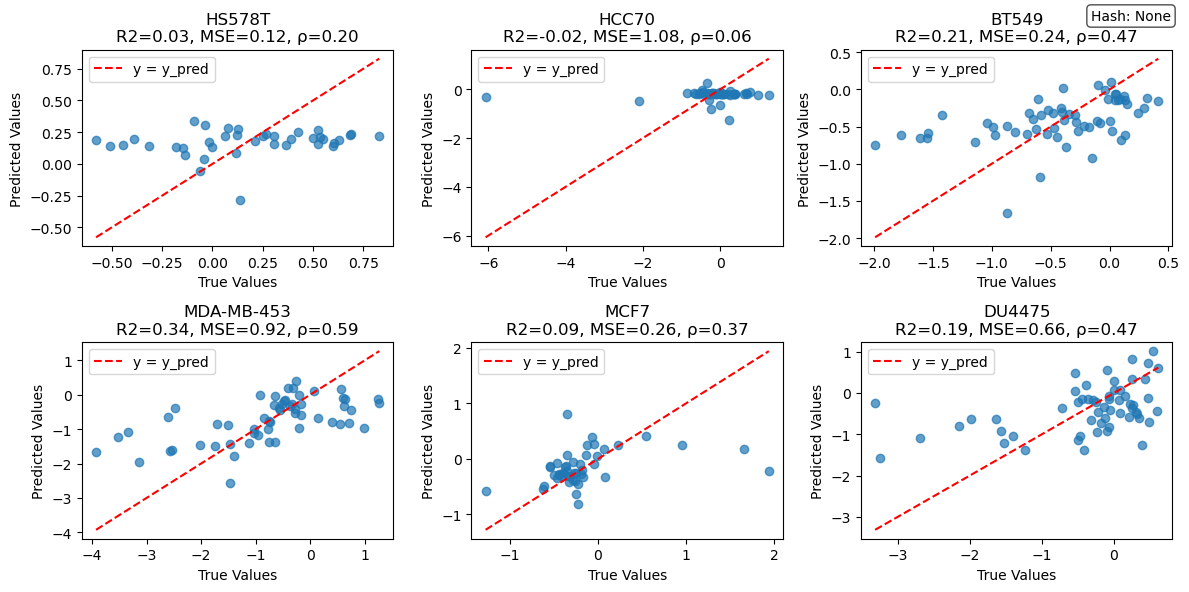

{'HS578T': {'r2': 0.030659893075759892,
  'mse': 0.12361527153616678,
  'pearson': 0.19746401736605856,
  'y_true': [0.36448909660795364,
   -0.015744372782199166,
   0.6822410834129333,
   0.5986010783072435,
   0.5259617510730565,
   0.07631115322835191,
   0.4262346926503656,
   0.11828789320516377,
   0.12026164654458754,
   0.20936644941261012,
   -0.39140656615601166,
   -0.5109576315462384,
   0.6309629402333045,
   -0.004674322721206415,
   -0.1836570835149512,
   -0.13892647540631267,
   0.4976292859881447,
   0.060950842262919254,
   0.2659885722002431,
   0.3068246971316003,
   -0.3140637215242044,
   0.6889073222734687,
   0.6040658622984807,
   -0.1463877620403366,
   0.13936733053797742,
   0.5342137439269985,
   0.3925204619094579,
   -0.4445948450501083,
   0.8296621460749704,
   0.30678230142303575,
   -0.06050890854230823,
   0.12510032208988497,
   -0.042372944188074496,
   0.25010834784025604,
   -0.5791451039918514,
   -0.09283951101413677,
   -0.03662250283646846,

In [37]:

#taking union of proteins across all the timepoints and using that to predict:
_6hr_prots,_24hr_prots,_48hr_prots,_overall_prots={},{},{},{} #these are all lists of proteins found in each set at the final filtering step
#includes metadata
final_6_hr_data,final_24_hr_data,final_48_hr_data,final_overall_data={},{},{},{}

for cell in cell_lines:
    #collecting union of all proteins across all timepoints:
    _6hr_prots[cell]=list(set(six_hr_non_tgt_pipeline.final_filtered_data[cell].columns).union(set(six_hr_tgt_pipeline.final_filtered_data[cell].columns)))
    _24hr_prots[cell]=list(set(twenty_four_hr_non_tgt_pipeline.final_filtered_data[cell].columns).union(set(twenty_four_hr_tgt_pipeline.final_filtered_data[cell].columns)))
    _48hr_prots[cell]=list(set(forty_eight_hr_non_tgt_pipeline.final_filtered_data[cell].columns).union(set(forty_eight_hr_tgt_pipeline.final_filtered_data[cell].columns)))
    _overall_prots[cell]=list(set(_6hr_prots[cell]).union(set(_24hr_prots[cell])).union(set(_48hr_prots[cell])))
    #pulling out the proteins per cell line:
    final_6_hr_data[cell]=combined_6hr_data_log[cell][_overall_prots[cell]]
    final_24_hr_data[cell]=combined_24hr_data_log[cell][_overall_prots[cell]]
    final_48_hr_data[cell]=combined_48hr_data_log[cell][_overall_prots[cell]]



#running dummy pipelines
dummy_6hr_pipeline=filtering_pipeline(final_6_hr_data,cell_lines,data_6hr['control_data_by_cell_line'],'6hr',data_6hr['control_data_by_cell_line_coeffvar'],**config)
dummy_6hr_pipeline.final_filtered_data=final_6_hr_data
dummy_6hr_pipeline.run_loo_regression(ycol='meta_Inhi_5',model=elasticnet_model)

dummy_24hr_pipeline=filtering_pipeline(final_24_hr_data,cell_lines,data_24hr['control_data_by_cell_line'],'24hr',data_24hr['control_data_by_cell_line_coeffvar'],**config)
dummy_24hr_pipeline.final_filtered_data=final_24_hr_data
dummy_24hr_pipeline.run_loo_regression(ycol='meta_Inhi_5',model=elasticnet_model)

dummy_48hr_pipeline=filtering_pipeline(final_48_hr_data,cell_lines,data_48hr['control_data_by_cell_line'],'48hr',data_48hr['control_data_by_cell_line_coeffvar'],**config)
dummy_48hr_pipeline.final_filtered_data=final_48_hr_data
dummy_48hr_pipeline.run_loo_regression(ycol='meta_Inhi_5',model=elasticnet_model)




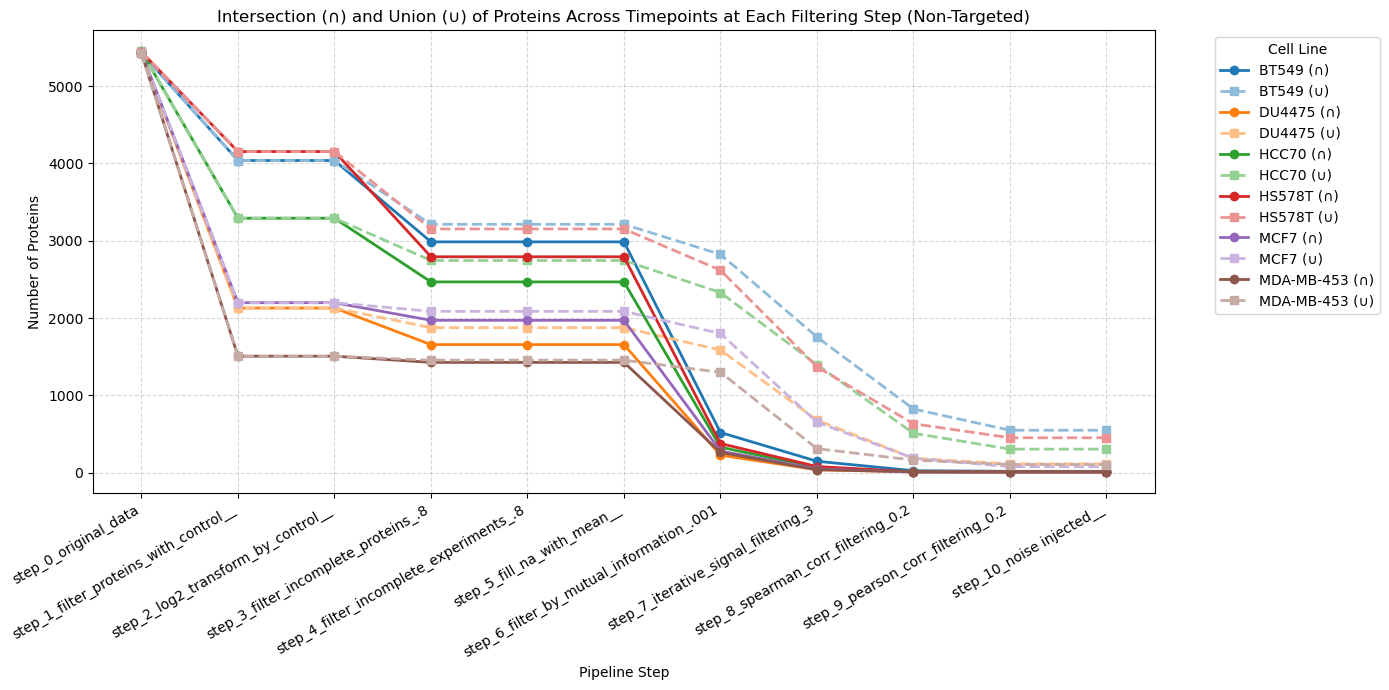

In [38]:
#plotting triple union and intersection of all proteins across each step of the pipeline
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

# Pull the dict of each timepoint:
dict_6hr = six_hr_non_tgt_pipeline.outputs_from_steps
dict_24hr = twenty_four_hr_non_tgt_pipeline.outputs_from_steps
dict_48hr = forty_eight_hr_non_tgt_pipeline.outputs_from_steps

# Collect intersection and union counts at each step for each cell line
intersection_data = []
union_data = []

for step in dict_6hr.keys():
    for cell_line in dict_6hr[step]['filtered_data'].keys():
        data6hr_cell = dict_6hr[step]['filtered_data'][cell_line]
        data24hr_cell = dict_24hr[step]['filtered_data'][cell_line]
        data48hr_cell = dict_48hr[step]['filtered_data'][cell_line]

        set6 = set(data6hr_cell.columns)
        set24 = set(data24hr_cell.columns)
        set48 = set(data48hr_cell.columns)

        triple_intersection = set6 & set24 & set48
        triple_union = set6 | set24 | set48

        intersection_data.append({
            'Step': step,
            'Cell Line': cell_line,
            'Intersection': len(triple_intersection)
        })
        union_data.append({
            'Step': step,
            'Cell Line': cell_line,
            'Union': len(triple_union)
        })

# Convert to DataFrames for easier plotting
intersection_df = pd.DataFrame(intersection_data)
union_df = pd.DataFrame(union_data)

# To ensure steps are in the correct order, extract step number from step name
def extract_step_num(step_name):
    # Assumes step_name like 'step_1_filtername_param'
    try:
        return int(step_name.split('_')[1])
    except Exception:
        return 0

intersection_df['StepNum'] = intersection_df['Step'].apply(extract_step_num)
union_df['StepNum'] = union_df['Step'].apply(extract_step_num)

intersection_df = intersection_df.sort_values(['Cell Line', 'StepNum'])
union_df = union_df.sort_values(['Cell Line', 'StepNum'])

# Prepare x-tick labels: use full step names (no abbreviation)
step_order = sorted(intersection_df['StepNum'].unique())
step_labels = []
for s in step_order:
    # Get the first step name for this step number
    step_name = intersection_df[intersection_df['StepNum'] == s]['Step'].iloc[0]
    # Use the full step name as the label
    label = step_name
    step_labels.append(label)

# Assign two tones of the same color for each cell line
cell_lines = sorted(intersection_df['Cell Line'].unique())
n_cell_lines = len(cell_lines)
# Use a colormap (e.g., tab10 or Set2) and make a lighter and darker version for each cell line
base_cmap = plt.get_cmap('tab10')
color_dict = {}
for idx, cell_line in enumerate(cell_lines):
    base_color = mpl.colors.to_rgb(base_cmap(idx % 10))
    # Darker for intersection, lighter for union
    color_dict[cell_line] = {
        'intersection': base_color,
        'union': tuple([min(1, c + 0.5*(1-c)) for c in base_color])  # lighten by blending with white
    }

plt.figure(figsize=(14, 7))
for cell_line in cell_lines:
    cell_df_int = intersection_df[intersection_df['Cell Line'] == cell_line]
    cell_df_union = union_df[union_df['Cell Line'] == cell_line]
    # Plot intersection (darker)
    plt.plot(
        cell_df_int['StepNum'], cell_df_int['Intersection'],
        marker='o', label=f"{cell_line} (∩)", color=color_dict[cell_line]['intersection'], linewidth=2
    )
    # Plot union (lighter, dashed)
    plt.plot(
        cell_df_union['StepNum'], cell_df_union['Union'],
        marker='s', label=f"{cell_line} (∪)", color=color_dict[cell_line]['union'], linestyle='--', linewidth=2
    )

plt.xlabel('Pipeline Step')
plt.ylabel('Number of Proteins')
plt.title('Intersection (∩) and Union (∪) of Proteins Across Timepoints at Each Filtering Step (Non-Targeted)')
plt.legend(title='Cell Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(step_order, step_labels, rotation=30, ha='right')
plt.grid(True, which='both', axis='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [39]:
#after log transform and before filtering:
import matplotlib.pyplot as plt
import numpy as np

cell_list = list(combined_6hr_dict_log.keys())
n_cells = len(cell_list)
n_cols = 3
n_rows = int(np.ceil(n_cells / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)
timepoints = ['6hr', '24hr', '48hr']
colors = ['#1f77b4', '#d62728', '#2ca02c']
alpha = 0.5

for idx, cell in enumerate(cell_list):
    row = idx // n_cols
    col = idx % n_cols
    ax = axes[row, col]

    # Drop columns matching regex 'meta_' for each timepoint
    data_6hr_cell = combined_6hr_dict[cell].drop(columns=combined_6hr_dict[cell].filter(regex='meta_').columns)
    data_24hr_cell = combined_24hr_dict[cell].drop(columns=combined_24hr_dict[cell].filter(regex='meta_').columns)
    data_48hr_cell = combined_48hr_dict[cell].drop(columns=combined_48hr_dict[cell].filter(regex='meta_').columns)


    #for after filtering: keep only intersection of all proteins across all timepoints:
    intersection_prots=list(set(data_6hr_cell.columns).intersection(set(data_24hr_cell.columns)).intersection(set(data_48hr_cell.columns)))
    data_6hr_cell=data_6hr_cell[intersection_prots]
    data_24hr_cell=data_24hr_cell[intersection_prots]
    data_48hr_cell=data_48hr_cell[intersection_prots]


    data6minus24=data_6hr_cell.reset_index()-data_24hr_cell.reset_index()
    data24minus48=data_24hr_cell.reset_index()-data_48hr_cell.reset_index()

    data6minus24.drop(columns='index',inplace=True)
    data24minus48.drop(columns='index',inplace=True)
  

    # Flatten to 1D arrays, drop NaNs
    vals_6hr = data_6hr_cell.values.flatten()
    vals_6hr = vals_6hr[~np.isnan(vals_6hr)]
    vals_24hr = data_24hr_cell.values.flatten()
    vals_24hr = vals_24hr[~np.isnan(vals_24hr)]
    vals_48hr = data_48hr_cell.values.flatten()
    vals_48hr = vals_48hr[~np.isnan(vals_48hr)]


    vals_6minus24 = data6minus24.values.flatten()
    vals_6minus24 = vals_6minus24[~np.isnan(vals_6minus24)]
    vals_24minus48 = data24minus48.values.flatten()
    vals_24minus48 = vals_24minus48[~np.isnan(vals_24minus48)]
    
    # # Plot PDF (normalized histogram) for each timepoint
    ax.hist(vals_6hr, bins=40, density=True, alpha=alpha, color=colors[0], label='6hr')
    # ax.hist(vals_24hr, bins=40, density=True, alpha=alpha, color=colors[1], label='24hr')
    # ax.hist(vals_48hr, bins=40, density=True, alpha=alpha, color=colors[2], label='48hr')


    ax.hist(vals_6minus24, bins=40, density=True, alpha=alpha, color=colors[1], label='6hr minus 24hr')
    ax.hist(vals_24minus48, bins=40, density=True, alpha=alpha, color=colors[2], label='24hr minus48hr')

    
    ax.set_title(f"{cell}")
    ax.set_xlabel("Log2(Intensity)")
    ax.set_ylabel("Probability Density")
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.4)

# Hide any unused subplots
for idx in range(n_cells, n_rows * n_cols):
    fig.delaxes(axes[idx // n_cols, idx % n_cols])

fig.suptitle("PDF of Log2 Intensities for Each Cell Line and Timepoint (After filtering, intersection only proteins)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

NameError: name 'combined_6hr_dict_log' is not defined

In [ ]:
# Calculate overlap statistics for targeted, untargeted, and all proteins
import pandas as pd

def get_protein_columns(df):
    """Return set of columns that are not metadata (do not start with 'meta_')."""
    return set([col for col in df.columns if not col.startswith('meta_')])

stats_tgt = []
stats_nontgt = []
stats_all = []

for cell in cell_lines:
    # Targeted proteins (remove metadata columns)
    prots_6_tgt = get_protein_columns(six_hr_tgt_pipeline.final_filtered_data[cell])
    prots_24_tgt = get_protein_columns(twenty_four_hr_tgt_pipeline.final_filtered_data[cell])
    prots_48_tgt = get_protein_columns(forty_eight_hr_tgt_pipeline.final_filtered_data[cell])
    
    # Untargeted proteins (remove metadata columns)
    prots_6_nontgt = get_protein_columns(six_hr_non_tgt_pipeline.final_filtered_data[cell])
    prots_24_nontgt = get_protein_columns(twenty_four_hr_non_tgt_pipeline.final_filtered_data[cell])
    prots_48_nontgt = get_protein_columns(forty_eight_hr_non_tgt_pipeline.final_filtered_data[cell])
    
    # All proteins (union of targeted and untargeted, after removing metadata)
    prots_6_all = prots_6_tgt | prots_6_nontgt
    prots_24_all = prots_24_tgt | prots_24_nontgt
    prots_48_all = prots_48_tgt | prots_48_nontgt

    # Targeted stats
    stats_tgt.append({
        'Cell Line': cell,
        '6hr': len(prots_6_tgt),
        '24hr': len(prots_24_tgt),
        '48hr': len(prots_48_tgt),
        '6hr∩24hr': len(prots_6_tgt & prots_24_tgt),
        '6hr∩48hr': len(prots_6_tgt & prots_48_tgt),
        '24hr∩48hr': len(prots_24_tgt & prots_48_tgt),
        '6hr∩24hr∩48hr': len(prots_6_tgt & prots_24_tgt & prots_48_tgt)
    })
    # Untargeted stats
    stats_nontgt.append({
        'Cell Line': cell,
        '6hr': len(prots_6_nontgt),
        '24hr': len(prots_24_nontgt),
        '48hr': len(prots_48_nontgt),
        '6hr∩24hr': len(prots_6_nontgt & prots_24_nontgt),
        '6hr∩48hr': len(prots_6_nontgt & prots_48_nontgt),
        '24hr∩48hr': len(prots_24_nontgt & prots_48_nontgt),
        '6hr∩24hr∩48hr': len(prots_6_nontgt & prots_24_nontgt & prots_48_nontgt)
    })
    # All proteins stats
    stats_all.append({
        'Cell Line': cell,
        '6hr': len(prots_6_all),
        '24hr': len(prots_24_all),
        '48hr': len(prots_48_all),
        '6hr∩24hr': len(prots_6_all & prots_24_all),
        '6hr∩48hr': len(prots_6_all & prots_48_all),
        '24hr∩48hr': len(prots_24_all & prots_48_all),
        '6hr∩24hr∩48hr': len(prots_6_all & prots_24_all & prots_48_all)
    })

# Display tables
print("Targeted Protein Overlap:")
display(pd.DataFrame(stats_tgt))
print("Untargeted Protein Overlap:")
display(pd.DataFrame(stats_nontgt))
print("All Proteins Overlap:")
display(pd.DataFrame(stats_all))


# Legacy

In [ ]:
#filtering all timepoints together p1
overall_non_tgt_data={}
overall_tgt_data={}
for cell in cell_lines:
    overall_non_tgt_data[cell]=pd.concat([non_targeted_prots_raw_6hr[cell],non_targeted_prots_raw_24hr[cell],non_targeted_prots_raw_48hr[cell]],axis=0)
    overall_tgt_data[cell]=pd.concat([targeted_prots_raw_6hr[cell],targeted_prots_raw_24hr[cell],targeted_prots_raw_48hr[cell]],axis=0)

    # Targeted stats
    stats_tgt.append({
        'Cell Line': cell,
        '6hr': len(prots_6_tgt),
        '24hr': len(prots_24_tgt),
        '48hr': len(prots_48_tgt),
        '6hr∩24hr': len(prots_6_tgt & prots_24_tgt),
        '6hr∩48hr': len(prots_6_tgt & prots_48_tgt),
        '24hr∩48hr': len(prots_24_tgt & prots_48_tgt),
        '6hr∩24hr∩48hr': len(prots_6_tgt & prots_24_tgt & prots_48_tgt)
    })
    # Untargeted stats
    stats_nontgt.append({
        'Cell Line': cell,
        '6hr': len(prots_6_nontgt),
        '24hr': len(prots_24_nontgt),
        '48hr': len(prots_48_nontgt),
        '6hr∩24hr': len(prots_6_nontgt & prots_24_nontgt),
        '6hr∩48hr': len(prots_6_nontgt & prots_48_nontgt),
        '24hr∩48hr': len(prots_24_nontgt & prots_48_nontgt),
        '6hr∩24hr∩48hr': len(prots_6_nontgt & prots_24_nontgt & prots_48_nontgt)
    })
    # All proteins stats
    stats_all.append({
        'Cell Line': cell,
        '6hr': len(prots_6_all),
        '24hr': len(prots_24_all),
        '48hr': len(prots_48_all),
        '6hr∩24hr': len(prots_6_all & prots_24_all),
        '6hr∩48hr': len(prots_6_all & prots_48_all),
        '24hr∩48hr': len(prots_24_all & prots_48_all),
        '6hr∩24hr∩48hr': len(prots_6_all & prots_24_all & prots_48_all)
    })

overall_non_tgt_pipeline=filtering_pipeline(overall_non_tgt_data,cell_lines,data_6hr['control_data_by_cell_line'],'overall',data_6hr['control_data_by_cell_line_coeffvar'],**config)
overall_tgt_pipeline=filtering_pipeline(overall_tgt_data,cell_lines,data_6hr['control_data_by_cell_line'],'overall',data_6hr['control_data_by_cell_line_coeffvar'],**config)

overall_tgt_pipeline.run_pipeline(pipeline_steps_tgt,save_dir=saved_filter_dir,tgt='tgt')
overall_tgt_pipeline.summary_of_pipeline()
overall_tgt_pipeline.save_pipeline(saved_filter_dir,tgt='tgt')


overall_non_tgt_pipeline.run_pipeline(pipeline_steps_nontgt,save_dir=saved_filter_dir,tgt='nontgt')
overall_non_tgt_pipeline.summary_of_pipeline()
overall_non_tgt_pipeline.save_pipeline(saved_filter_dir,tgt='nontgt')

#splitting the overall pipeline after filtering into 6,24,and 48hrs to see if it can still elasticnet predict
#selecting the 6hr data
_6hr_data={}
_24hr_data={}
_48hr_data={}
for cell in cell_lines:
    _6hr_data[cell]=overall_non_tgt_pipeline.final_filtered_data[cell].loc[overall_non_tgt_pipeline.final_filtered_data[cell]['meta_pert_time_x']==6.0]
    _24hr_data[cell]=overall_non_tgt_pipeline.final_filtered_data[cell].loc[overall_non_tgt_pipeline.final_filtered_data[cell]['meta_pert_time_x']==24.0]
    _48hr_data[cell]=overall_non_tgt_pipeline.final_filtered_data[cell].loc[overall_non_tgt_pipeline.final_filtered_data[cell]['meta_pert_time_x']==48.0]

dummy_6_hr=filtering_pipeline(_6hr_data,cell_lines,data_6hr['control_data_by_cell_line'],'6hr',data_6hr['control_data_by_cell_line_coeffvar'],**config)
dummy_24_hr=filtering_pipeline(_24hr_data,cell_lines,data_6hr['control_data_by_cell_line'],'24hr',data_6hr['control_data_by_cell_line_coeffvar'],**config)
dummy_48_hr=filtering_pipeline(_48hr_data,cell_lines,data_6hr['control_data_by_cell_line'],'48hr',data_6hr['control_data_by_cell_line_coeffvar'],**config)



In [ ]:
#filtering all timepoints together p2
hash=overall_non_tgt_pipeline.pipeline_hash

dummy_6_hr.final_filtered_data=_6hr_data
dummy_6_hr.pipeline_hash=hash
dummy_6_hr.run_loo_regression(ycol='meta_Inhi_5',model=elasticnet_model)


dummy_24_hr.final_filtered_data=_24hr_data
dummy_24_hr.pipeline_hash=hash
dummy_24_hr.run_loo_regression(ycol='meta_Inhi_5',model=elasticnet_model)


dummy_48_hr.final_filtered_data=_48hr_data
dummy_48_hr.pipeline_hash=hash
dummy_48_hr.run_loo_regression(ycol='meta_Inhi_5',model=elasticnet_model)





In [ ]:
# legacy timepoint analysis
# Calculate Mutual Information between timepoints for each protein in each cell line
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

# Prepare to collect Mutual Information values per cell line and timepoint pair
mi_by_cell = {
    '6_24': {},
    '24_48': {},
    '6_48': {}
}

cell_lines = data_6hr['cell_lines']
n_cells = len(cell_lines)
n_cols = 3
n_rows = int(np.ceil(n_cells / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)
axes = axes.flatten()

# Color and label settings for each comparison
mi_pairs = [
    ('6_24', log2_transform_6hr, log2_transform_24hr, '#1f77b4', '6hr vs 24hr'),
    ('24_48', log2_transform_24hr, log2_transform_48hr, '#d62728', '24hr vs 48hr'),
    ('6_48', log2_transform_6hr, log2_transform_48hr, '#2ca02c', '6hr vs 48hr')
]

for idx, cell in enumerate(cell_lines):
    ax = axes[idx]
    for pair_key, df_a_dict, df_b_dict, color, label in mi_pairs:
        df_a = df_a_dict[cell]
        df_b = df_b_dict[cell]
        # Find common protein columns (excluding meta columns)
        prot_cols_a = [col for col in df_a.columns if not col.startswith('meta_')]
        prot_cols_b = [col for col in df_b.columns if not col.startswith('meta_')]
        common_prots = sorted(list(set(prot_cols_a) & set(prot_cols_b)))

        print(f"Cell line: {cell} | {label}")
        print(f"  Number of proteins at timepoint A: {len(prot_cols_a)}")
        print(f"  Number of proteins at timepoint B: {len(prot_cols_b)}")
        print(f"  Number of common proteins: {len(common_prots)}")
        if not common_prots:
            mi_by_cell[pair_key][cell] = []
            continue

        # For each protein, compute mutual information between timepoints across all experiments
        mi_scores = []
        for prot in common_prots:
            x = df_a[prot].values
            y = df_b[prot].values
            # Only keep pairs where both are finite
            mask = np.isfinite(x) & np.isfinite(y)
            if np.sum(mask) > 1:
                # Reshape for sklearn
                x_masked = x[mask].reshape(-1, 1)
                y_masked = y[mask]
                # mutual_info_regression expects 2D X and 1D y
                try:
                    mi = mutual_info_regression(x_masked, y_masked, random_state=0)
                    if np.isfinite(mi[0]):
                        mi_scores.append(mi[0])
                except Exception as e:
                    # If MI fails (e.g., constant input), skip
                    pass
        mi_by_cell[pair_key][cell] = mi_scores

        # Plot histogram for this cell line and timepoint pair
        ax.hist(
            mi_scores,
            bins=30,
            color=color,
            alpha=0.45,
            edgecolor='black',
            label=label
        )

    ax.set_xlabel('Mutual Information')
    ax.set_ylabel('Count')
    ax.set_title(f'{cell}\nHistogram of Mutual Information (per protein)')
    ax.grid(alpha=0.2)
    ax.legend()

# Hide unused subplots
for j in range(len(cell_lines), n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
#This is legacy code for the 6,24,48hr histgram data;


import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import to_rgba

# Prepare data and cell lines
cell_lines = data_48hr['cell_lines']

# Use more distinct, custom colors and higher transparency for overlap clarity
timepoint_colors = {
    '6hr': to_rgba('#1f77b4', alpha=0.35),    # blue, more transparent
    '24hr': to_rgba('#d62728', alpha=0.35),   # red, more transparent
    '48hr': to_rgba('#2ca02c', alpha=0.35)    # green, more transparent
}
timepoint_labels = {
    '6hr': '6 hr',
    '24hr': '24 hr',
    '48hr': '48 hr'
}
timepoint_data = {
    '6hr': log2_transform_6hr,
    '24hr': log2_transform_24hr,
    '48hr': log2_transform_48hr
}

n_cols = 3
n_rows = int(np.ceil(len(cell_lines) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)
axes = axes.flatten()

for idx, cell in enumerate(cell_lines):
    ax = axes[idx]
    for tp, color in timepoint_colors.items():
        # Drop meta columns and flatten values
        meta_cols = timepoint_data[tp][cell].filter(regex='meta_').columns
        vals = timepoint_data[tp][cell].drop(columns=meta_cols).select_dtypes(include=[float, int]).values.flatten()
        vals = vals[~np.isnan(vals)]
        ax.hist(
            vals,
            bins=100,
            alpha=.33,  # alpha handled in color
            color=color,
            label=timepoint_labels[tp],
            log=False,
            edgecolor='none'
        )
    ax.set_title(f"{cell} - Data Value Distribution")
    ax.set_xlabel("log2(fold change)")
    ax.set_ylabel("Count (log scale)")
    ax.legend()
    ax.grid(True, alpha=0.3)

# Hide unused axes
for j in range(len(cell_lines), n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
# Plot post-filtering 6,24,48hr probability density functions (PDFs) using the combined data_dicts:
# The dictionaries of data are the combined dicts:
# combined_6hr_dict, combined_24hr_dict, combined_48hr_dict

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import to_rgba

# Prepare data and cell lines
cell_lines = list(combined_6hr_dict.keys())

# Use more distinct, custom colors and higher transparency for overlap clarity
timepoint_colors = {
    '6hr': to_rgba('#1f77b4', alpha=0.35),    # blue, more transparent
    '24hr': to_rgba('#d62728', alpha=0.35),   # red, more transparent
    '48hr': to_rgba('#2ca02c', alpha=0.35)    # green, more transparent
}
timepoint_labels = {
    '6hr': '6 hr',
    '24hr': '24 hr',
    '48hr': '48 hr'
}
timepoint_data = {
    '6hr': combined_6hr_dict,
    '24hr': combined_24hr_dict,
    '48hr': combined_48hr_dict
}

n_cols = 3
n_rows = int(np.ceil(len(cell_lines) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)
axes = axes.flatten()

# To ensure all PDFs are on the same x-axis, find global min/max
all_vals = []
for tp in timepoint_data:
    for cell in cell_lines:
        df = timepoint_data[tp][cell]
        meta_cols = df.filter(regex='meta_').columns
        vals = df.drop(columns=meta_cols).select_dtypes(include=[float, int]).values.flatten()
        vals = vals[~np.isnan(vals)]
        all_vals.append(vals)
all_vals = np.concatenate(all_vals)
x_min, x_max = np.min(all_vals), np.max(all_vals)
bins = np.linspace(x_min, x_max, 101)  # 100 bins

#plotting
for idx, cell in enumerate(cell_lines):
    ax = axes[idx]
    for tp, color in timepoint_colors.items():
        # Drop meta columns and flatten values
        df = timepoint_data[tp][cell]
        meta_cols = df.filter(regex='meta_').columns
        vals = df.drop(columns=meta_cols).select_dtypes(include=[float, int]).values.flatten()
        vals = vals[~np.isnan(vals)]
        # Plot PDF: density=True ensures area under curve sums to 1
        ax.hist(
            vals,
            bins=bins,
            alpha=.33,  # alpha handled in color
            color=color,
            label=timepoint_labels[tp],
            log=False,
            edgecolor='none',
            density=True
        )
    ax.set_title(f"{cell} - final filtered data (PDF)")
    ax.set_xlabel("log2(fold change)")
    ax.set_ylabel("Probability Density")
    ax.legend()
    ax.grid(True, alpha=0.3)

# Hide unused axes
for j in range(len(cell_lines), n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
# Plot histograms (not PDFs) of triple-overlap proteins for 6, 24, and 48 hr timepoints

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

def get_protein_columns(df):
    """Return set of columns that are not metadata (do not start with 'meta_')."""
    return set([col for col in df.columns if not col.startswith('meta_')])

# Prepare data and cell lines
cell_lines = list(combined_6hr_dict.keys())

# For each cell line, find the triple-overlap proteins (present in all 3 timepoints)
triple_overlap_proteins = {}
for cell in cell_lines:
    prots_6 = get_protein_columns(combined_6hr_dict[cell])
    prots_24 = get_protein_columns(combined_24hr_dict[cell])
    prots_48 = get_protein_columns(combined_48hr_dict[cell])
    triple_overlap_proteins[cell] = prots_6 & prots_24 & prots_48

# Set up colors and labels for timepoints
timepoint_colors = {
    '6hr': to_rgba('#1f77b4', alpha=0.6),    # blue
    '24hr': to_rgba('#d62728', alpha=0.6),   # red
    '48hr': to_rgba('#2ca02c', alpha=0.6)    # green
}
timepoint_labels = {
    '6hr': '6 hr',
    '24hr': '24 hr',
    '48hr': '48 hr'
}
timepoint_data = {
    '6hr': combined_6hr_dict,
    '24hr': combined_24hr_dict,
    '48hr': combined_48hr_dict
}

# For consistent binning, collect all values for triple-overlap proteins across all cell lines and timepoints
all_vals = []
for tp in ['6hr', '24hr', '48hr']:
    for cell in cell_lines:
        prots = triple_overlap_proteins[cell]
        if len(prots) == 0:
            continue
        df = timepoint_data[tp][cell]
        vals = df[list(prots)].select_dtypes(include=[float, int]).values.flatten()
        vals = vals[~np.isnan(vals)]
        all_vals.append(vals)
if len(all_vals) > 0:
    all_vals = np.concatenate(all_vals)
    x_min, x_max = np.min(all_vals), np.max(all_vals)
else:
    x_min, x_max = -1, 1  # fallback

bins = np.linspace(x_min, x_max, 101)  # 100 bins

# Plot histograms for each cell line
n_cols = 3
n_rows = int(np.ceil(len(cell_lines) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)
axes = axes.flatten()

for idx, cell in enumerate(cell_lines):
    ax = axes[idx]
    prots = triple_overlap_proteins[cell]
    if len(prots) == 0:
        ax.set_title(f"{cell} (no triple-overlap proteins)")
        ax.axis('off')
        continue
    for tp, color in timepoint_colors.items():
        df = timepoint_data[tp][cell]
        vals = df[list(prots)].select_dtypes(include=[float, int]).values.flatten()
        vals = vals[~np.isnan(vals)]
        ax.hist(
            vals,
            bins=bins,
            alpha=0.6,
            color=color,
            label=timepoint_labels[tp],
            log=False,
            edgecolor='none',
            density=False  # Not a PDF, just counts
        )
    ax.set_title(f"{cell} - triple-overlap proteins (histogram)")
    ax.set_xlabel("log2(fold change)")
    ax.set_ylabel("Count")
    ax.legend()
    ax.grid(True, alpha=0.3)

# Hide unused axes
for j in range(len(cell_lines), n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Targeted proteins pipeline

In [ ]:
#//////////////////plot the distribution before and after filtering/////////////////
config={'graph_type':'hist','bins':100,'meanandstd':True}
before=plot_data_value_distribution(step_2_tgtd_prots, cell_lines, **config)
after=plot_data_value_distribution(final_filtered_tgtd_prots, cell_lines, **config)



In [ ]:
#///////////////////////Exploratory analysis/////////////////////


#graphing filters by each other, note this is broken for incomplete experiments (since it doesnt operate on proteins) 
#and for remove outlier since it calculates the threshold internally
a_config2 = {
    'graph_flag': False,'print_flag': True,'graph_type': 'hist','filter_flag': True, 'verbose':True }
kwargs={'xlabel':'mutual information','ylabel':'pearson corr'}
fxnargs1={'mi thresh':.001,'threshold':.001,'y_col':'meta_Inhi_5'}
fxnargs2={'threshold':.001,'y_col':'meta_Inhi_5'}
fxnargs1,fxnargs2={**a_config2,**fxnargs1},{**a_config2,**fxnargs2}
x=filterAbyfilterB(filter_by_mutual_information,pearson_corr_filtering,step_6_tgtd_prots,cell_lines,fxnargs1,fxnargs2,**kwargs)

# Non-targeted proteins

In [ ]:
#//////////////////plot the distribution before and after filtering/////////////////
config={'graph_type':'hist','bins':100,'meanandstd':True}
before=plot_data_value_distribution(step_2_non_tgt, cell_lines, **config)
after=plot_data_value_distribution(final_filtered_non_tgt_prots, cell_lines, **config)

In [ ]:
#///////////////////////Exploratory analysis/////////////////////


#graphing filters by each other, note this is broken for incomplete experiments (since it doesnt operate on proteins) 
#and for remove outlier since it calculates the threshold internally
a_config2 = {
    'graph_flag': False,'print_flag': True,'graph_type': 'hist','filter_flag': True, 'verbose':True }
kwargs={'xlabel':'mutual information','ylabel':'pearson corr'}
fxnargs1={'mi_thresh':.05,'threshold':.05,'y_col':'meta_Inhi_5'}
fxnargs2={'threshold':.2,'ycol':'meta_Inhi_5'}
fxnargs1,fxnargs2={**a_config2,**fxnargs1},{**a_config2,**fxnargs2}
x=filterAbyfilterB(filter_by_mutual_information,pearson_corr_filtering,step_6_non_tgt,cell_lines,fxnargs1,fxnargs2,**kwargs)

In [ ]:
#ablation study selection use for the last 200ish proteins;
#cant use because we seem to lack correlation between the cell viability and the proteins.
#have to go back and re-assess the mutual information choice
overlaps={}
overlaps_full_data={}
for i, cell_line in enumerate(cell_lines):
    print(f"Processing cell line: {cell_line}")
    starting_data=final_filtered_non_tgt_prots[cell_line]
    nfeatures=int(100-len(final_filtered_tgtd_prots[cell_line].columns))
    topx_prots=ablation_study(starting_data,
    model='ElasticNet',
    n_features_to_select=nfeatures,
    target_column='meta_Inhi_5',
    verbosity=1
    )
    overlaps[cell_line],overlaps_full_data[cell_line]=overlapping_features(topx_prots,n_prots_to_keep=nfeatures)
    print("\n\n\n")



In [ ]:
#making the final dictionaries of the data:
#add in the proteins named in overlaps[cell_line] (and get data from the non-targeted data) and then add in targeted proteins
#and then preserve viability data
top_100_proteins={}
for cell_line in cell_lines:
    non_tgts=filtered_non_targeted_prots_by_spearman[cell_line].loc[:,overlaps[cell_line]]
    tgts=filtered_targeted_prots[cell_line]
    meta_data=meta_preserved_d3[cell_line][['pert_id','trial names']]
    top_100_proteins[cell_line]=pd.concat([non_tgts,tgts,meta_data],axis=1)


a_test=top_100_proteins[cell_lines[0]]

In [ ]:
sensitive_cell_lines=['HS578T','HCC70','BT549']
for cell_line in sensitive_cell_lines:
    df = top_100_proteins[cell_line]
    output_path = Path(f"{cell_line}_top_100_data.csv")
    df.to_csv(output_path, sep=",")
    print(f"Saved sensitive cell line data for {cell_line} to {output_path}")

In [ ]:
# Plot histograms of data value distribution and column variance for each sensitive cell line

for cell_line in sensitive_cell_lines:
    df = top_100_proteins[cell_line].drop(columns=['pert_id','trial names','Inhi_5'])
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    
    # Histogram of all data values
    data_values = df.values.flatten()
    mean_data = data_values.mean()
    axes[0].hist(data_values, bins=100, color="#3182bd", alpha=0.8)
    axes[0].axvline(mean_data, color='red', linestyle='dashed', linewidth=2, label=f"Mean = {mean_data:.2f}")
    axes[0].set_title(f"{cell_line} - Protein value Distribution")
    axes[0].set_xlabel("Protein expression (log2 normalized)")
    axes[0].set_ylabel("Count")
    axes[0].legend()
    
    # Histogram of variance of each column (experiment)
    col_vars = df.var(axis=0)
    mean_var = col_vars.mean()
    axes[1].hist(col_vars, bins=50, color="#e6550d", alpha=0.8)
    axes[1].axvline(mean_var, color='blue', linestyle='dashed', linewidth=2, label=f"Mean = {mean_var:.2f}")
    axes[1].set_title(f"{cell_line} - Protein Variance ")
    axes[1].set_xlabel("Variance")
    axes[1].set_ylabel("Protein count")
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()


In [ ]:
#making cellbox files for the sensitive cell lines:
df=pd.read_csv(
    r'C:\Users\abdul\OneDrive - University of Cambridge\Desktop\MDRA\cellbox_torch\Abdullah_kuziez\preprocessing\Intermediate_files\HS578T_top_100_data.csv'
)
df.head()

pert_ids = df['trial names'].apply(lambda x: x.split('_')[0])
# Get the targeted proteins by pulling up all values stored under the pert Ids
overall_tgtd_prots = list(pert_ids.map(drug_pert_id_targets_dict).explode().unique())
overlaps=list(set(overall_tgtd_prots).intersection(set(df.columns)))

acti=df.copy()
acti[~acti.columns.isin(overlaps)]=0












### Legacy

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

plt.clf()
fig, axes = plt.subplots(len(cell_lines), 2, figsize=(10, 4 * len(cell_lines)))

for i, cell_line in enumerate(cell_lines):
    print(f"Processing cell line: {cell_line}")
    df = top_100_proteins[cell_line].copy()
    # Drop rows with missing values
    df = df.dropna()
    # Features: all protein columns (exclude 'pert_id', 'trial names', and target)
    feature_cols = [col for col in df.columns if col not in ['pert_id', 'trial names', 'Inhi_5']]
    if 'Inhi_5' not in df.columns:
        print(f"Skipping {cell_line}: 'Inhi_5' not found.")
        continue
    X = df[feature_cols].values
    y = df['Inhi_5'].values

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Fit ElasticNet
    # Scan through different alphas and l1_ratios to find the best combination using grid search
    from sklearn.model_selection import GridSearchCV

    param_grid = {
        'alpha': [0.001, 0.01, 0.1, 1, 10],
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
    }
    base_model = ElasticNet(random_state=42, max_iter=10000)
    grid_search = GridSearchCV(base_model, param_grid, cv=3, scoring='r2')
    grid_search.fit(X_train, y_train)
    model = grid_search.best_estimator_
    model.fit(X_train, y_train)

    # Predict
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    pearson_train = pearsonr(y_train, y_train_pred)[0]
    pearson_test = pearsonr(y_test, y_test_pred)[0]

    # Plot train
    ax_train = axes[i, 0] if len(cell_lines) > 1 else axes[0]
    ax_train.scatter(y_train, y_train_pred, alpha=0.7, color="#2b8cbe")
    ax_train.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
    ax_train.set_title(f"{cell_line} - Train\nR2={r2_train:.3f}, Pearson={pearson_train:.3f}, MSE={mse_train:.4f}")
    ax_train.set_xlabel("Actual Inhi_5")
    ax_train.set_ylabel("Predicted Inhi_5")

    # Plot test
    ax_test = axes[i, 1] if len(cell_lines) > 1 else axes[1]
    ax_test.scatter(y_test, y_test_pred, alpha=0.7, color="#e34a33")
    ax_test.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    ax_test.set_title(f"{cell_line} - Test\nR2={r2_test:.3f}, Pearson={pearson_test:.3f}, MSE={mse_test:.4f}")
    ax_test.set_xlabel("Actual Inhi_5")
    ax_test.set_ylabel("Predicted Inhi_5")

plt.tight_layout()
plt.show()
